<a href="https://colab.research.google.com/github/govinda-lienart/Image_Processing/blob/main/3%20dec%20b%20Workpiece_Govinda_Lienart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FINAL REPORT - HOTEL DATA ANALYSIS


---




**Name student:** Govinda Lienart  
**Date:** 28/11/2024

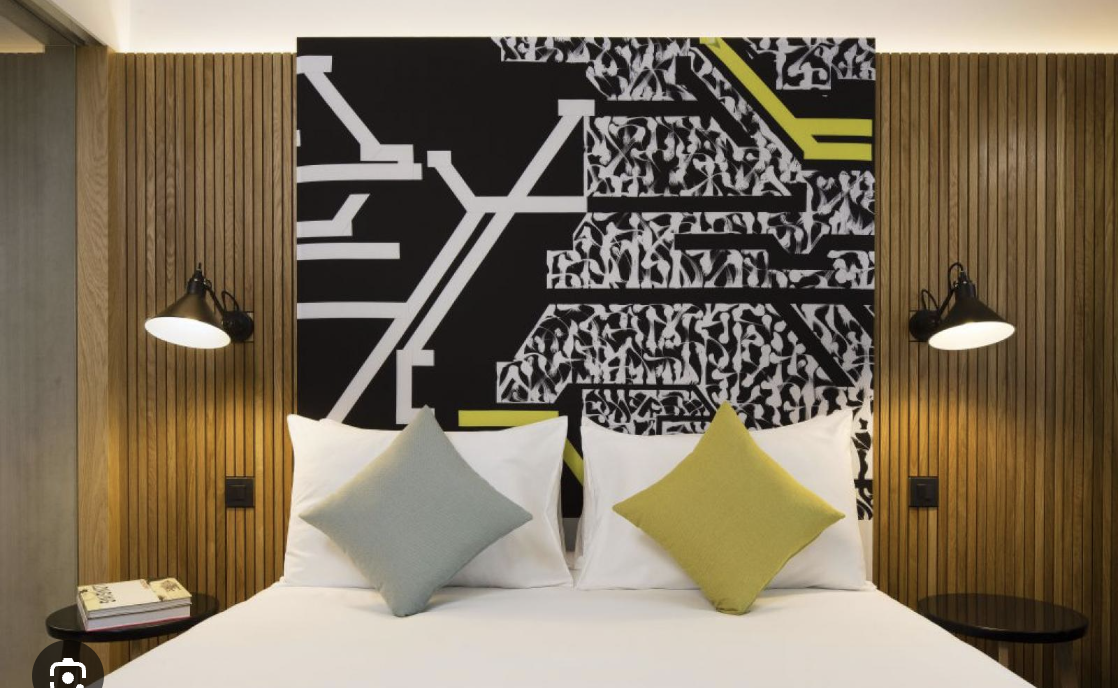



---



# TABLE OF CONTENTS

1. Executive Summary
2. Introduction
3. Objectives
4. Dataset Description
5. Data Processing and Exploratory Analysis
6. Comprehensive Analysis
7. Conclusion




---



# 1. EXECUTIVE SUMMARY

This project focused on analyzing hotel booking data to uncover insights into pricing patterns, demand trends, and the factors influencing these variables, such as star ratings, room count, and review scores. Two datasets were integrated: one providing general hotel information and the other detailing booking-specific attributes.

The analysis began with extensive data cleaning to address missing values and inconsistencies. For instance, fields like stars, room_count, and review_score had gaps that were filled using imputation techniques, ensuring data reliability. Erroneous entries, such as negative review scores, were corrected by referencing median values based on similar star ratings.

Key findings revealed that hotels with higher star ratings typically garnered better review scores and charged higher prices. Sold-out statuses were often associated with elevated pricing, indicative of demand-driven price adjustments. In terms of market segmentation, clustering techniques like K-means were applied, dividing the data into two distinct markets based on star ratings and room count. This revealed notable differences in characteristics such as room availability and pricing between the segments.

The study also identified trends in customer behavior, such as varying lead times for bookings across different markets. Additionally, most bookings excluded meals, with "NONE" being the predominant meal type, indicating that meal-inclusive offers might not be a significant draw for customers in this dataset. Room types were aggregated into broader categories (e.g., Standard, Deluxe, Suite) to streamline the analysis, though this might have overlooked some nuanced preferences.

Challenges included dealing with substantial missing data and ensuring that the clustering process accurately captured market dynamics. Aggregating room and meal categories simplified the analysis but may have reduced granularity. Despite these limitations, the findings provide a solid foundation for data-driven decision-making, such as optimizing pricing strategies and anticipating demand fluctuations.

Future work should involve implementing advanced machine learning models to enhance demand forecasting and dynamic pricing. Incorporating external datasets, such as customer reviews or regional trends, could provide additional layers of insight. Finally, improving data collection and validation processes will help mitigate the challenges of missing or inconsistent data, ensuring more robust analyses in the future.



---



# 2. INTRODUCTION

This project involves analyzing hotel datasets to derive actionable insights for business decision-making. As a junior data scientist, the task is to perform exploratory data analysis (EDA), uncover patterns, and answer specific business questions related to hotel performance, pricing strategies, and market comparisons.



---



# 3. OBJECTIVES

- Provide a comprehensive understanding of the data.
- Identify patterns and trends influencing hotel bookings and pricing.
- Deliver clear, data-driven recommendations to inform business strategy.



---



# 4. DATASET DESCRIPTION

The data of 2 datasets:
- Hotel Information Dataset: Contains hotel-specific details such as names, locations, star ratings, and room counts.


| **Field**      | **Type** | **Meaning**                           |
|:--------------:|:--------:|:-------------------------------------:|
| `our_hotel_id` | integer  | Unique identifier of the hotel.       |
| `name`         | string   | Name of the hotel.                    |
| `review_score` | float    | Review score of the hotel.            |
| `stars`        | integer  | Star rating of the hotel.             |
| `latitude`     | float    | Latitude of the hotel's location.     |
| `longitude`    | float    | Longitude of the hotel's location.    |
| `room_count`   | integer  | Number of rooms in the hotel.         |


- Booking Details Dataset: Includes information on bookings, such as lead times, arrival dates, room types, and pricing.

| **Field**           | **Type** | **Meaning**                                                         |
|:--------------------:|:--------:|:-------------------------------------------------------------------:|
| `our_hotel_id`       | integer  | Unique identifier of the hotel.                                     |
| `arrival_date`       | date     | The date of stay.                                                   |
| `lead_time`          | integer  | The time (in days) between the sample generation date and the stay date. |
| `room_name`          | string   | Name of the selected room.                                          |
| `meal_type_included` | string   | Type of the meal included in the offer.                             |
| `max_persons`        | integer  | Number of persons allowed in the room.                              |
| `price_value_ref`    | float    | Price value for the reference offer.                                |
| `price_value_non_ref`| float    | Price value for a non-reference offer.                              |
| `is_sold_out`        | boolean  | Indicates whether the room is sold out.                             |





---



# 5. PRE-PROCESSING AND EXPLORATORY ANALYSIS

# 5.1 Import of libraries and modules

In [408]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from datetime import datetime, timedelta


# 5.2. Import of data

In [409]:
# GitHub links for the datasets
hotels_info_url = "https://raw.githubusercontent.com/govinda-lienart/hotel_data_analysis/refs/heads/main/hotels_information_(6).csv"
booking_data_url = "https://raw.githubusercontent.com/govinda-lienart/hotel_data_analysis/refs/heads/main/pricing_data_(5).csv"

In [410]:
# Load datasets
hotels_information = pd.read_csv(hotels_info_url)
booking_data = pd.read_csv(booking_data_url)

#5.3. Prepocessing and exploratory analysis of 'Booking dataset'

## 5.3.1 Booking Dataset: Displaying the dataset, checking datatypes and number of rows




> 📌 The dataset booking_data contains hotel booking information with 25,380 rows and 9 columns While most columns seem to have complete data, some entries at first glance, such as room_name, max_persons, and price-related columns, contain missing values.  The dataset has a mix of numerical, object, and boolean data types, with some columns containing missing values. Some variables might be needed to be converted into categorical data, such as meal_type_included and maybe room_name.*



In [411]:
# display a few rows and column names of the booking data
display (booking_data)

our_hotel_id arrival_date  lead_time          room_name  \
0          12112537   2021-01-23          1  Small Double Room   
1          12112537   2021-01-24          2  Small Double Room   
2          12112537   2021-01-25          3  Small Double Room   
3          12112537   2021-01-26          4  Small Double Room   
4          12112537   2021-01-27          5  Small Double Room   
...             ...          ...        ...                ...   
25375       9590761   2021-04-18         86                NaN   
25376       9590761   2021-04-19         87             Studio   
25377       9590761   2021-04-20         88             Studio   
25378       9590761   2021-04-21         89             Studio   
25379       9590761   2021-04-22         90             Studio   

      meal_type_included  max_persons  price_value_ref  price_value_non_ref  \
0                   NONE          2.0             65.0                 58.5   
1                   NONE          2.0             65.0                 58.5   
2                   NONE          2.0             65.0                 58.5   
3                   NONE          2.0             65.0                 58.5   
4                   NONE          2.0             65.0                 58.5   
...                  ...          ...              ...                  ...   
25375                NaN          NaN              NaN                  NaN   
25376               NONE          2.0            146.0                131.4   
25377               NONE          2.0            154.0                138.6   
25378               NONE          2.0            154.0                138.6   
25379               NONE          2.0            154.0                138.6   

       is_sold_out  
0            False  
1            False  
2            False  
3            False  
4            False  
...            ...  
25375         True  
25376        False  
25377        False  
25378        False  
25379        False  

[25380 rows x 9 columns]

In [412]:
# displaying datatype and number of entries
booking_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25380 entries, 0 to 25379
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   our_hotel_id         25380 non-null  int64  
 1   arrival_date         25380 non-null  object 
 2   lead_time            25380 non-null  int64  
 3   room_name            22756 non-null  object 
 4   meal_type_included   22756 non-null  object 
 5   max_persons          22756 non-null  float64
 6   price_value_ref      22597 non-null  float64
 7   price_value_non_ref  22756 non-null  float64
 8   is_sold_out          25380 non-null  bool   
dtypes: bool(1), float64(3), int64(2), object(3)
memory usage: 1.6+ MB


## 5.3.2 'Booking Dataset': Detection of duplicated data

> 📌 The dataset booking_data following the analysis below doesn't appear to contain duplicated rows*



In [413]:
# Check for duplicated rows in the dataset
duplicated_rows = booking_data[booking_data.duplicated()]

# Count the total number of duplicate rows
num_duplicates = duplicated_rows.shape[0]

# Display the total count of duplicate rows
print(f"Total number of duplicate rows: {num_duplicates}")

# If duplicates exist, display the first few duplicate rows for inspection
if num_duplicates > 0:
    print("\nSample duplicate rows:")
    print(duplicated_rows.head())
else:
    print("No duplicate rows found in the dataset.")

Total number of duplicate rows: 0
No duplicate rows found in the dataset.


## 5.3.3 Booking Dataset: Identifying  missing data

> 📌 The analysis below reveals missing data for the room_name, meal_type_include, max_persons_price_value_ref, price_value_non_ref - each of them missing total of approximately 10 percent of the total data. This is also clearly visualized in the heatmap.

In [414]:
# Display the number of missing values in the booking Data
print("Missing Values in Booking Data:")
print(booking_data.isnull().sum())

Missing Values in Booking Data:
our_hotel_id              0
arrival_date              0
lead_time                 0
room_name              2624
meal_type_included     2624
max_persons            2624
price_value_ref        2783
price_value_non_ref    2624
is_sold_out               0
dtype: int64


In [415]:
# Calculate and display the percentage of missing values in booking Data
print("\nPercentage of Missing Values in Booking Data:")
print((booking_data.isnull().sum() / len(booking_data)) * 100)


Percentage of Missing Values in Booking Data:
our_hotel_id            0.000000
arrival_date            0.000000
lead_time               0.000000
room_name              10.338849
meal_type_included     10.338849
max_persons            10.338849
price_value_ref        10.965327
price_value_non_ref    10.338849
is_sold_out             0.000000
dtype: float64


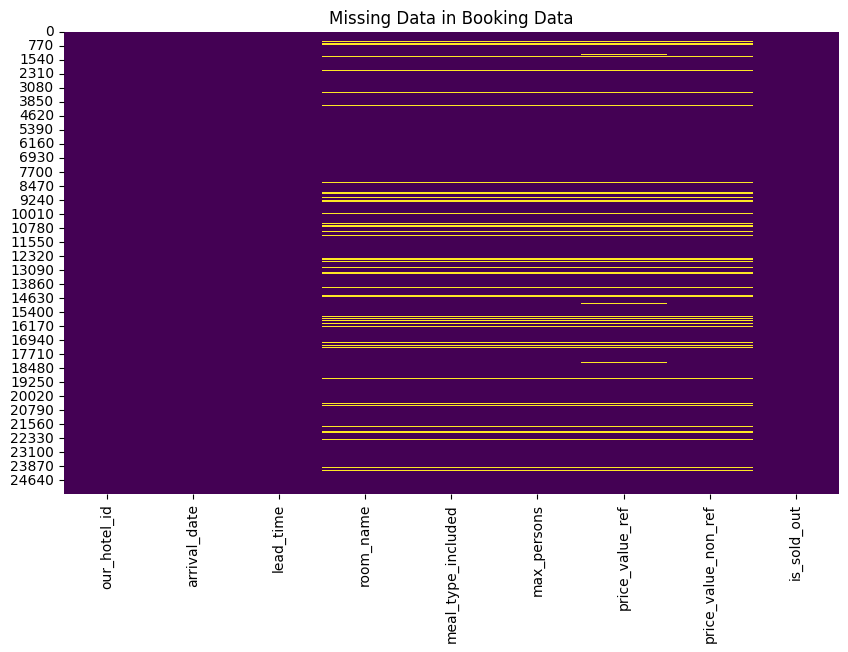

In [416]:
# Heatmap for booking Data
plt.figure(figsize=(10, 6))
sns.heatmap(booking_data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data in Booking Data")
plt.show()

## 5.3.4 Booking Dataset: Identifying rows with a significant number of missing values across columns

> 📌 The displayed analysis identifies rows in the booking_data dataset with significant missing values, defined as having more than 40% of their columns (4 out of 10) missing. A total of 2,624 rows (10.34% of the dataset) meet this criterion, with columns such as room_name, meal_type_included, max_persons, price_value_ref, and price_value_non_ref often being entirely NaN. These rows are likely associated with bookings marked as sold out (is_sold_out is True). The analysis provides an overview of how missing data is distributed and highlights rows requiring further handling, such as imputation or removal.


In [417]:
# Count the number of missing values in each row
booking_data['missing_count'] = booking_data.isnull().sum(axis=1)

# Define a threshold for missing data (e.g., 40% of total columns)
threshold = 0.4 * booking_data.shape[1]

# Identify rows with a lot of missing data
rows_with_lots_of_missing = booking_data[booking_data['missing_count'] > threshold]

# Display these rows
display(rows_with_lots_of_missing)

# Calculate the percentage of rows with a lot of missing data
percentage_rows_with_missing = (len(rows_with_lots_of_missing) / len(booking_data)) * 100

# Display the percentage
print(f"Percentage of rows with a lot of missing data: {percentage_rows_with_missing:.2f}%")


our_hotel_id arrival_date  lead_time room_name meal_type_included  \
540        17378898   2021-01-23          1       NaN                NaN   
541        17378898   2021-01-24          2       NaN                NaN   
542        17378898   2021-01-25          3       NaN                NaN   
543        17378898   2021-01-26          4       NaN                NaN   
544        17378898   2021-01-27          5       NaN                NaN   
...             ...          ...        ...       ...                ...   
25360       9590761   2021-04-03         71       NaN                NaN   
25361       9590761   2021-04-04         72       NaN                NaN   
25373       9590761   2021-04-16         84       NaN                NaN   
25374       9590761   2021-04-17         85       NaN                NaN   
25375       9590761   2021-04-18         86       NaN                NaN   

       max_persons  price_value_ref  price_value_non_ref  is_sold_out  \
540            NaN              NaN                  NaN         True   
541            NaN              NaN                  NaN         True   
542            NaN              NaN                  NaN         True   
543            NaN              NaN                  NaN         True   
544            NaN              NaN                  NaN         True   
...            ...              ...                  ...          ...   
25360          NaN              NaN                  NaN         True   
25361          NaN              NaN                  NaN         True   
25373          NaN              NaN                  NaN         True   
25374          NaN              NaN                  NaN         True   
25375          NaN              NaN                  NaN         True   

       missing_count  
540                5  
541                5  
542                5  
543                5  
544                5  
...              ...  
25360              5  
25361              5  
25373              5  
25374              5  
25375              5  

[2624 rows x 10 columns]

Percentage of rows with a lot of missing data: 10.34%


## 5.3.5 Booking Dataset: assessing the relative representation of the feature 'is_sold_out.

> 📌 The analysis reveals that rows with more than 40% missing (NaN) values exclusively belong to the category where “Sold Out” is marked as True, comprising 100% of such rows. This indicates a strong relationship between missing data and the “Sold Out” feature, suggesting that once an item is sold out, other attributes may no longer be updated for reasons not immediately clear from this analysis. These rows, where “Sold Out” is True and significant data is missing, represent approximately 10% of the dataset. This raises the question of whether to delete or impute these rows, a decision that requires consultation with the business unit. However, imputing the missing data is particularly challenging due to the extensive number of missing columns, and the “Sold Out” status might critically influence other attributes, which cannot be fully assessed at this stage. Therefore, the current decision is to retain these rows in their original state for further analysis.




In [418]:
# Count the number of rows for "Sold Out" (True) and "Not Sold Out" (False)
sold_out_counts = booking_data['is_sold_out'].value_counts()

# Print the result
print("Number of rows for each Sold Out status:")
print(sold_out_counts)

Number of rows for each Sold Out status:
is_sold_out
False    22756
True      2624
Name: count, dtype: int64


In [419]:
# Define a threshold for "majority missing" (e.g., more than 50% of columns are NaN)
threshold = booking_data.shape[1] * 0.40  # 50% of columns

# Count rows with majority NaN values and 'is_sold_out' as True
sold_out_with_majority_nan = booking_data[
    (booking_data['is_sold_out'] == True) &
    (booking_data.isnull().sum(axis=1) > threshold)
]

# Count the total number of such rows
sold_out_nan_count = len(sold_out_with_majority_nan)

# Count the total number of rows where 'is_sold_out' is True
sold_out_counts = booking_data['is_sold_out'].value_counts()

# Print the results
print(f"Number of 'Sold Out' rows with a majority of columns as NaN: {sold_out_nan_count}")
print(f"Total rows with 'Sold Out' status: {sold_out_counts.get(True, 0)}")
print(f"Percentage of 'Sold Out' rows with majority NaN: {(sold_out_nan_count / sold_out_counts.get(True, 1)) * 100:.2f}%")

Number of 'Sold Out' rows with a majority of columns as NaN: 2624
Total rows with 'Sold Out' status: 2624
Percentage of 'Sold Out' rows with majority NaN: 100.00%


In [420]:
# Count the number of rows for "Sold Out" (True) and "Not Sold Out" (False)
sold_out_counts = booking_data['is_sold_out'].value_counts()

# Total number of rows
total_rows = booking_data.shape[0]

# Calculate percentages
sold_out_percentage = (sold_out_counts[True] / total_rows) * 100
not_sold_out_percentage = (sold_out_counts[False] / total_rows) * 100

# Print the results
print(f"Percentage of Sold Out rows: {sold_out_percentage:.2f}%")
print(f"Percentage of Not Sold Out rows: {not_sold_out_percentage:.2f}%")

Percentage of Sold Out rows: 10.34%
Percentage of Not Sold Out rows: 89.66%


<ipython-input-421-fd3651487fc5>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Status", y="Percentage", data=data, palette="viridis")


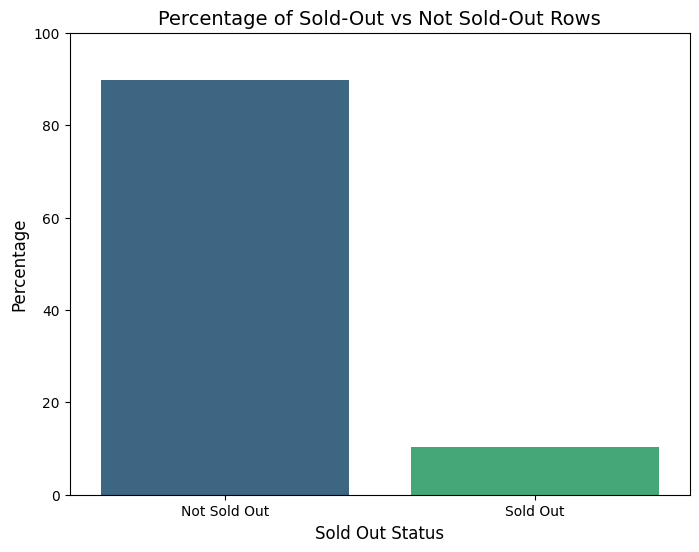

In [421]:
# Example values (replace with actual percentages)
sold_out_percentage = 10.34
not_sold_out_percentage = 89.66

# Create a DataFrame for visualization
data = pd.DataFrame({
    "Status": ["Not Sold Out", "Sold Out"],
    "Percentage": [not_sold_out_percentage, sold_out_percentage]
})

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x="Status", y="Percentage", data=data, palette="viridis")

# Add labels, title, and formatting
plt.title("Percentage of Sold-Out vs Not Sold-Out Rows", fontsize=14)
plt.xlabel("Sold Out Status", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.ylim(0, 100)
plt.show()


##5.3.6 Booking Dataset: room_name

> 📌 I analyzed the room_name column in the booking dataset by first converting it into a categorical variable and visualizing the frequency of unique values using a bar chart. Observing that the dataset contained 106 unique room names, I calculated their relative percentages and combined these details into a table for better insight. To simplify the analysis, I created a custom function to group the room names into broader categories (e.g., “Double,” “Twin,” “Suite”) based on keywords and applied this categorization to the data. Finally, I visualized the refined room categories to understand their distribution, which showed “Double” as the most frequent category, followed by others like “Twin,” “King,” and “Small Double.” This process effectively reduced complexity and provided a clearer view of room types in the dataset.

In [422]:
# Convert 'room_name' to category
booking_data['room_name'] = booking_data['room_name'].astype('category')

# Verify the data types after conversion
print(booking_data.dtypes)

our_hotel_id              int64
arrival_date             object
lead_time                 int64
room_name              category
meal_type_included       object
max_persons             float64
price_value_ref         float64
price_value_non_ref     float64
is_sold_out                bool
missing_count             int64
dtype: object


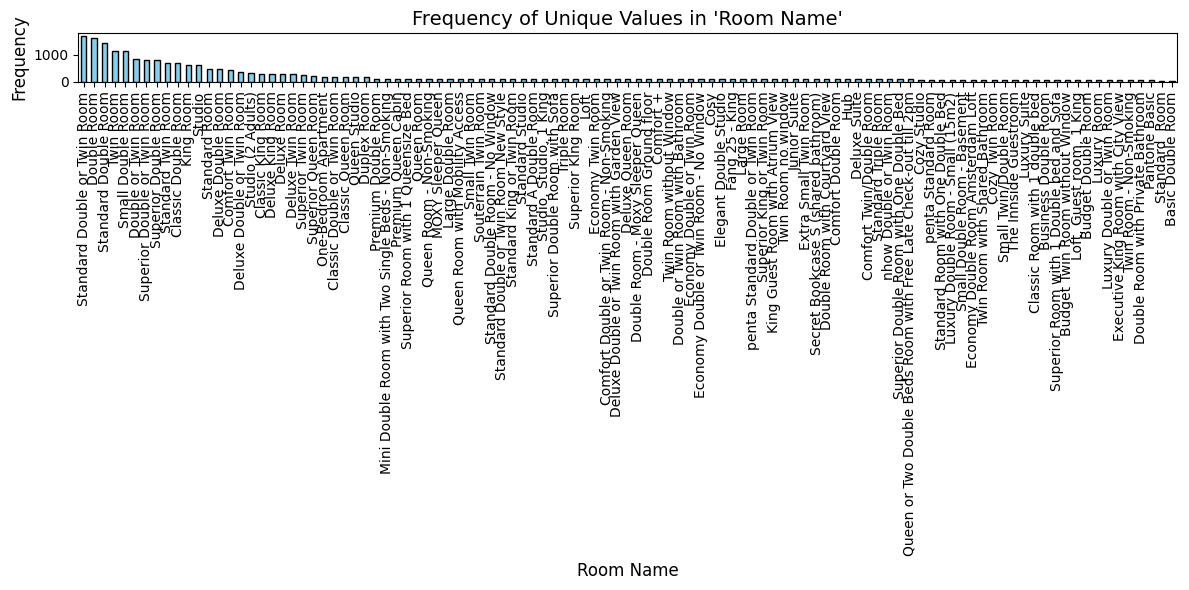

In [423]:
# Count the occurrences of each unique value in 'room_name'
room_name_counts = booking_data['room_name'].value_counts()

# Plot a bar chart for the counts
plt.figure(figsize=(12, 6))
room_name_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.title("Frequency of Unique Values in 'Room Name'", fontsize=14)
plt.xlabel("Room Name", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=90, fontsize=10)  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


In [424]:
# Calculate the frequency of all room names
all_room_name_counts = booking_data['room_name'].value_counts()

# Calculate the relative percentage for all room names
all_room_name_percentage = (all_room_name_counts / len(booking_data)) * 100

# Combine counts and percentages into a DataFrame
all_room_name_table = pd.DataFrame({
    'Room Name': all_room_name_counts.index,
    'Frequency': all_room_name_counts.values,
    'Relative Percentage': all_room_name_percentage.values
}).reset_index(drop=True)

# Display the table
print(all_room_name_table)

                             Room Name  Frequency  Relative Percentage
0         Standard Double or Twin Room       1704             6.713948
1                          Double Room       1611             6.347518
2                 Standard Double Room       1426             5.618597
3                            Twin Room       1137             4.479905
4                    Small Double Room       1131             4.456265
..                                 ...        ...                  ...
100            Twin Room - Non-Smoking         52             0.204886
101  Double Room with Private Bathroom         52             0.204886
102                      Pantone Basic         51             0.200946
103                     Standard  Room         37             0.145784
104                  Basic Double Room         22             0.086682

[105 rows x 3 columns]


In [425]:
# Check unique values for categorical columns
print("Unique values in 'room_name':")
print(booking_data['room_name'].unique())

Unique values in 'room_name':
['Small Double Room', 'One-Bedroom Apartment', 'Standard Double Room', 'Deluxe Double Room', 'Elegant Double Studio', ..., 'Standard Studio', 'Economy Double or Twin Room - No Window', 'Deluxe Suite', 'nhow Double or Twin Room', 'Premium Queen Cabin']
Length: 106
Categories (105, object): ['Basic Double Room', 'Budget Double Room',
                           'Budget Twin Room without Window', 'Business Double Room', ..., 'Twin Room without Window',
                           'nhow Double or Twin Room', 'penta Standard Double or Twin Room',
                           'penta Standard Room']


In [426]:
def categorize_room(name):
    if pd.isna(name):
        return 'Unknown'

    name = name.lower()

    # Priority-based specific mappings
    if 'small double' in name:
        return 'Small Double'
    elif 'deluxe double' in name:
        return 'Deluxe Double'
    elif 'double' in name:
        return 'Double'
    elif 'king' in name:
        return 'King'
    elif 'queen' in name:
        return 'Queen'
    elif 'suite' in name or 'duplex' in name:
        return 'Suite'
    elif 'twin' in name:
        return 'Twin'
    elif 'studio' in name:
        return 'Studio'
    elif 'single' in name:
        return 'Single'
    elif 'apartment' in name:
        return 'Apartment'
    elif 'economy' in name:
        return 'Economy'
    elif 'superior' in name:
        return 'Superior'
    elif 'standard' in name:
        return 'Standard'
    elif 'luxury' in name:
        return 'Luxury'
    else:
        return 'Other'

# Apply the function to the room_name column
booking_data['room_category'] = booking_data['room_name'].apply(categorize_room)

room_category
Double           10640
Twin              3545
King              1954
Small Double      1211
Queen             1091
Studio            1083
Other             1019
Deluxe Double      900
Standard           676
Suite              404
Apartment          180
Luxury              53
Name: count, dtype: int64


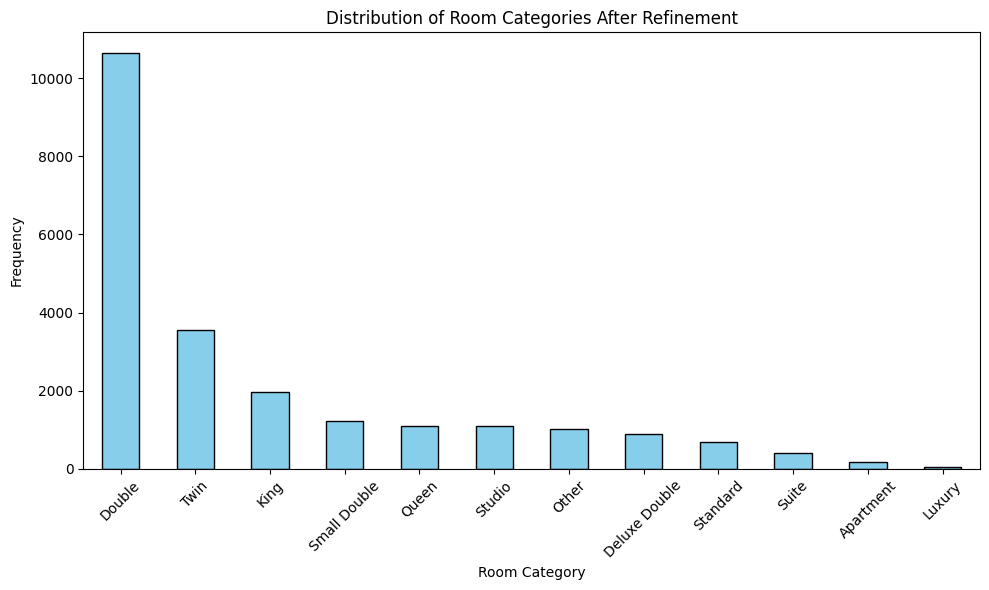

In [427]:
# Check the distribution of categories
print(booking_data['room_category'].value_counts())

# Visualize the distribution
plt.figure(figsize=(10, 6))
booking_data['room_category'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribution of Room Categories After Refinement")
plt.xlabel("Room Category")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 5.3.7 Booking Dataset: meal_type_included

> 📌 I analyzed the meal_type_included column by first converting it into a categorical variable and calculating the total number of rows in the dataset. I determined the frequency and proportion of each unique value in this column, including missing values (NaN), and combined these results into a summary table. The table revealed that the majority of rows (79.62%) had NONE as the meal type, while BREAKFAST accounted for 10.34%, and 10.33% of the rows contained missing values. I also checked for blank strings or whitespace in the column and confirmed that there were no such rows. I decided not to impute or delete the missing values because, as previously mentioned, these rows are largely empty and belong to the rare category where sold_out is True.

In [428]:
# datatype change from object to category
booking_data['meal_type_included'] = booking_data['meal_type_included'].astype('category')
print(booking_data['meal_type_included'].dtypes)

# Calculate the total number of rows
total_rows = booking_data.shape[0]

# Calculate the frequency of each unique value in 'meal_type_included', including blanks
meal_type_counts = booking_data['meal_type_included'].value_counts(dropna=False)

# Calculate the proportion of each value, including blanks
meal_type_proportions = (meal_type_counts / total_rows) * 100

# Combine counts and proportions into a DataFrame
meal_type_summary = pd.DataFrame({
    'Meal Type': meal_type_counts.index,
    'Frequency': meal_type_counts.values,
    'Proportion (%)': meal_type_proportions.values
})

# Display the summary table
print(meal_type_summary)

category
   Meal Type  Frequency  Proportion (%)
0       NONE      20207       79.617809
1        NaN       2624       10.338849
2  BREAKFAST       2549       10.043341


In [429]:
# Count empty strings or whitespace
blank_rows = booking_data['meal_type_included'].str.strip().eq('').sum()
print(f"Number of blank (empty or whitespace) rows: {blank_rows}")

Number of blank (empty or whitespace) rows: 0


**Conclusion**: The distribution of the meal_type_included variable reveals that “NONE” dominates the dataset, accounting for 79.62% of the records, followed by missing values (NaN) at 10.34% and “BREAKFAST” at 10.04%. This heavily skewed distribution makes it challenging to predict or impute missing values accurately, as most bookings do not include meals, while a smaller yet significant portion includes breakfast. The NaN values could represent genuinely unrecorded data or indicate that no meal was included, and replacing these with a single category risks distorting the analysis

## 5.3.8 Booking Dataset: arrival_date


> 📌 No missing values for arrival date detected

In [430]:
# Count the number of missing (NaT) values in 'arrival_date'
missing_count = booking_data['arrival_date'].isna().sum()

print(f"Number of missing (NaT) values in 'arrival_date': {missing_count}")

Number of missing (NaT) values in 'arrival_date': 0


###Booking Dataset: max_persons

> 📌 In this analysis, I focused on the max_persons column to assess its distribution and handle missing values. The column was identified as a numerical variable (float64), and I calculated that it contains 2,624 missing values, which I would not ampute or delete as explained before (see section Sold_out). I visualized the column’s distribution using a histogram and boxplot, which showed that the value 2.0 dominates with 22,666 entries, while 3.0 accounts for only 90 entries. Despite its low frequency, the value 3.0 was not treated as an outlier or misinformation since it logically corresponds to larger accommodations like apartments.. For further exploration, I filtered and displayed the rows where max_persons = 3 to verify their association with specific accommodation types (e.g., apartments).

In [431]:
print(booking_data['max_persons'].dtypes)


float64


In [432]:
# Count the number of NaN values
missing_max_persons = booking_data['max_persons'].isna().sum()

# Calculate the percentage of NaN values
total_rows = booking_data.shape[0]
missing_percentage = (missing_max_persons / total_rows) * 100

print(f"Missing values: {missing_max_persons}")
print(f"Percentage missing: {missing_percentage:.2f}%")

Missing values: 2624
Percentage missing: 10.34%


In [433]:
 print(booking_data['max_persons'].describe())

count    22756.000000
mean         2.003955
std          0.062766
min          2.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: max_persons, dtype: float64


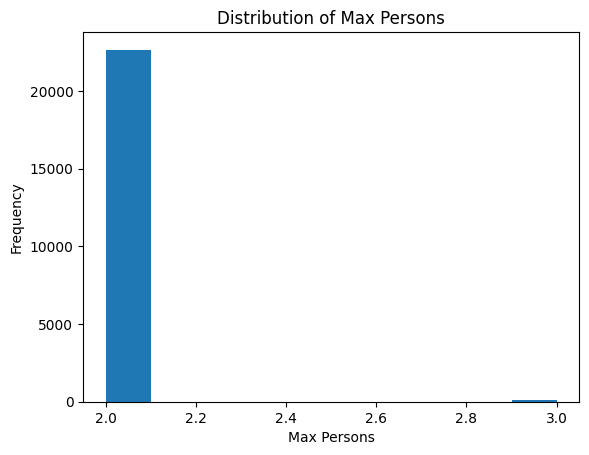

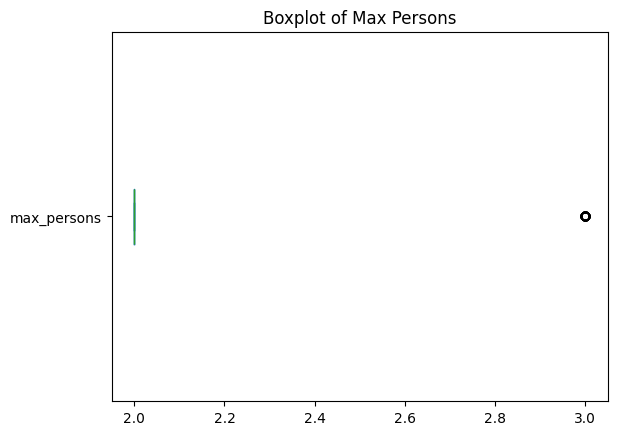

In [434]:
# Histogram
booking_data['max_persons'].plot(kind='hist', bins=10, title='Distribution of Max Persons')
plt.xlabel('Max Persons')
plt.ylabel('Frequency')
plt.show()

# Boxplot
booking_data['max_persons'].plot(kind='box', vert=False, title='Boxplot of Max Persons')
plt.show()

In [435]:
# Filter rows where 'max_persons' is equal to 3
rows_with_3 = booking_data[booking_data['max_persons'] == 3]

# Display the rows
print("Rows where 'max_persons' is equal to 3:")
print(rows_with_3)


Rows where 'max_persons' is equal to 3:
       our_hotel_id arrival_date  lead_time              room_name  \
15480       3185815   2021-01-23          1  One-Bedroom Apartment   
15481       3185815   2021-01-24          2  One-Bedroom Apartment   
15482       3185815   2021-01-25          3  One-Bedroom Apartment   
15483       3185815   2021-01-26          4  One-Bedroom Apartment   
15484       3185815   2021-01-27          5  One-Bedroom Apartment   
...             ...          ...        ...                    ...   
15565       3185815   2021-04-18         86  One-Bedroom Apartment   
15566       3185815   2021-04-19         87  One-Bedroom Apartment   
15567       3185815   2021-04-20         88  One-Bedroom Apartment   
15568       3185815   2021-04-21         89  One-Bedroom Apartment   
15569       3185815   2021-04-22         90  One-Bedroom Apartment   

      meal_type_included  max_persons  price_value_ref  price_value_non_ref  \
15480               NONE          3.0   

## 5.3.9 Booking Dataset: our_hotel_id

> 📌 In this analysis, I examined the our_hotel_id column in the dataset to understand its unique values and frequency distribution. First, I checked for missing values in the column, confirming that it contains no missing entries (0.00% missing). Then, I calculated the total number of unique hotel IDs, finding there are 282 unique values. I used the value_counts() function to compute the frequency of each unique hotel_id, displaying the count for each ID. To visualize the frequency distribution, I created a line plot. The x-axis represents the unique hotel IDs, and the y-axis shows their respective frequencies. I used markers ('o') to indicate individual points and connected them with a line ('--') for better visualization. The plot highlights that most hotel IDs occur with consistent frequency of 90 occurrences.

In [436]:
# Check for missing values specifically in the 'our_hotel_id' column
missing_our_hotel_id = booking_data['our_hotel_id'].isnull().sum()

In [437]:
# Count the number of unique values in the 'hotel_id' column
unique_hotel_ids = booking_data['our_hotel_id'].nunique()

# Display the result
print(f"Number of unique Hotel IDs: {unique_hotel_ids}")

Number of unique Hotel IDs: 282


In [438]:
# Count the frequency of each unique hotel_id
hotel_id_counts = booking_data['our_hotel_id'].value_counts()
# Display the frequency
print(hotel_id_counts)


our_hotel_id
12112537    90
3284517     90
3308524     90
3299098     90
3291521     90
            ..
3168361     90
3169376     90
3169387     90
3169398     90
9590761     90
Name: count, Length: 282, dtype: int64


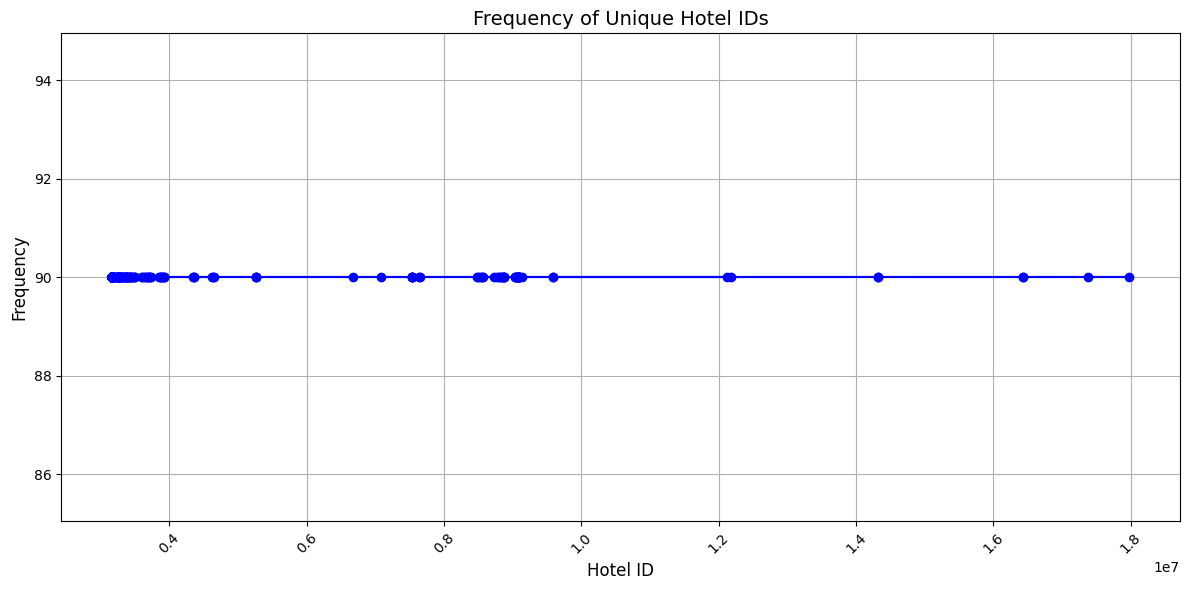

In [439]:


# Plot the frequency of hotel_id using a line plot
plt.figure(figsize=(12, 6))
plt.plot(hotel_id_counts.index, hotel_id_counts.values, marker='o', linestyle='-', color='b')

# Add labels and title
plt.title("Frequency of Unique Hotel IDs", fontsize=14)
plt.xlabel("Hotel ID", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add grid for better visualization
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

## Booking Dataset: lead_Time

> 📌 The box plot visualizes the distribution of lead_time, showing that the data is well-distributed with no visible outliers. The interquartile range (IQR) spans from 23 to 68 days, with a median lead time of 45.5 days. The whiskers extend from the minimum value of 21 days to the maximum of 90 days, covering the complete range without any extreme outliers. As previously demonstrated, the lead_time column contains no missing values, ensuring the analysis is based on a complete dataset.

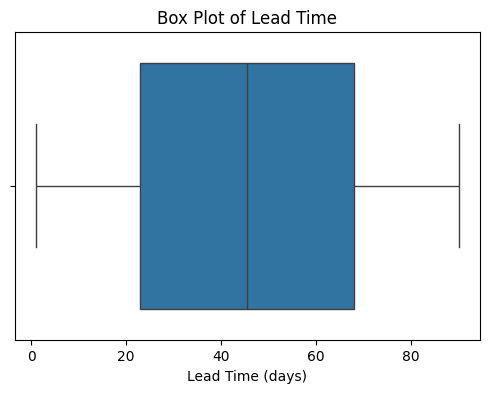

Lead Time Statistics:
count    25380.00000
mean        45.50000
std         25.97967
min          1.00000
25%         23.00000
50%         45.50000
75%         68.00000
max         90.00000
Name: lead_time, dtype: float64


In [440]:
# Create a box plot for 'lead_time'
plt.figure(figsize=(6, 4))
sns.boxplot(x=booking_data['lead_time'])

# Add title and labels
plt.title('Box Plot of Lead Time')
plt.xlabel('Lead Time (days)')

# Display the plot
plt.show()

# Calculate and display statistical values
lead_time_stats = booking_data['lead_time'].describe()
print("Lead Time Statistics:")
print(lead_time_stats)


## Booking Dataset: price_value_ref and	price_value_non_ref

📌 The analysis confirmed that missing values in the price_value_ref and price_value_non_ref columns are linked to rows where is_sold_out = True. Specifically, 10.34% of rows in price_value_non_ref contain missing values. These rows were retained in the dataset to preserve data integrity. Additionally, 0.64% of rows in price_value_ref exhibit sporadic missing data, which may be unrelated to the is_sold_out status. These missing values might be addressed in later steps if necessary.

price_value_ref and price_value_non_ref likely represent refundable and non-refundable prices, respectively. Statistical analysis showed that refundable prices are consistently higher than non-refundable ones, reflecting their added flexibility. This pricing strategy aligns with market logic, as refundable bookings carry a higher risk for the hotel in case of cancellations, justifying the premium cost.

Despite the statistically significant difference between the two pricing types (p-value < 0.0001), an average price column, average_price, was created by combining price_value_ref and price_value_non_ref. This decision was made to simplify future analytics by consolidating pricing data into a single feature. The average price serves as a representative value for each hotel’s overall pricing strategy, balancing the flexibility of refundable bookings with the lower cost of non-refundable options.

In [441]:
# Check for missing values in both columns
missing_price_ref = booking_data['price_value_ref'].isna().sum()
missing_price_non_ref = booking_data['price_value_non_ref'].isna().sum()

# Calculate percentages of missing values
total_rows = booking_data.shape[0]
missing_price_ref_percentage = (missing_price_ref / total_rows) * 100
missing_price_non_ref_percentage = (missing_price_non_ref / total_rows) * 100

# Print the results
print(f"Missing values in 'price_value_ref': {missing_price_ref} ({missing_price_ref_percentage:.2f}%)")
print(f"Missing values in 'price_value_non_ref': {missing_price_non_ref} ({missing_price_non_ref_percentage:.2f}%)")

Missing values in 'price_value_ref': 2783 (10.97%)
Missing values in 'price_value_non_ref': 2624 (10.34%)


In [442]:


# Calculate statistics for price_value_ref
ref_stats = booking_data.groupby('is_sold_out')['price_value_ref'].describe()
print("Price Value Ref Statistics by Sold Out Status:")
print(ref_stats)

# Calculate statistics for price_value_non_ref
non_ref_stats = booking_data.groupby('is_sold_out')['price_value_non_ref'].describe()
print("\nPrice Value Non-Ref Statistics by Sold Out Status:")
print(non_ref_stats)

Price Value Ref Statistics by Sold Out Status:
               count        mean        std   min   25%    50%    75%     max
is_sold_out                                                                  
False        22597.0  134.851263  99.877643  35.0  85.0  111.0  152.0  1113.0
True             0.0         NaN        NaN   NaN   NaN    NaN    NaN     NaN

Price Value Non-Ref Statistics by Sold Out Status:
               count        mean        std  min   25%   50%    75%    max
is_sold_out                                                               
False        22756.0  116.835683  87.140762  8.0  73.6  96.0  131.4  890.4
True             0.0         NaN        NaN  NaN   NaN   NaN    NaN    NaN


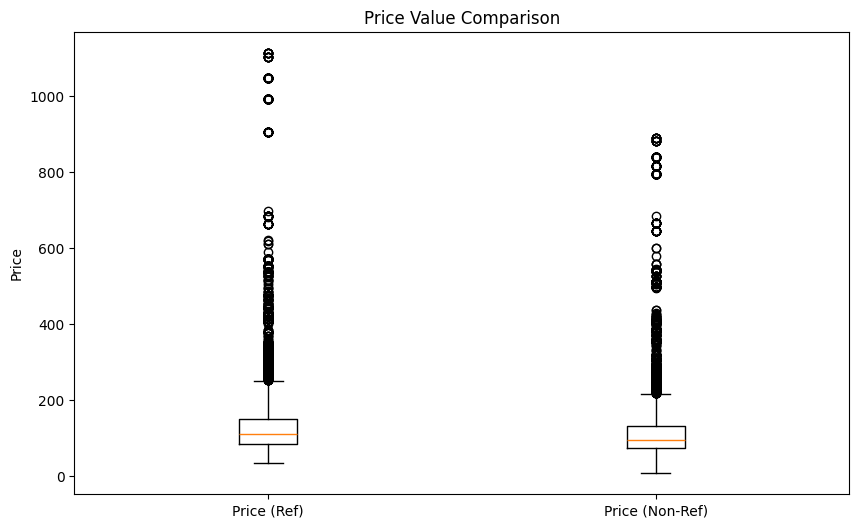

T-statistic: 154.7531, P-value: 0.0000
Significant difference found between Price (Ref) and Price (Non-Ref).


In [443]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Drop rows with missing values in price columns
price_data = booking_data[['price_value_ref', 'price_value_non_ref']].dropna()

# Visualize distributions
plt.figure(figsize=(10, 6))
plt.boxplot([price_data['price_value_ref'], price_data['price_value_non_ref']], labels=['Price (Ref)', 'Price (Non-Ref)'])
plt.title('Price Value Comparison')
plt.ylabel('Price')
plt.show()

# Perform a paired t-test
t_stat, p_value = stats.ttest_rel(price_data['price_value_ref'], price_data['price_value_non_ref'])

print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

# Interpret the result
if p_value > 0.05:
    print("No significant difference between Price (Ref) and Price (Non-Ref).")
else:
    print("Significant difference found between Price (Ref) and Price (Non-Ref).")

In [444]:
# Calculate the average price and add it as a new column
booking_data['average_price'] = booking_data[['price_value_ref', 'price_value_non_ref']].mean(axis=1)

# 5.4 Prepocessing and exploratory analysis of 'hotels_information' dataset

📌 Here I displayed the hotels_information DataFrame to examine its structure and contents, which contains information on 282 hotels, including columns like our_hotel_id, name, review_score, stars, latitude, longitude, and room_count. To better understand the dataset, I used the .info() method to check the metadata, revealing that while most columns are complete, some do miss values. The data types include numeric types (float64 and int64) for most columns and object for the name column. This step helped me identify missing data and understand the dataset’s overall structure, which will guide my next steps in cleaning and analyzing the data.

In [445]:
display (hotels_information)

our_hotel_id                              name  review_score  stars  \
0         3169410      Hotel Indigo Brussels - City           8.4    4.0   
1         3162064            Facade Hotel Amsterdam           7.6    2.0   
2         8482738                      Chasse Hotel           8.7    4.0   
3         3169579                Hotel Le Châtelain           8.9    5.0   
4         3922332  The Student Hotel Amsterdam City           8.7    4.0   
..            ...                               ...           ...    ...   
277       3162347    NH Collection Amsterdam Doelen           8.9    5.0   
278       3169400      Thon Hotel Bristol Stephanie          -1.0    NaN   
279       9068693                        Via Suites           8.4    4.0   
280       3169491   Sheraton Brussels Airport Hotel           8.5    4.0   
281       6672645  Hotel Agora Brussels Grand Place           8.8    3.0   

      latitude  longitude  room_count  
0    50.855711   4.359679       283.0  
1    52.374966   4.899320        30.0  
2    52.369583   4.861395        37.0  
3    50.826103   4.363769       107.0  
4    52.354594   4.912632       200.0  
..         ...        ...         ...  
277  52.368219   4.895726        81.0  
278  50.831528   4.358980       142.0  
279  52.326115   4.953687        26.0  
280  50.897207   4.483066       294.0  
281  50.846179   4.354423        22.0  

[282 rows x 7 columns]

In [446]:
hotels_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   our_hotel_id  282 non-null    int64  
 1   name          282 non-null    object 
 2   review_score  281 non-null    float64
 3   stars         267 non-null    float64
 4   latitude      282 non-null    float64
 5   longitude     282 non-null    float64
 6   room_count    272 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 15.5+ KB


##Hotel_information daset: Missing values

📌 I analyzed the hotels_information dataset to check for missing values across all columns. The analysis revealed that the dataset is largely complete, with no missing data in critical columns like our_hotel_id, name, latitude, and longitude. However, some gaps exist: review_score has 1 missing value, stars has 15 missing values, and room_count has 10 missing values. These missing values, especially in key columns such as stars and room_count, may affect the analysis or modeling and will need to be addressed during the data cleaning process. This step provides a clear overview of where the dataset requires attention.

In [447]:
# Display the number of missing values in the booking Data
print("Missing Values in Hotel dataset")
print(hotels_information.isnull().sum())

Missing Values in Hotel dataset
our_hotel_id     0
name             0
review_score     1
stars           15
latitude         0
longitude        0
room_count      10
dtype: int64


## Hotel_information daset: our_hotel_id and name

📌 I verified whether each our_hotel_id is uniquely related to one name by counting the unique values in both columns using .nunique(). If the number of unique hotel IDs matches the number of unique names, it confirms a one-to-one relationship between them. This ensures that each hotel ID corresponds to exactly one name, validating the integrity and consistency of the dataset.

In [448]:
# Count the number of unique values in 'our_hotel_id' and 'name'
unique_hotel_ids = hotels_information['our_hotel_id'].nunique()
unique_hotel_names = hotels_information['name'].nunique()

# Display the counts
print(f"Number of unique hotel IDs: {unique_hotel_ids}")
print(f"Number of unique hotel names: {unique_hotel_names}")

# Conclusion
if unique_hotel_ids == unique_hotel_names:
    print("Each 'our_hotel_id' is uniquely related to one 'name'.")
else:
    print("Some 'our_hotel_id' values are related to multiple names or vice versa.")

Number of unique hotel IDs: 282
Number of unique hotel names: 282
Each 'our_hotel_id' is uniquely related to one 'name'.


#ROOM COUNT

📌 I resolved missing values in the room_count column of the hotels_information dataset by first identifying and displaying the 10 rows with missing values using .isnull(), focusing on the our_hotel_id, name, and room_count columns. I then created a dictionary with the missing hotel names and added their corresponding room counts based on an internet search. Using .loc[], I updated the room_count column by matching each hotel’s name to the appropriate value. Finally, I verified that all missing values were successfully filled by rechecking the column with .isnull().sum(), ensuring the dataset’s completeness and enhancing its reliability for further analysis.

In [449]:
# Display the rows with missing 'room_count' values
missing_room_count_data = hotels_information[hotels_information['room_count'].isnull()]

# Display the relevant columns (hotel ID, name, and room count)
print(missing_room_count_data[['our_hotel_id', 'name', 'room_count']])


     our_hotel_id                                       name  room_count
22       16424438               Adagio Access Brussels Delta         NaN
50       12112537                        Hotel Mai Amsterdam         NaN
67        9590761                     Cityden Amsterdam West         NaN
69        8770352  Holiday Inn Express Amsterdam - City Hall         NaN
168       8864816                 Postillion Hotel Amsterdam         NaN
176      17378898                 INNSiDE by Meliá Amsterdam         NaN
191      16433964            Moxy Amsterdam Schiphol Airport         NaN
216       9035879    Skotel Amsterdam, Hotelschool The Hague         NaN
234      14323546                         TSH Amsterdam West         NaN
276      12176038              PREMIER SUITES PLUS Amsterdam         NaN


In [450]:
import pandas as pd

# Define the hotel names and their corresponding room counts
room_counts = {
    'Adagio Access Brussels Delta': 110,
    'Hotel Mai Amsterdam': 239,
    'Cityden Amsterdam West': 150,
    'Holiday Inn Express Amsterdam - City Hall': 314,
    'Postillion Hotel Amsterdam': 120,
    'INNSiDE by Meliá Amsterdam': 318,
    'Moxy Amsterdam Schiphol Airport': 260,
    'Skotel Amsterdam, Hotelschool The Hague': 300,
    'TSH Amsterdam West': 500,
    'PREMIER SUITES PLUS Amsterdam': 100
}

# Update the 'room_count' column in your DataFrame
for hotel_name, count in room_counts.items():
    hotels_information.loc[hotels_information['name'] == hotel_name, 'room_count'] = count


In [451]:
# Count the number of missing values in the 'room_count' column
missing_room_count = hotels_information['room_count'].isnull().sum()

# Display the count of missing values in 'room_count'
print(f"Number of missing values in 'room_count': {missing_room_count}")


Number of missing values in 'room_count': 0


# STARS

📌 I identified rows with missing values in the stars column by filtering with .isnull() and displaying the relevant our_hotel_id, name, and stars columns. To address these missing values, I created a dictionary mapping each affected our_hotel_id to its correct star rating based on an internet search to complete the missing information. Using a for loop, I updated the stars column directly by matching each hotel ID to its corresponding star rating. After updating, I displayed the updated our_hotel_id, name, and stars columns to confirm the changes and verified with .isnull().sum() that no missing values remained. This process ensured the completeness and reliability of the stars column for further analysis.

In [452]:
# Filter rows where 'stars' is missing
missing_stars_data = hotels_information[hotels_information['stars'].isnull()]

# Display the relevant columns for missing values
print(missing_stars_data[['our_hotel_id', 'name', 'stars']])

     our_hotel_id                                          name  stars
28        3224920                                 Acostar Hotel    NaN
40        3170500           Brussels Marriott Hotel Grand Place    NaN
73        3169760                  Holiday Inn Brussels Schuman    NaN
100       4359518                             CityHub Amsterdam    NaN
105       3169580        Hotel Novotel Brussels Off Grand Place    NaN
146       8733715              MEININGER Hotel Amsterdam Amstel    NaN
161       3169520                             NH Brussels Bloom    NaN
176      17378898                    INNSiDE by Meliá Amsterdam    NaN
182       3162240                                   Rokin Hotel    NaN
191      16433964               Moxy Amsterdam Schiphol Airport    NaN
203       3162060                Hotel Asterisk 3 star superior    NaN
208      17975980  Holiday Inn Express - Brussels - Grand-Place    NaN
218       9083977                       ROXI Residence Brussels    NaN
230   

In [453]:
# Define the hotels with missing 'stars' and their corresponding stars values
missing_stars_dict = {
    3224920: 3,  # Acostar Hotel
    3170500: 5,  # Brussels Marriott Hotel Grand Place
    3169760: 4,  # Holiday Inn Brussels Schuman
    4359518: 3,  # CityHub Amsterdam
    3169580: 4,  # Hotel Novotel Brussels Off Grand Place
    8733715: 4,  # MEININGER Hotel Amsterdam Amstel
    3169520: 4,  # NH Brussels Bloom
    17378898: 4, # INNSiDE by Meliá Amsterdam
    3162240: 3,  # Rokin Hotel
    16433964: 3, # Moxy Amsterdam Schiphol Airport
    3162060: 3,  # Hotel Asterisk 3 star superior
    17975980: 3, # Holiday Inn Express - Brussels - Grand-Place
    9083977: 3,  # ROXI Residence Brussels
    3725202: 3,  # Hotel Not Hotel
    3169400: 4   # Thon Hotel Bristol Stephanie
}

# Update the 'stars' column directly using the dictionary
for hotel_id, star_rating in missing_stars_dict.items():
    hotels_information.loc[hotels_information['our_hotel_id'] == hotel_id, 'stars'] = star_rating

# Display the updated DataFrame with the 'stars' column
print(hotels_information[['our_hotel_id', 'name', 'stars']])

     our_hotel_id                              name  stars
0         3169410      Hotel Indigo Brussels - City    4.0
1         3162064            Facade Hotel Amsterdam    2.0
2         8482738                      Chasse Hotel    4.0
3         3169579                Hotel Le Châtelain    5.0
4         3922332  The Student Hotel Amsterdam City    4.0
..            ...                               ...    ...
277       3162347    NH Collection Amsterdam Doelen    5.0
278       3169400      Thon Hotel Bristol Stephanie    4.0
279       9068693                        Via Suites    4.0
280       3169491   Sheraton Brussels Airport Hotel    4.0
281       6672645  Hotel Agora Brussels Grand Place    3.0

[282 rows x 3 columns]


In [454]:
# Check for missing values in the 'updated_stars' column
missing_updated_stars = hotels_information['stars'].isnull().sum()

# Display the count of missing values in the 'updated_stars' column
print(f"Missing values in 'stars': {missing_updated_stars}")


Missing values in 'stars': 0


## 'hotels_information' Dataset: review_score


📌 In this step, I addressed the issue of missing and invalid values in the review_score column, which included rows marked with -1 or NaN. After careful consideration, I decided not to delete these rows, as they represent key contributions when merging with larger datasets. Removing them could result in the loss of critical information.

Imputing these values was also deemed challenging due to the lack of a strong correlation with other likely related features, such as stars, which showed only a moderate correlation of 0.46 with review_score. Instead, I chose to replace the -1 values with NaN to standardize the handling of missing data. This approach ensures the dataset remains complete for merging while retaining flexibility for future treatment of missing values based on the specific requirements of subsequent analyses.


In [455]:
# Filter and display the row with the missing value in 'review_score'
missing_review_score_row = hotels_information[hotels_information['review_score'].isnull()]
print(missing_review_score_row)

     our_hotel_id                        name  review_score  stars   latitude  \
176      17378898  INNSiDE by Meliá Amsterdam           NaN    4.0  52.339674   

     longitude  room_count  
176   4.871608       318.0  


In [456]:
# Filter the rows where review_score is less than 0
negative_reviews = hotels_information[hotels_information['review_score'] < 0]

# Display the filtered rows
print(negative_reviews)

     our_hotel_id                                          name  review_score  \
28        3224920                                 Acostar Hotel          -1.0   
40        3170500           Brussels Marriott Hotel Grand Place          -1.0   
73        3169760                  Holiday Inn Brussels Schuman          -1.0   
105       3169580        Hotel Novotel Brussels Off Grand Place          -1.0   
161       3169520                             NH Brussels Bloom          -1.0   
182       3162240                                   Rokin Hotel          -1.0   
203       3162060                Hotel Asterisk 3 star superior          -1.0   
208      17975980  Holiday Inn Express - Brussels - Grand-Place          -1.0   
278       3169400                  Thon Hotel Bristol Stephanie          -1.0   

     stars   latitude  longitude  room_count  
28     3.0  52.365244   4.885768        30.0  
40     5.0  50.848711   4.348075       221.0  
73     4.0  50.840725   4.383821        62.0  
1

In [457]:
# Total rows in the dataset
total_rows = len(hotels_information)

# Count rows with review_score == -1
negative_review_count = (hotels_information['review_score'] == -1).sum()

# Count rows with missing review_score (NaN)
missing_review_count = hotels_information['review_score'].isnull().sum()

# Calculate percentages
negative_percentage = (negative_review_count / total_rows) * 100
missing_percentage = (missing_review_count / total_rows) * 100

# Print results
print(f"Total rows: {total_rows}")
print(f"Rows with review_score = -1: {negative_review_count} ({negative_percentage:.2f}%)")
print(f"Rows with missing review_score: {missing_review_count} ({missing_percentage:.2f}%)")

Total rows: 282
Rows with review_score = -1: 9 (3.19%)
Rows with missing review_score: 1 (0.35%)


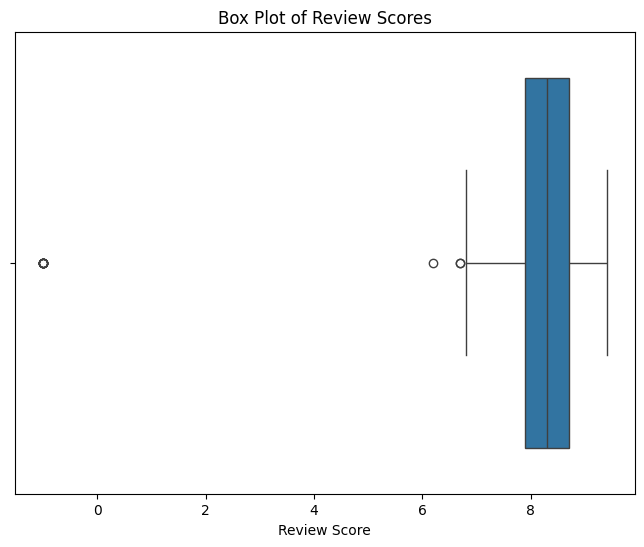

In [458]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exclude rows with missing values in 'review_score'
review_score_data = hotels_information['review_score'].dropna()

# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=review_score_data)
plt.title('Box Plot of Review Scores')
plt.xlabel('Review Score')
plt.show()

In [459]:
# Replace -1 with NaN in the 'review_score' column
import numpy as np
hotels_information['review_score'] = hotels_information['review_score'].replace(-1, np.nan)

# Verify changes
print(hotels_information['review_score'].isnull().sum())  # Should show combined count of NaN and previous -1 values

10


Correlation between review_score and stars:
              review_score     stars
review_score      1.000000  0.451369
stars             0.451369  1.000000


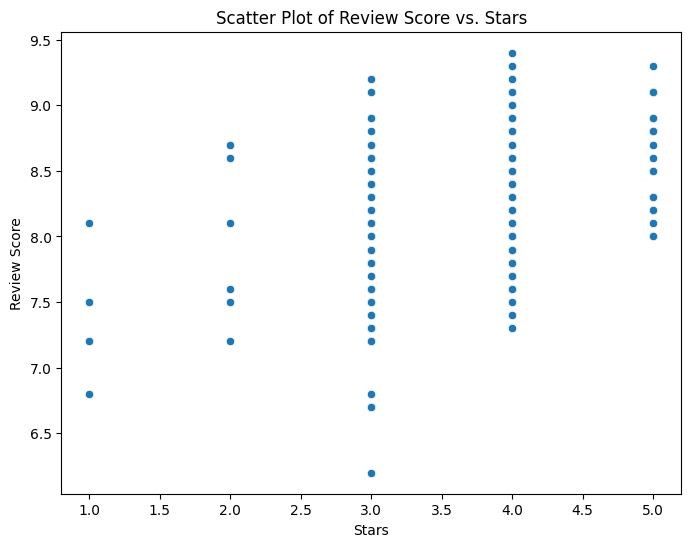

In [460]:
# Check correlation between review_score and stars
correlation = hotels_information[['review_score', 'stars']].corr()
print("Correlation between review_score and stars:")
print(correlation)

# Visualize the relationship using a scatterplot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(data=hotels_information, x='stars', y='review_score')
plt.title('Scatter Plot of Review Score vs. Stars')
plt.xlabel('Stars')
plt.ylabel('Review Score')
plt.show()

In [461]:
# Filter out rows with missing values in 'review_score' or 'stars'
filtered_data = hotels_information[['review_score', 'stars']].dropna()

# Calculate the correlation coefficient
correlation = filtered_data['review_score'].corr(filtered_data['stars'])

# Display the result
print(f"Correlation between review_score and stars: {correlation:.2f}")

Correlation between review_score and stars: 0.45


# 'hotels_information' Dataset: Latitude and Longitude

 📌 The geographical distribution of hotels was examined using a scatter plot of longitude and latitude. This visual exploration revealed that the hotels were generally spread out in two main regions.  To ease future analysis I   created a new column called city in the hotels_information DataFrame by applying a function that checks the latitude and longitude of each hotel and assigns either Brussels or Amsterdam based on specific geographic ranges.  I then visualized the geographical distribution of the hotels using a scatter plot.


Index(['our_hotel_id', 'name', 'review_score', 'stars', 'latitude',
       'longitude', 'room_count'],
      dtype='object')


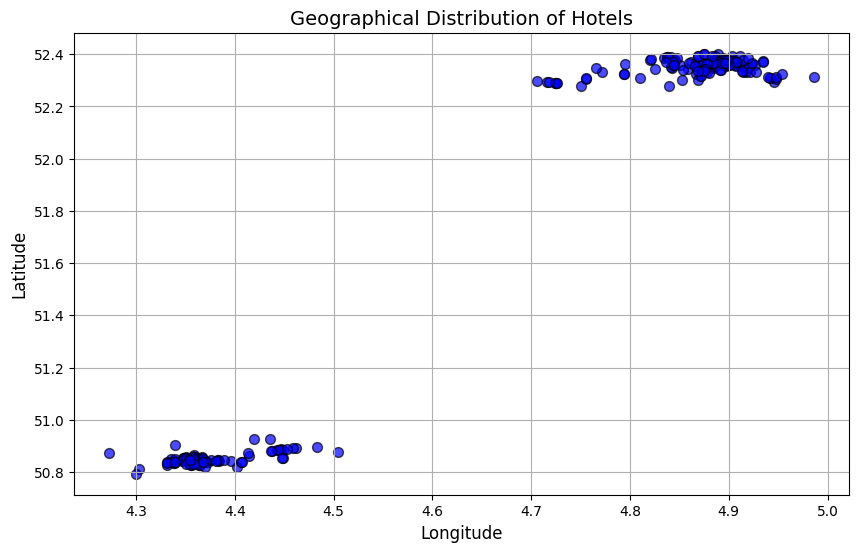

In [462]:


# Ensure the dataset is loaded properly
print(hotels_information.columns)  # Check column names to confirm they are as expected

# Scatter plot of hotels based on latitude and longitude
plt.figure(figsize=(10, 6))
plt.scatter(hotels_information['longitude'], hotels_information['latitude'], alpha=0.7, c='blue', edgecolor='k', s=50)
plt.title('Geographical Distribution of Hotels', fontsize=14)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(True)
plt.show()

In [463]:

# Define a function to assign city based on latitude and longitude
def assign_city(row):
    if 50 <= row['latitude'] <= 51.4 and 4 <= row['longitude'] <= 4.55:
        return 'Brussels'
    elif 52 <= row['latitude'] <= 54 and 4.6 <= row['longitude'] <= 6.6:
        return 'Amsterdam'
    else:
        return 'Unknown'

# Apply the function to the DataFrame and create a new column 'city'
hotels_information['city'] = hotels_information.apply(assign_city, axis=1)

#  Display the updated DataFrame with the new 'city' column
display (hotels_information[['name','latitude', 'longitude', 'city']].head(10))

name   latitude  longitude       city
0            Hotel Indigo Brussels - City  50.855711   4.359679   Brussels
1                  Facade Hotel Amsterdam  52.374966   4.899320  Amsterdam
2                            Chasse Hotel  52.369583   4.861395  Amsterdam
3                      Hotel Le Châtelain  50.826103   4.363769   Brussels
4        The Student Hotel Amsterdam City  52.354594   4.912632  Amsterdam
5                     NH Brussels Airport  50.889291   4.447009   Brussels
6                      Hotel TWENTY EIGHT  52.344485   4.858246  Amsterdam
7                            Avenue Hotel  52.376637   4.894656  Amsterdam
8                             Lloyd Hotel  52.374327   4.934803  Amsterdam
9  Aparthotel Adagio Brussels Grand Place  50.850022   4.351653   Brussels

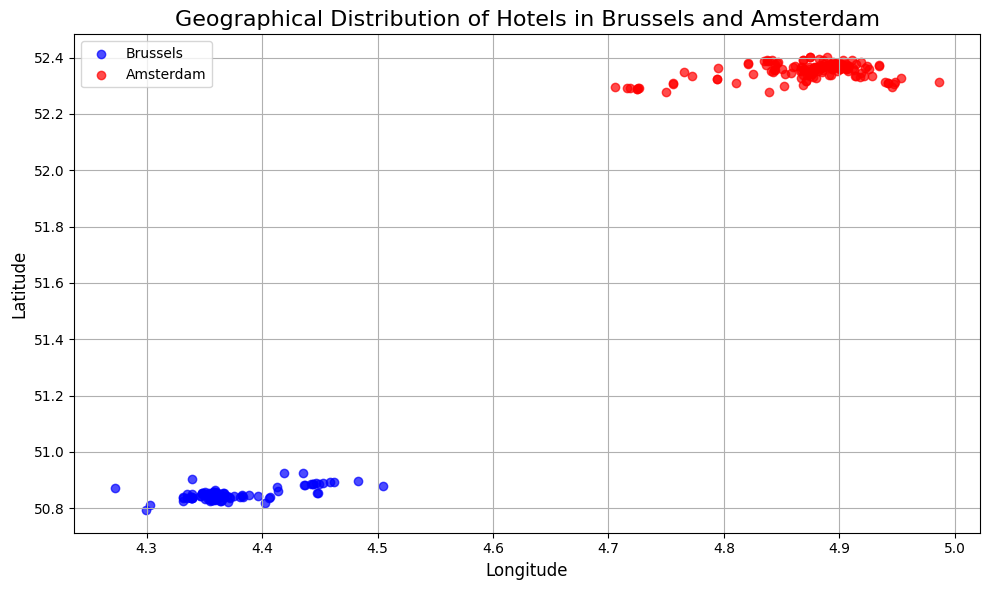

In [464]:

# Assuming the 'hotels_information' DataFrame has the 'latitude', 'longitude', and 'city' columns

# Create a scatter plot with latitude and longitude, color-coded by city
plt.figure(figsize=(10, 6))

# Plot for Brussels (city = 'Brussels')
plt.scatter(hotels_information[hotels_information['city'] == 'Brussels']['longitude'],
            hotels_information[hotels_information['city'] == 'Brussels']['latitude'],
            color='blue', label='Brussels', alpha=0.7)

# Plot for Amsterdam (city = 'Amsterdam')
plt.scatter(hotels_information[hotels_information['city'] == 'Amsterdam']['longitude'],
            hotels_information[hotels_information['city'] == 'Amsterdam']['latitude'],
            color='red', label='Amsterdam', alpha=0.7)

# Add title and labels
plt.title('Geographical Distribution of Hotels in Brussels and Amsterdam', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

#  Add a legend
plt.legend()

# Add grid for better visualization
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# MERGING BOTH DATASET

In [465]:
# Perform the merge on 'our_hotel_id'
hotels_information_dropped = hotels_information.drop(columns=['review_score'])
merged_data = pd.merge(hotels_information, booking_data, on='our_hotel_id', how='left')

In [466]:
display (merged_data)

our_hotel_id                              name  review_score  stars  \
0           3169410      Hotel Indigo Brussels - City           8.4    4.0   
1           3169410      Hotel Indigo Brussels - City           8.4    4.0   
2           3169410      Hotel Indigo Brussels - City           8.4    4.0   
3           3169410      Hotel Indigo Brussels - City           8.4    4.0   
4           3169410      Hotel Indigo Brussels - City           8.4    4.0   
...             ...                               ...           ...    ...   
25375       6672645  Hotel Agora Brussels Grand Place           8.8    3.0   
25376       6672645  Hotel Agora Brussels Grand Place           8.8    3.0   
25377       6672645  Hotel Agora Brussels Grand Place           8.8    3.0   
25378       6672645  Hotel Agora Brussels Grand Place           8.8    3.0   
25379       6672645  Hotel Agora Brussels Grand Place           8.8    3.0   

        latitude  longitude  room_count      city arrival_date  lead_time  \
0      50.855711   4.359679       283.0  Brussels   2021-01-23          1   
1      50.855711   4.359679       283.0  Brussels   2021-01-24          2   
2      50.855711   4.359679       283.0  Brussels   2021-01-25          3   
3      50.855711   4.359679       283.0  Brussels   2021-01-26          4   
4      50.855711   4.359679       283.0  Brussels   2021-01-27          5   
...          ...        ...         ...       ...          ...        ...   
25375  50.846179   4.354423        22.0  Brussels   2021-04-18         86   
25376  50.846179   4.354423        22.0  Brussels   2021-04-19         87   
25377  50.846179   4.354423        22.0  Brussels   2021-04-20         88   
25378  50.846179   4.354423        22.0  Brussels   2021-04-21         89   
25379  50.846179   4.354423        22.0  Brussels   2021-04-22         90   

           room_name meal_type_included  max_persons  price_value_ref  \
0      Standard Room               NONE          2.0              NaN   
1      Standard Room               NONE          2.0              NaN   
2      Standard Room               NONE          2.0              NaN   
3      Standard Room               NONE          2.0              NaN   
4      Standard Room               NONE          2.0            133.0   
...              ...                ...          ...              ...   
25375      Twin Room               NONE          2.0             83.0   
25376      Twin Room               NONE          2.0             83.0   
25377      Twin Room               NONE          2.0             83.0   
25378      Twin Room               NONE          2.0             83.0   
25379      Twin Room               NONE          2.0             83.0   

       price_value_non_ref  is_sold_out  missing_count room_category  \
0                    87.55        False              1      Standard   
1                    87.55        False              1      Standard   
2                   113.05        False              1      Standard   
3                   113.05        False              1      Standard   
4                   113.05        False              0      Standard   
...                    ...          ...            ...           ...   
25375                58.00        False              0          Twin   
25376                58.00        False              0          Twin   
25377                58.00        False              0          Twin   
25378                58.00        False              0          Twin   
25379                58.00        False              0          Twin   

       average_price  
0             87.550  
1             87.550  
2            113.050  
3            113.050  
4            123.025  
...              ...  
25375         70.500  
25376         70.500  
25377         70.500  
25378         70.500  
25379         70.500  

[25380 rows x 19 columns]

In [467]:
display (merged_data)

our_hotel_id                              name  review_score  stars  \
0           3169410      Hotel Indigo Brussels - City           8.4    4.0   
1           3169410      Hotel Indigo Brussels - City           8.4    4.0   
2           3169410      Hotel Indigo Brussels - City           8.4    4.0   
3           3169410      Hotel Indigo Brussels - City           8.4    4.0   
4           3169410      Hotel Indigo Brussels - City           8.4    4.0   
...             ...                               ...           ...    ...   
25375       6672645  Hotel Agora Brussels Grand Place           8.8    3.0   
25376       6672645  Hotel Agora Brussels Grand Place           8.8    3.0   
25377       6672645  Hotel Agora Brussels Grand Place           8.8    3.0   
25378       6672645  Hotel Agora Brussels Grand Place           8.8    3.0   
25379       6672645  Hotel Agora Brussels Grand Place           8.8    3.0   

        latitude  longitude  room_count      city arrival_date  lead_time  \
0      50.855711   4.359679       283.0  Brussels   2021-01-23          1   
1      50.855711   4.359679       283.0  Brussels   2021-01-24          2   
2      50.855711   4.359679       283.0  Brussels   2021-01-25          3   
3      50.855711   4.359679       283.0  Brussels   2021-01-26          4   
4      50.855711   4.359679       283.0  Brussels   2021-01-27          5   
...          ...        ...         ...       ...          ...        ...   
25375  50.846179   4.354423        22.0  Brussels   2021-04-18         86   
25376  50.846179   4.354423        22.0  Brussels   2021-04-19         87   
25377  50.846179   4.354423        22.0  Brussels   2021-04-20         88   
25378  50.846179   4.354423        22.0  Brussels   2021-04-21         89   
25379  50.846179   4.354423        22.0  Brussels   2021-04-22         90   

           room_name meal_type_included  max_persons  price_value_ref  \
0      Standard Room               NONE          2.0              NaN   
1      Standard Room               NONE          2.0              NaN   
2      Standard Room               NONE          2.0              NaN   
3      Standard Room               NONE          2.0              NaN   
4      Standard Room               NONE          2.0            133.0   
...              ...                ...          ...              ...   
25375      Twin Room               NONE          2.0             83.0   
25376      Twin Room               NONE          2.0             83.0   
25377      Twin Room               NONE          2.0             83.0   
25378      Twin Room               NONE          2.0             83.0   
25379      Twin Room               NONE          2.0             83.0   

       price_value_non_ref  is_sold_out  missing_count room_category  \
0                    87.55        False              1      Standard   
1                    87.55        False              1      Standard   
2                   113.05        False              1      Standard   
3                   113.05        False              1      Standard   
4                   113.05        False              0      Standard   
...                    ...          ...            ...           ...   
25375                58.00        False              0          Twin   
25376                58.00        False              0          Twin   
25377                58.00        False              0          Twin   
25378                58.00        False              0          Twin   
25379                58.00        False              0          Twin   

       average_price  
0             87.550  
1             87.550  
2            113.050  
3            113.050  
4            123.025  
...              ...  
25375         70.500  
25376         70.500  
25377         70.500  
25378         70.500  
25379         70.500  

[25380 rows x 19 columns]

In [468]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25380 entries, 0 to 25379
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   our_hotel_id         25380 non-null  int64   
 1   name                 25380 non-null  object  
 2   review_score         24480 non-null  float64 
 3   stars                25380 non-null  float64 
 4   latitude             25380 non-null  float64 
 5   longitude            25380 non-null  float64 
 6   room_count           25380 non-null  float64 
 7   city                 25380 non-null  object  
 8   arrival_date         25380 non-null  object  
 9   lead_time            25380 non-null  int64   
 10  room_name            22756 non-null  category
 11  meal_type_included   22756 non-null  category
 12  max_persons          22756 non-null  float64 
 13  price_value_ref      22597 non-null  float64 
 14  price_value_non_ref  22756 non-null  float64 
 15  is_sold_out        

# 6. COMPREHENSIVE ANALYSIS


## 6.1 Cluster Analysis of Combined Scores and Prices: Insights and Geographic Independence

In this section, I explored clustering techniques to group data based on two key metrics: the combined score and average price. The combined score was calculated as a weighted average of normalized values for features such as stars and review scores, providing a measure that balances these aspects. Average price was computed as the mean of two price-related variables, ensuring a comprehensive representation of pricing trends. These features were standardized to facilitate clustering, and I applied K-means to partition the data into three clusters. The selection of three clusters was guided by the Elbow Method and Silhouette Scores, which indicated that this number best captured the structure in the data.

Once the clusters were identified, I examined their characteristics. Cluster 0 was characterized by lower combined scores and lower average prices, representing more budget-friendly offerings with less emphasis on quality. Cluster 1 had higher combined scores and moderately higher prices, indicating mid-range options that provided better value. Cluster 2, while similar in combined score to Cluster 1, was distinguished by significantly higher prices, likely pointing to premium or luxury items. This segmentation was visualized in a scatterplot, where the clusters showed clear distinctions in the space defined by combined scores and average prices.

To validate the significance of these differences, I conducted statistical tests. An ANOVA revealed that the means of both combined scores and average prices varied significantly across clusters. The low p-values from these tests  underscored the robustness of these differences. Pairwise comparisons using Tukey’s HSD test further clarified which clusters differed from one another. For the combined score, all cluster pairs showed statistically significant differences, including the comparison between Clusters 1 and 2, where a smaller but significant difference was observed. For average price, all comparisons revealed significant differences, with Cluster 2 consistently being the most expensive. These results suggest a meaningful segmentation of the data into distinct groups with clear implications. Cluster 0 appeals to cost-conscious users, Cluster 1 targets those seeking balanced value and quality, and Cluster 2 caters to a high-end market.

Additionally, I have also created a stacked bar chart to visualize the distribution of hotels across three clusters—Budget, Mid-Range, and Luxury—for two cities, Amsterdam and Brussels. Amsterdam has a significantly higher total number of hotels than Brussels, as shown by its taller bar. In both cities, Budget hotels dominate, followed by Mid-Range and Luxury hotels, with Luxury being the least represented. Despite the difference in total hotel numbers, the relative proportions of clusters are similar between the two cities, suggesting comparable accommodation trends.

In [405]:
# Calculate the average price and add it as a new column
merged_data['average_price'] = merged_data[['price_value_ref', 'price_value_non_ref']].mean(axis=1)

# Create the combined score
merged_data['stars_normalized'] = (merged_data['stars'] - merged_data['stars'].min()) / (merged_data['stars'].max() - merged_data['stars'].min())
merged_data['review_score_normalized'] = (merged_data['review_score'] - merged_data['review_score'].min()) / (merged_data['review_score'].max() - merged_data['review_score'].min())
merged_data['combined_score'] = 0.5 * merged_data['stars_normalized'] + 0.5 * merged_data['review_score_normalized']

# Select features for clustering (using combined_score and average_price)
features_with_combined = merged_data[['combined_score', 'average_price']].dropna()

# Standardize the features
scaler = StandardScaler()
scaled_features_combined = scaler.fit_transform(features_with_combined)

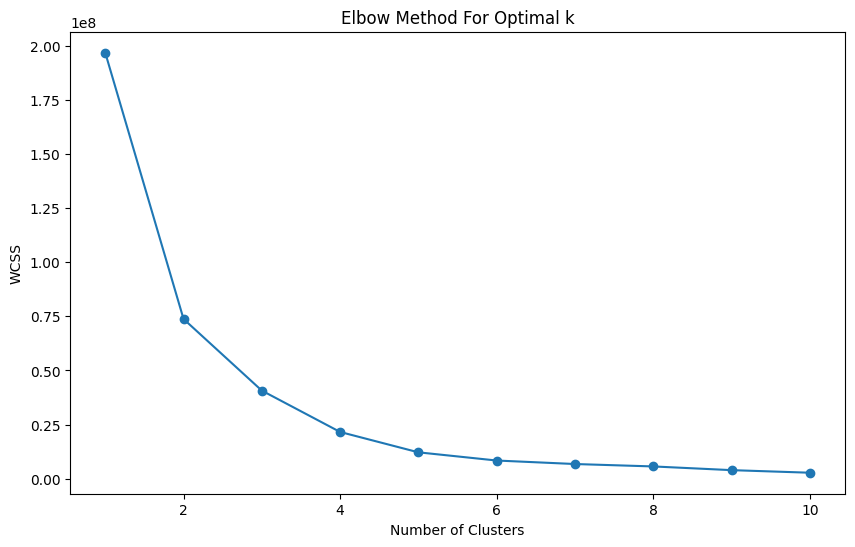

In [470]:

# Calculate WCSS for different numbers of clusters
wcss = []
for i in range(1, 11):  # Test from 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features_with_combined)
    wcss.append(kmeans.inertia_)

# Plot the WCSS against the number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

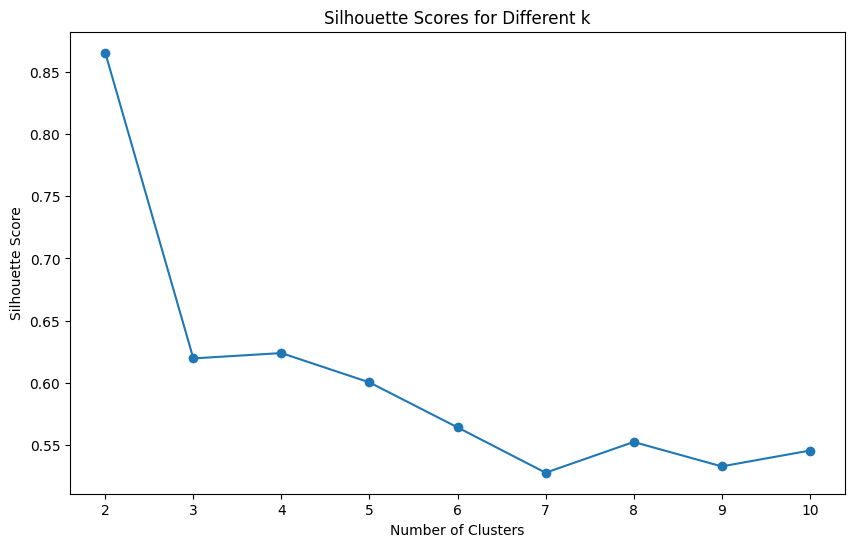

In [342]:
silhouette_scores = []
for i in range(2, 11):  # Test from 2 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features_with_combined)
    silhouette_scores.append(silhouette_score(features_with_combined, kmeans.labels_))

# Step 2: Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

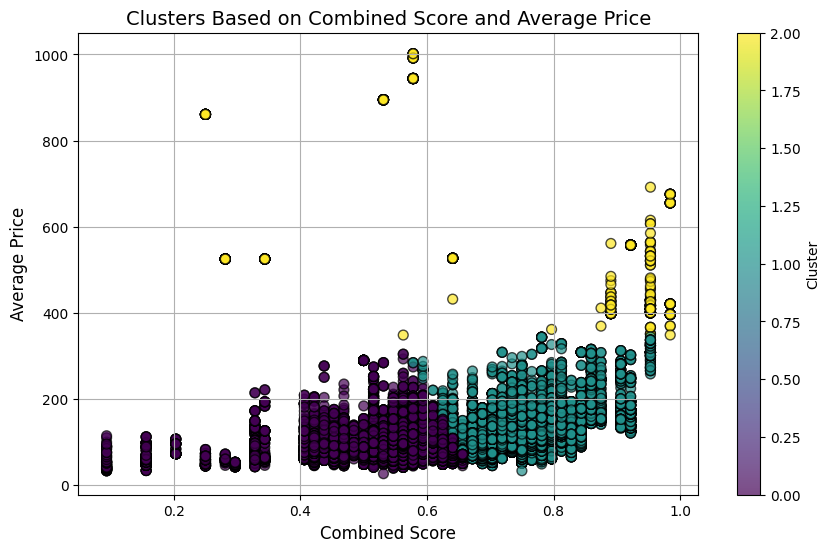

         combined_score  average_price
cluster                               
0.0            0.522025      93.663190
1.0            0.759624     129.109899
2.0            0.748465     560.309707


In [471]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate the average price and add it as a new column
merged_data['average_price'] = merged_data[['price_value_ref', 'price_value_non_ref']].mean(axis=1)

# Create the combined score
merged_data['stars_normalized'] = (merged_data['stars'] - merged_data['stars'].min()) / (merged_data['stars'].max() - merged_data['stars'].min())
merged_data['review_score_normalized'] = (merged_data['review_score'] - merged_data['review_score'].min()) / (merged_data['review_score'].max() - merged_data['review_score'].min())
merged_data['combined_score'] = 0.5 * merged_data['stars_normalized'] + 0.5 * merged_data['review_score_normalized']

# Select features for clustering (using combined_score and average_price)
filtered_data = merged_data[['combined_score', 'average_price']].dropna()

# Standardize the features
scaler = StandardScaler()
scaled_features_combined = scaler.fit_transform(filtered_data)

# Perform KMeans clustering
kmeans_combined = KMeans(n_clusters=3, random_state=42)
filtered_data['cluster'] = kmeans_combined.fit_predict(scaled_features_combined)

# Add cluster labels back to a copy of the original dataset
merged_data_with_clusters = merged_data.copy()
merged_data_with_clusters.loc[filtered_data.index, 'cluster'] = filtered_data['cluster']

# Visualize the clustering results
plt.figure(figsize=(10, 6))
plt.scatter(
    merged_data_with_clusters['combined_score'],
    merged_data_with_clusters['average_price'],
    c=merged_data_with_clusters['cluster'],
    cmap='viridis',
    s=50,
    alpha=0.7,
    edgecolor='k'
)
plt.title('Clusters Based on Combined Score and Average Price', fontsize=14)
plt.xlabel('Combined Score', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# Display cluster statistics
cluster_summary_combined = merged_data_with_clusters.groupby('cluster')[['combined_score', 'average_price']].mean()
print(cluster_summary_combined)

In [477]:
import pandas as pd
from scipy.stats import f_oneway

# Ensure there are no NaN clusters before running ANOVA
valid_clusters_data = merged_data_with_clusters.dropna(subset=['cluster'])

# Prepare data for ANOVA test
cluster_groups_combined_score = [
    valid_clusters_data[valid_clusters_data['cluster'] == i]['combined_score'] for i in valid_clusters_data['cluster'].unique()
]
cluster_groups_average_price = [
    valid_clusters_data[valid_clusters_data['cluster'] == i]['average_price'] for i in valid_clusters_data['cluster'].unique()
]

# Ensure there is sufficient data in each cluster for ANOVA
if all(len(group) > 1 for group in cluster_groups_combined_score) and all(len(group) > 1 for group in cluster_groups_average_price):
    # Perform ANOVA test for combined_score
    f_stat_combined, p_value_combined = f_oneway(*cluster_groups_combined_score)

    # Perform ANOVA test for average_price
    f_stat_price, p_value_price = f_oneway(*cluster_groups_average_price)

    # Display results
    anova_results = {
        "Feature": ["Combined Score", "Average Price"],
        "F-Statistic": [f_stat_combined, f_stat_price],
        "P-Value": [p_value_combined, p_value_price],
    }

    anova_results_df = pd.DataFrame(anova_results)

    print("ANOVA Results for Clustering Features:")
    print(anova_results_df)
else:
    print("Not enough data in some clusters to perform ANOVA.")

ANOVA Results for Clustering Features:
          Feature   F-Statistic  P-Value
0  Combined Score  16666.745010      0.0
1   Average Price  21225.408116      0.0


In [480]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Ensure valid data for Tukey's HSD
valid_clusters_data['cluster'] = valid_clusters_data['cluster'].astype(int)

# Perform Tukey's HSD test for combined_score
tukey_combined = pairwise_tukeyhsd(
    endog=valid_clusters_data['combined_score'],  # Dependent variable
    groups=valid_clusters_data['cluster'],        # Grouping variable
    alpha=0.05                                    # Significance level
)
print("Tukey HSD Test for Combined Score:")
print(tukey_combined)

# Perform Tukey's HSD test for average_price
tukey_price = pairwise_tukeyhsd(
    endog=valid_clusters_data['average_price'],
    groups=valid_clusters_data['cluster'],
    alpha=0.05
)
print("\nTukey HSD Test for Average Price:")
print(tukey_price)


<ipython-input-480-cfe1cc83f7c4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_clusters_data['cluster'] = valid_clusters_data['cluster'].astype(int)


Tukey HSD Test for Combined Score:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1   0.2376    0.0  0.2345 0.2407   True
     0      2   0.2264    0.0  0.2172 0.2357   True
     1      2  -0.0112 0.0123 -0.0203 -0.002   True
---------------------------------------------------

Tukey HSD Test for Average Price:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
     0      1  35.4467   0.0  33.6716  37.2219   True
     0      2 466.6465   0.0 461.3315 471.9616   True
     1      2 431.1998   0.0 425.9056  436.494   True
-----------------------------------------------------


ValueError: invalid literal for int() with base 10: '0.0'

<Figure size 1200x600 with 0 Axes>

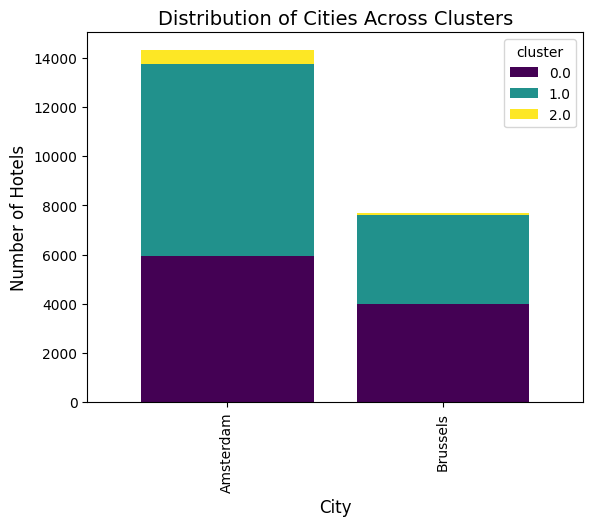

In [482]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Create a cross-tabulation to see the distribution of cities in clusters
# Ensure the 'cluster' column exists and contains valid data
if 'cluster' in merged_data_with_clusters.columns:
    city_cluster_distribution = pd.crosstab(merged_data_with_clusters['city'], merged_data_with_clusters['cluster'])

    # Step 2: Define the cluster labels
    cluster_labels = {
        0: 'Budget',       # Cluster 0 is mapped to 'Budget'
        1: 'Mid-Range',    # Cluster 1 is mapped to 'Mid-Range'
        2: 'Luxury'        # Cluster 2 is mapped to 'Luxury'
    }

    # Step 3: Plot the distribution
    plt.figure(figsize=(12, 6))
    ax = city_cluster_distribution.plot(kind='bar', stacked=True, colormap='viridis', width=0.8)

    # Step 4: Add titles and labels
    plt.title('Distribution of Cities Across Clusters', fontsize=14)
    plt.xlabel('City', fontsize=12)
    plt.ylabel('Number of Hotels', fontsize=12)

    # Step 5: Modify the legend to include the custom labels
    handles, labels = ax.get_legend_handles_labels()
    labels = [cluster_labels[int(label)] for label in labels]  # Replace cluster numbers with custom labels
    ax.legend(handles, labels, title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Step 6: Add a grid for better readability
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)

    # Step 7: Show the plot
    plt.tight_layout()  # To avoid label overlap
    plt.show()
else:
    print("The 'cluster' column is missing. Please ensure clustering has been performed.")

## 6.2 How many hotels are available per arrival day in the next 90 days?

I processed and visualized hotel availability data over a 90-day period, filtering and grouping the data to highlight trends by city and cluster. I converted the arrival_date column to datetime format and filtered the dataset to include only dates between January 23, 2021, and April 23, 2021. To focus on available hotels, I excluded those marked as sold out. I used a dictionary to map numerical cluster IDs to descriptive names like Budget, Mid-Range, and Luxury, and assigned specific markers to cities—circles for Amsterdam and squares for Brussels—to visually distinguish them in the plot. For each city and cluster, I calculated the number of available hotels per day, plotted the trends, and added labels at the end of each line to clearly indicate the city and cluster. Finally, I styled the graph by removing the frame and legend, resulting in a clean and minimalist visualization.

The first graph shows the total number of available hotels per day across all cities and clusters. I observed consistent patterns with periodic dips, possibly due to specific high-demand days or other external factors affecting availability. The second graph breaks down the data by clusters. I noticed that the Mid-Range category consistently had the highest availability, followed by Budget. The Luxury cluster had the lowest availability, likely reflecting a smaller supply of luxury hotels. The third graph provides the most detailed breakdown, showing hotel availability for each city and cluster combination. Amsterdam had higher availability in the Mid-Range and Budget clusters compared to Brussels, while the Luxury cluster showed minimal activity for both cities. Distinct markers and colors made it easy to differentiate between city-cluster combinations. These visualizations clearly highlighted trends in hotel availability, offering insights into supply and demand across different cities and hotel categories.

In [485]:
print(f"Earliest date in the dataset: {merged_data['arrival_date'].min()}")
print(f"Latest date in the dataset: {merged_data['arrival_date'].max()}")

Earliest date in the dataset: 2021-01-23
Latest date in the dataset: 2021-04-22


In [486]:
unique_values_count = merged_data['arrival_date'].nunique()
print(f"Number of unique values in 'arrival_date': {unique_values_count}")

Number of unique values in 'arrival_date': 90


In [498]:
# Step 1: Convert 'arrival_date' to datetime format
merged_data['arrival_date'] = pd.to_datetime(merged_data['arrival_date'], errors='coerce')

# Step 2: Set the start and end dates
start_date = datetime(2021, 1, 23)
end_date = start_date + timedelta(days=90)

# Step 3: Filter data for the next 90 days
next_90_days_data = merged_data[
    (merged_data['arrival_date'] >= start_date) & (merged_data['arrival_date'] <= end_date)
]

# Step 4: Separate available and sold-out hotels
available_hotels = next_90_days_data[next_90_days_data['is_sold_out'] == False]
sold_out_hotels = next_90_days_data[next_90_days_data['is_sold_out'] == True]

# Step 5: Count hotels available and sold out per day
availability_per_day = available_hotels.groupby('arrival_date')['our_hotel_id'].count()
sold_out_per_day = sold_out_hotels.groupby('arrival_date')['our_hotel_id'].count()

# Step 6: Display results with scatter plots connected by lines
if not availability_per_day.empty or not sold_out_per_day.empty:
    print(f"Hotel availability per day from {start_date.date()} to {end_date.date()}:")
    print("Available Hotels Per Day:")
    print(availability_per_day)
    print("\nSold-Out Hotels Per Day:")
    print(sold_out_per_day)

    # Create scatter plot with connected lines
    plt.figure(figsize=(20, 6))

    # Plot available hotels
    plt.plot(availability_per_day.index, availability_per_day, marker='o', linestyle='-', color='b', label='Available Hotels')

    # Plot sold-out hotels
    plt.plot(sold_out_per_day.index, sold_out_per_day, marker='x', linestyle='--', color='r', label='Sold-Out Hotels')

    # Add title and labels
    plt.title("Hotel Availability and Sold-Out Trends per Day", fontsize=16)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Number of Hotels", fontsize=12)

    # Enable grid for better visualization
    plt.grid(True, linestyle='--', color='gray', alpha=0.7)

    # Format x-axis ticks to show day and month (dd-mm-yyyy)
    all_dates = availability_per_day.index.union(sold_out_per_day.index)  # Combine dates from both series
    plt.xticks(all_dates, all_dates.strftime('%d-%m-%Y'), rotation=45)

    # Add legend
    plt.legend(title="Hotel Status")

    # Show plot
    plt.tight_layout()
    plt.show()
else:
    print(f"No available or sold-out hotels found in the date range from {start_date.date()} to {end_date.date()}.")

Hotel availability per day from 2021-01-23 to 2021-04-23:
Available Hotels Per Day:
arrival_date
2021-01-23    200
2021-01-24    208
2021-01-25    215
2021-01-26    216
2021-01-27    217
             ... 
2021-04-18    272
2021-04-19    276
2021-04-20    277
2021-04-21    276
2021-04-22    276
Name: our_hotel_id, Length: 90, dtype: int64

Sold-Out Hotels Per Day:
arrival_date
2021-01-23    82
2021-01-24    74
2021-01-25    67
2021-01-26    66
2021-01-27    65
              ..
2021-04-18    10
2021-04-19     6
2021-04-20     5
2021-04-21     6
2021-04-22     6
Name: our_hotel_id, Length: 90, dtype: int64


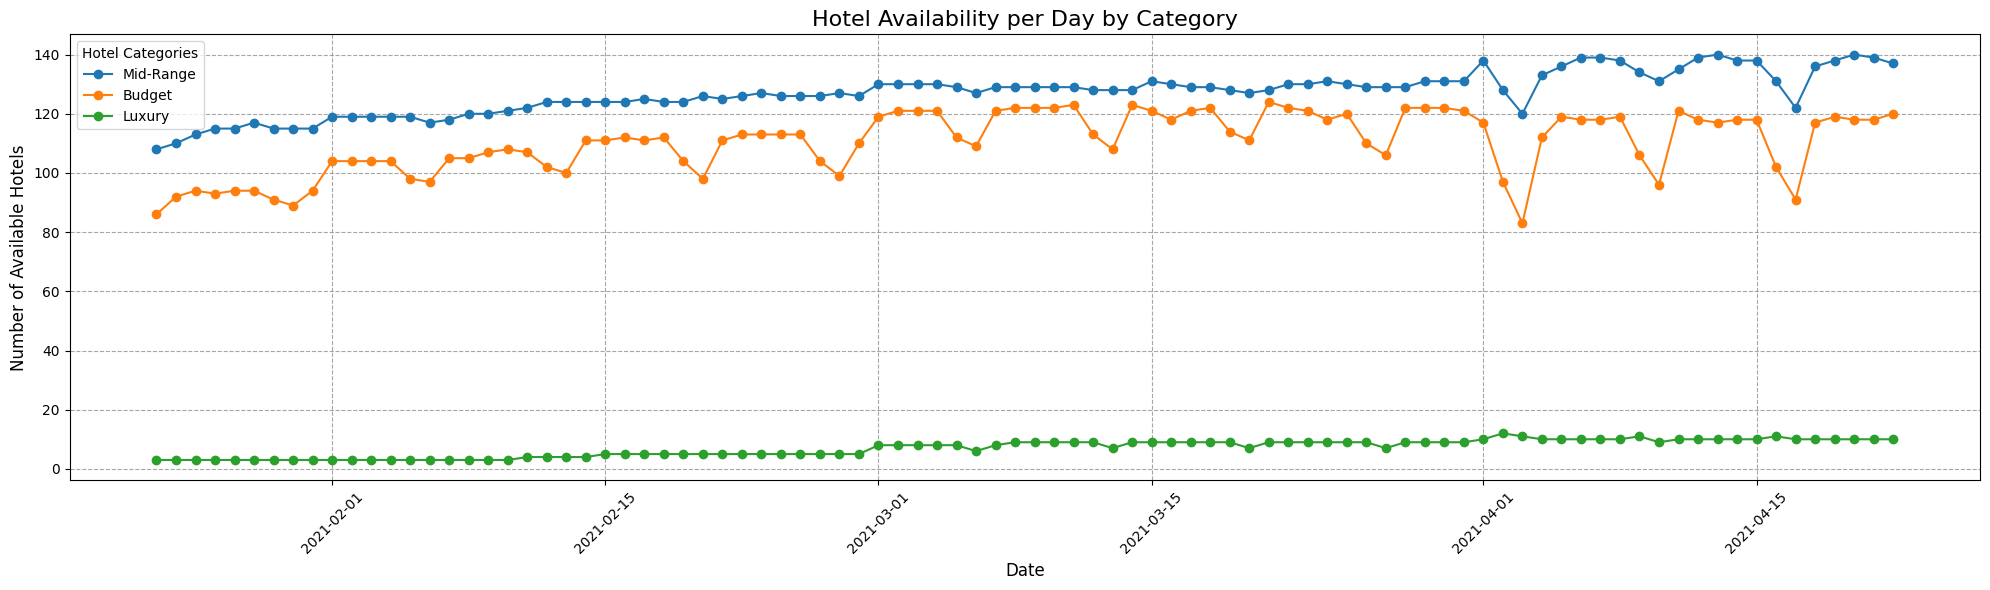

In [496]:
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Ensure 'arrival_date' is in datetime format
merged_data_with_clusters['arrival_date'] = pd.to_datetime(merged_data_with_clusters['arrival_date'], errors='coerce')

# Step 2: Set the start and end dates
start_date = datetime(2021, 1, 23)
end_date = start_date + timedelta(days=90)

# Step 3: Filter data for the next 90 days
next_90_days_data = merged_data_with_clusters[
    (merged_data_with_clusters['arrival_date'] >= start_date) & (merged_data_with_clusters['arrival_date'] <= end_date)
]

# Step 4: Exclude hotels that are sold out
available_hotels = next_90_days_data[next_90_days_data['is_sold_out'] == False]

# Check if there are clusters to plot
if 'cluster' not in available_hotels.columns or available_hotels['cluster'].isnull().all():
    print("No cluster data available for plotting.")
else:
    # Step 5: Define the descriptive labels for the clusters
    cluster_labels = {
        0: 'Budget',       # Cluster 0 is mapped to 'Budget'
        1: 'Mid-Range',    # Cluster 1 is mapped to 'Mid-Range'
        2: 'Luxury'        # Cluster 2 is mapped to 'Luxury'
    }

    # Step 6: Plot availability per day for each cluster
    plt.figure(figsize=(20, 6))

    # Get unique cluster values
    clusters = available_hotels['cluster'].dropna().unique()

    # Plot for each cluster
    for cluster in clusters:
        cluster_data = available_hotels[available_hotels['cluster'] == cluster]
        availability_per_day = cluster_data.groupby('arrival_date')['our_hotel_id'].count()

        # Plot with the descriptive label instead of just the cluster number
        plt.plot(
            availability_per_day.index,
            availability_per_day,
            marker='o',
            linestyle='-',
            label=cluster_labels.get(cluster, f'Cluster {cluster}')
        )

    # Step 7: Add title, labels, and grid
    plt.title("Hotel Availability per Day by Category", fontsize=16)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Number of Available Hotels", fontsize=12)

    # Format the x-axis to show dates in the dd-mm-yyyy format
    plt.xticks(rotation=45)

    # Enable grid with styling
    plt.grid(True, linestyle='--', color='gray', alpha=0.7)

    # Add the legend with title 'Hotel Categories'
    plt.legend(title='Hotel Categories')

    # Show the plot with tight layout to prevent label overlap
    plt.tight_layout()
    plt.show()

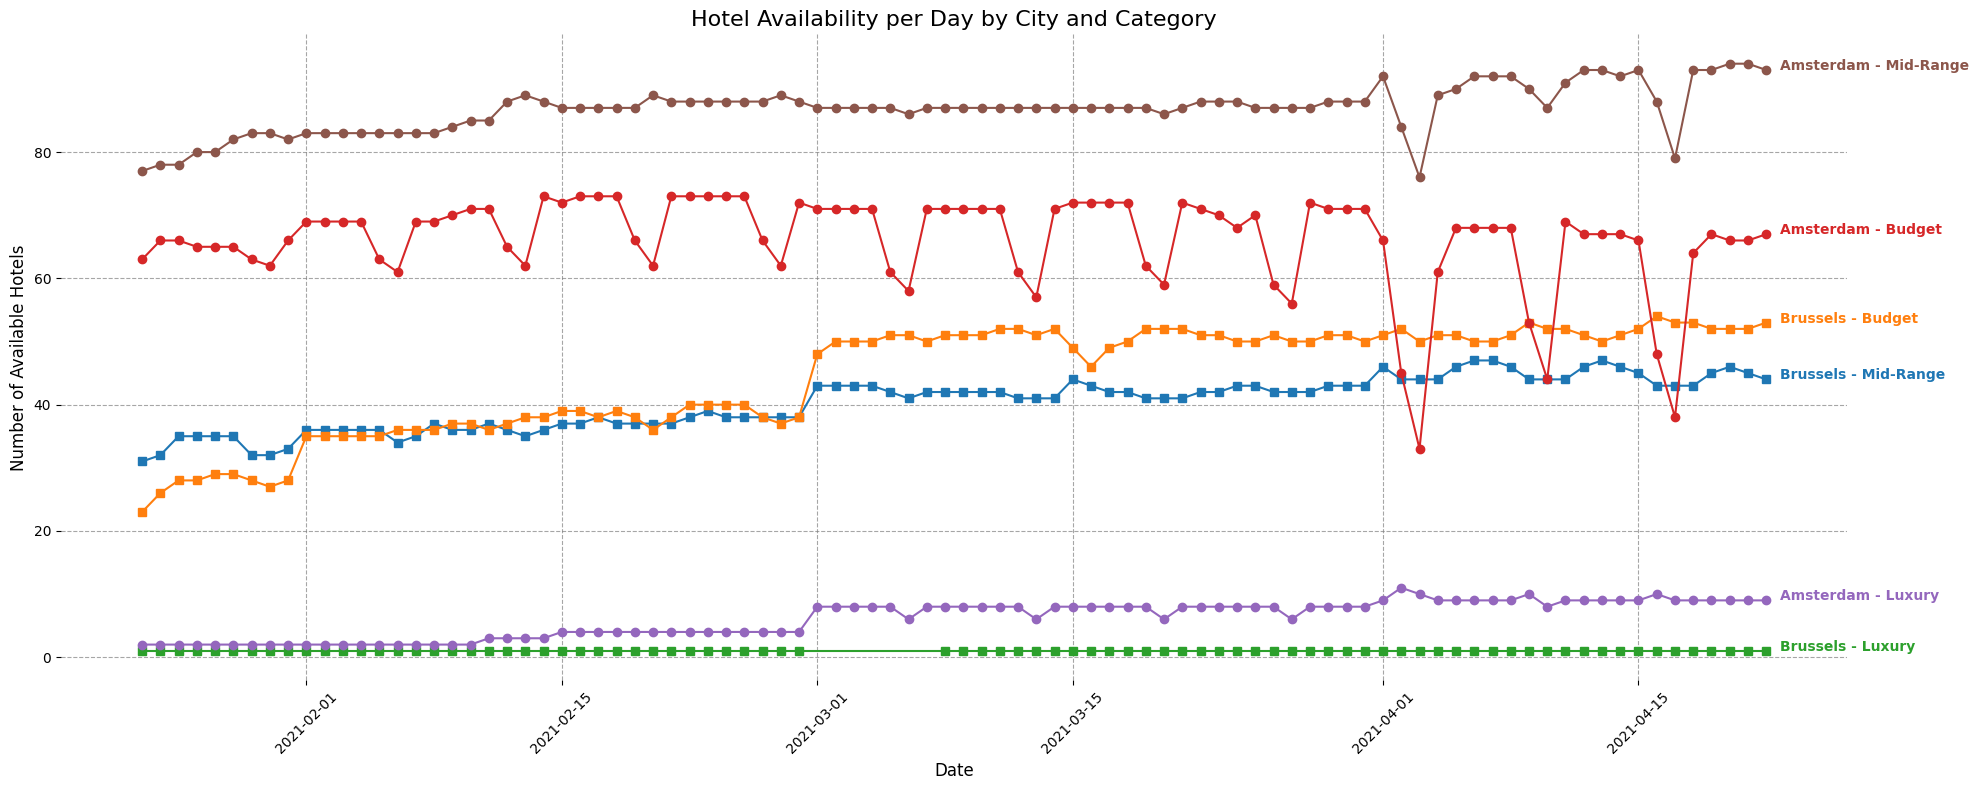

In [492]:
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Convert 'arrival_date' to datetime format
merged_data_with_clusters['arrival_date'] = pd.to_datetime(merged_data_with_clusters['arrival_date'], errors='coerce')

# Step 2: Set the start and end dates
start_date = datetime(2021, 1, 23)
end_date = start_date + timedelta(days=90)

# Step 3: Filter data for the next 90 days
next_90_days_data = merged_data_with_clusters[
    (merged_data_with_clusters['arrival_date'] >= start_date) & (merged_data_with_clusters['arrival_date'] <= end_date)
]

# Step 4: Exclude hotels that are sold out
available_hotels = next_90_days_data[next_90_days_data['is_sold_out'] == False]

# Check if there are cities and clusters to plot
if 'city' not in available_hotels.columns or 'cluster' not in available_hotels.columns:
    print("The required columns 'city' or 'cluster' are missing.")
elif available_hotels.empty:
    print("No available hotels to plot within the selected date range.")
else:
    # Step 5: Define the descriptive labels for the clusters
    cluster_labels = {
        0: 'Budget',
        1: 'Mid-Range',
        2: 'Luxury'
    }

    # Step 6: Define distinctive markers for each city
    city_markers = {
        'Amsterdam': 'o',  # Circle marker for Amsterdam
        'Brussels': 's'    # Square marker for Brussels
    }

    # Step 7: Plot availability per day for each city and cluster in the same graph
    plt.figure(figsize=(20, 8))

    # Loop over each city and cluster
    cities = available_hotels['city'].unique()
    for city in cities:
        city_data = available_hotels[available_hotels['city'] == city]
        for cluster in city_data['cluster'].dropna().unique():
            cluster_data = city_data[city_data['cluster'] == cluster]
            availability_per_day = cluster_data.groupby('arrival_date')['our_hotel_id'].count()

            # Plot with city-specific markers and cluster labels
            line, = plt.plot(
                availability_per_day.index,
                availability_per_day,
                marker=city_markers.get(city, 'o'),  # Default marker if city is not in dictionary
                linestyle='-',
                label=None  # Exclude legend entries
            )

            # Add labels on top of each line
            if not availability_per_day.empty:
                plt.annotate(
                    f"{city} - {cluster_labels.get(cluster, f'Cluster {cluster}')}",
                    xy=(availability_per_day.index[-1], availability_per_day.iloc[-1]),
                    xytext=(10, 0),  # Offset for the text
                    textcoords='offset points',
                    color=line.get_color(),
                    fontsize=10,
                    fontweight='bold'
                )

    # Step 8: Add title, labels, and grid
    plt.title("Hotel Availability per Day by City and Category", fontsize=16)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Number of Available Hotels", fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', color='gray', alpha=0.7)

    # Step 9: Remove the frame
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

#test

In [434]:
sold_out_hotels = merged_data[merged_data['is_sold_out'] == True]
display (sold_out_hotels)

Empty DataFrame
Columns: [our_hotel_id, name, review_score, stars, latitude, longitude, room_count, city, arrival_date, lead_time, room_name, meal_type_included, max_persons, price_value_ref, price_value_non_ref, is_sold_out, missing_count, room_category, average_price, stars_normalized, review_score_normalized, combined_score, cluster]
Index: []

[0 rows x 23 columns]

In [ ]:
pip install kmodes


                           name  price_value_ref  updated_stars  cluster
0  Hotel Indigo Brussels - City              NaN            4.0        0
1  Hotel Indigo Brussels - City              NaN            4.0        0
2  Hotel Indigo Brussels - City              NaN            4.0        0
3  Hotel Indigo Brussels - City              NaN            4.0        0
4  Hotel Indigo Brussels - City            133.0            4.0        0


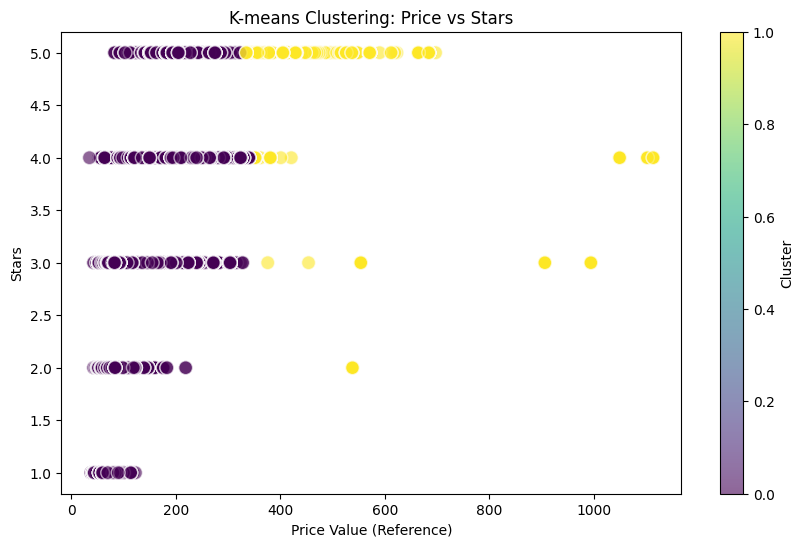

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Select features for clustering (only 'price_value_ref' and 'stars')
features = merged_data[['price_value_ref', 'updated_stars']]

# Step 2: Handle missing data
features = features.fillna(features.median())  # Fill missing values with the median

# Step 3: Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 4: Apply K-means clustering (e.g., 2 clusters for simplicity)
kmeans = KMeans(n_clusters=2, random_state=42)
merged_data['cluster'] = kmeans.fit_predict(scaled_features)

# Step 5: Display the resulting clusters
print(merged_data[['name', 'price_value_ref', 'updated_stars', 'cluster']].head())

# Step 6: Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['price_value_ref'], merged_data['updated_stars'],
            c=merged_data['cluster'], cmap='viridis', alpha=0.6, edgecolors='w', s=100)

# Add labels and title
plt.xlabel('Price Value (Reference)')
plt.ylabel('Stars')
plt.title('K-means Clustering: Price vs Stars')
plt.colorbar(label='Cluster')
plt.show()


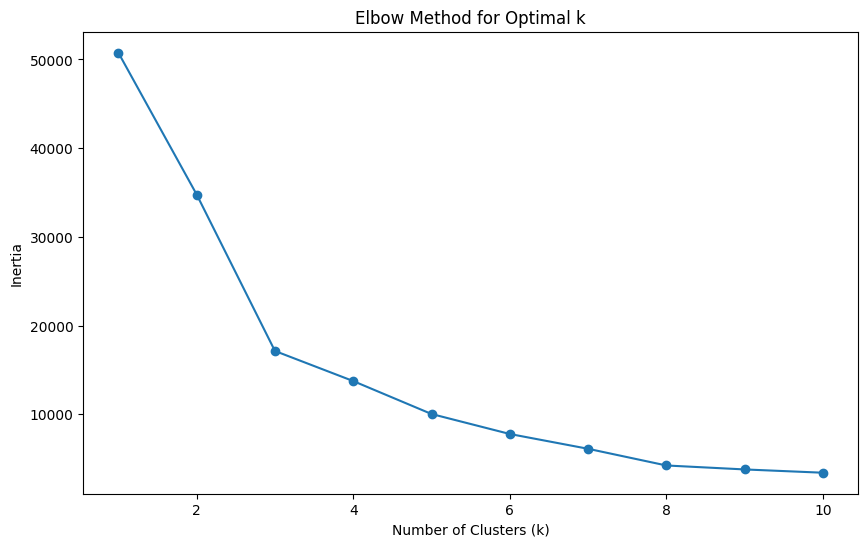

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate inertia for a range of cluster numbers
inertia = []
k_range = range(1, 11)  # Test for k=1 to k=10
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

# Test silhouette scores for a range of cluster numbers
silhouette_scores = []
for k in range(2, 11):  # Start from 2 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    silhouette_scores.append(silhouette_score(scaled_features, labels))

# Plot the Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='orange')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Analysis')
plt.show()


In [ ]:
# Get cluster centroids in the scaled feature space
centroids = kmeans.cluster_centers_

# Transform centroids back to the original feature scale
centroids_original = scaler.inverse_transform(centroids)

# Create a DataFrame for easier interpretation
centroids_df = pd.DataFrame(centroids_original, columns=['price_value_ref', 'updated_stars'])

print("Cluster Centroids (Original Feature Scale):")
print(centroids_df)


Cluster Centroids (Original Feature Scale):
   price_value_ref  updated_stars
0       109.243288       4.000000
1       579.129771       5.000000
2       100.625922       3.000000
3       205.901646       3.883659
4       166.929577       5.000000
5        70.933333       1.000000
6      1008.859504       3.438017
7       540.538462       2.292308
8        95.208178       2.000000
9       385.812065       4.918794


In [ ]:
cluster_stats = merged_data.groupby('cluster')['price_value_ref'].describe()
print("Price Value Statistics by Cluster:")
print(cluster_stats)


Price Value Statistics by Cluster:
           count        mean        std    min    25%    50%    75%     max
cluster                                                                    
0        21911.0  121.037652   50.52658   35.0   84.0  108.0  146.0   340.0
1          686.0  576.061224  215.29328  330.0  429.0  538.0  571.0  1113.0


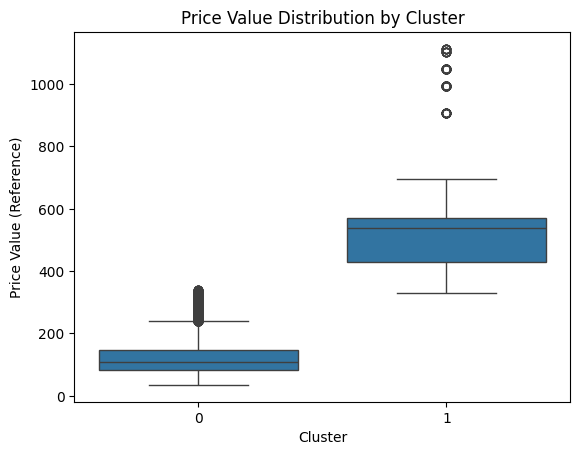

In [ ]:
import seaborn as sns
sns.boxplot(x='cluster', y='price_value_ref', data=merged_data)
plt.title('Price Value Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Price Value (Reference)')
plt.show()


Proportion of price values above 400 for each star class:
updated_stars
1.0     0.000000
2.0    14.603175
3.0     1.032448
4.0     0.459482
5.0    17.037037
Name: above_400, dtype: float64


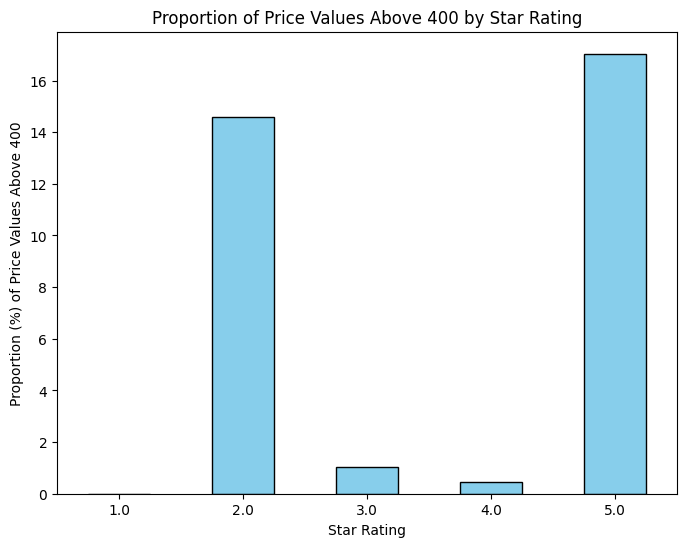

In [ ]:
# Define the threshold
threshold = 400

# Add a new column indicating whether price_value_ref is above the threshold
merged_data['above_400'] = merged_data['price_value_ref'] > threshold

# Calculate the proportion for each star class
proportion_above_400 = merged_data.groupby('updated_stars')['above_400'].mean() * 100

# Display the results
print("Proportion of price values above 400 for each star class:")
print(proportion_above_400)

# Plot the results
proportion_above_400.plot(kind='bar', color='skyblue', edgecolor='black', figsize=(8, 6))
plt.xlabel('Star Rating')
plt.ylabel('Proportion (%) of Price Values Above 400')
plt.title('Proportion of Price Values Above 400 by Star Rating')
plt.xticks(rotation=0)
plt.show()


In [ ]:
# Calculate average price for each location
location_avg_price = merged_data.groupby('location')['price_value_ref'].mean()

# Display results
print(location_avg_price.sort_values(ascending=False))

# Plot the average price by location
location_avg_price.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')
plt.xlabel('Location')
plt.ylabel('Average Price Value')
plt.title('Average Price by Location')
plt.xticks(rotation=45, ha='right')
plt.show()


KeyError: 'location'

                           name  price_value_non_ref  stars  cluster
0  Hotel Indigo Brussels - City                87.55    4.0        0
1  Hotel Indigo Brussels - City                87.55    4.0        0
2  Hotel Indigo Brussels - City               113.05    4.0        0
3  Hotel Indigo Brussels - City               113.05    4.0        0
4  Hotel Indigo Brussels - City               113.05    4.0        0


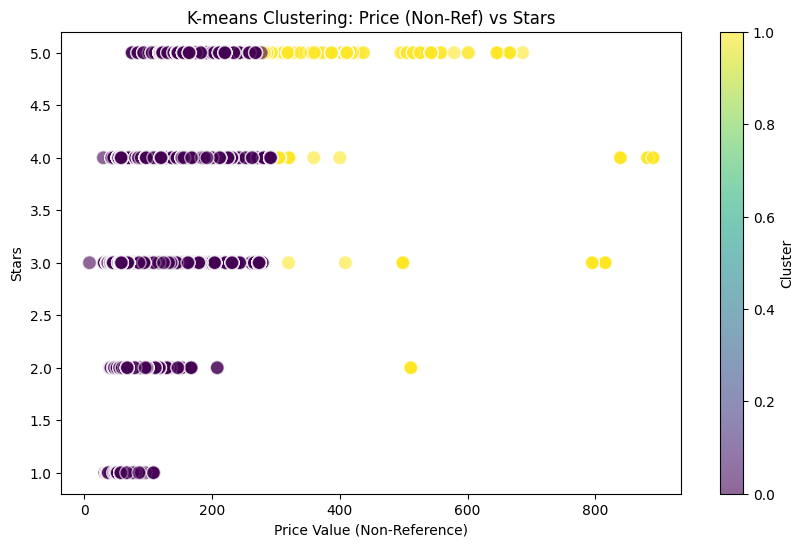

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Select features for clustering (only 'price_value_non_ref' and 'stars')
features = merged_data[['price_value_non_ref', 'stars']]

# Step 2: Handle missing data
features = features.fillna(features.median())  # Fill missing values with the median

# Step 3: Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 4: Apply K-means clustering (e.g., 2 clusters for simplicity)
kmeans = KMeans(n_clusters=2, random_state=42)
merged_data['cluster'] = kmeans.fit_predict(scaled_features)

# Step 5: Display the resulting clusters
print(merged_data[['name', 'price_value_non_ref', 'stars', 'cluster']].head())

# Step 6: Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['price_value_non_ref'], merged_data['stars'],
            c=merged_data['cluster'], cmap='viridis', alpha=0.6, edgecolors='w', s=100)

# Add labels and title
plt.xlabel('Price Value (Non-Reference)')
plt.ylabel('Stars')
plt.title('K-means Clustering: Price (Non-Ref) vs Stars')
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
import seaborn as sns

# Pairplot to visualize markets
sns.pairplot(merged_data, vars=['stars', 'price_value_ref', 'price_value_non_ref', 'room_count'], hue='cluster', palette='viridis')
plt.suptitle('Market Segmentation', y=1.02)
plt.show()


In [ ]:
# Summarize characteristics of each market
market_summary = merged_data.groupby('cluster')[['stars', 'price_value_ref', 'price_value_non_ref', 'room_count', 'review_score']].mean()

print(market_summary)

In [ ]:
from sklearn.cluster import KMeans

# Select relevant features
features = ['updated_stars', 'price_value_non_ref', 'latitude', 'longitude']
X = merged_data[features]

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# Add cluster labels to the DataFrame
merged_data['cluster'] = labels

# Examine the clusters
print(merged_data.groupby('cluster')[features].agg(['mean', 'std']))

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Apply K-Means clustering on the imputed data
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_imputed)

In [ ]:
X_clean = X.dropna()

# Apply K-Means clustering on the cleaned data
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_clean)

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

clf = HistGradientBoostingClassifier(random_state=42)
labels = clf.fit_predict(X)

In [ ]:
import folium

# Initialize the map centered at the average location
center_lat = merged_data['latitude'].mean()
center_lon = merged_data['longitude'].mean()
hotel_map = folium.Map(location=[center_lat, center_lon], zoom_start=10)

# Define cluster colors
colors = ['blue', 'green']  # Add more colors for additional clusters

# Add markers for each hotel
for _, row in merged_data.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=colors[row['cluster']],
        fill=True,
        fill_opacity=0.7,
        popup=f"{row['name']} - Cluster {row['cluster']}"
    ).add_to(hotel_map)

# Display the map
hotel_map


In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for latitude and longitude with cluster colors
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['longitude'], merged_data['latitude'],
            c=merged_data['cluster'], cmap='viridis', alpha=0.6, edgecolors='w', s=100)

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters Based on Location (Latitude vs Longitude)')
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
# Group by cluster and calculate mean latitude and longitude
location_summary = merged_data.groupby('cluster')[['latitude', 'longitude']].mean()

print("Average Latitude and Longitude for Each Cluster:")
print(location_summary)


In [ ]:
import seaborn as sns

# Pairplot to visualize how location interacts with other features
sns.pairplot(merged_data, vars=['latitude', 'longitude', 'price_value_ref', 'stars'], hue='cluster', palette='viridis')
plt.suptitle('Pair Plot: Location and Other Features by Cluster', y=1.02)
plt.show()


In [ ]:
!pip install folium


In [ ]:
import seaborn as sns

# Pairplot with price and location for cluster comparison
sns.pairplot(merged_data, vars=['latitude', 'longitude', 'price_value_ref', 'stars'], hue='cluster', palette='viridis')
plt.suptitle('Cluster Comparison: Financial and Geographic Factors', y=1.02)
plt.show()


In [ ]:
financial_summary.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Financial Characteristics by Market')
plt.ylabel('Average Value')
plt.xlabel('Market Cluster')
plt.xticks(rotation=0)
plt.legend(title='Features')
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Select relevant features for segmentation
features = merged_data[['price_value_ref', 'price_value_non_ref', 'stars', 'latitude', 'longitude', 'room_count']]

# Handle missing values by filling with the median
features = features.fillna(features.median())

# Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [ ]:
from sklearn.cluster import KMeans

# Apply K-means clustering (specify number of clusters, e.g., 2 for two markets)
kmeans = KMeans(n_clusters=2, random_state=42)
merged_data['cluster'] = kmeans.fit_predict(scaled_features)

# Display the first few rows with cluster labels
print(merged_data[['name', 'price_value_ref', 'stars', 'cluster']].head())


In [ ]:
# Group by clusters and calculate average values for each feature
cluster_summary = merged_data.groupby('cluster')[['price_value_ref', 'price_value_non_ref', 'stars', 'room_count', 'latitude', 'longitude']].mean()

print("Cluster Summary:")
print(cluster_summary)


In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of two key features (e.g., price_value_ref and stars)
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['price_value_ref'], merged_data['stars'],
            c=merged_data['cluster'], cmap='viridis', alpha=0.6, edgecolors='w', s=100)

# Add labels and title
plt.xlabel('Price Value (Reference)')
plt.ylabel('Stars')
plt.title('Clustering: Price vs Stars')
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
# Count hotels in each cluster
print(merged_data['cluster'].value_counts())

# Display some hotels from each cluster
print("Cluster 0 (Economy):")
print(merged_data[merged_data['cluster'] == 0][['name', 'stars', 'price_value_ref']].head())

print("Cluster 1 (Luxury):")
print(merged_data[merged_data['cluster'] == 1][['name', 'stars', 'price_value_ref']].head())


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalize 'price_value_ref' and 'updated_stars'
scaler = MinMaxScaler()
merged_data[['price_scaled', 'updated_stars_scaled']] = scaler.fit_transform(merged_data[['price_value_ref', 'updated_stars']])

# Create a combined variable (e.g., weighted sum of price and updated stars)
merged_data['price_updated_stars_combined'] = 0.5 * merged_data['price_scaled'] + 0.5 * merged_data['updated_stars_scaled']

# Check the new variable
print(merged_data[['name', 'price_value_ref', 'updated_stars', 'price_updated_stars_combined']].head())


In [ ]:
# Remove all rows with NaN values
merged_data_cleaned = merged_data.dropna()

# Verify the result
print(f"Original dataset rows: {merged_data.shape[0]}")
print(f"Cleaned dataset rows: {merged_data_cleaned.shape[0]}")

# Display the first few rows of the cleaned dataset
print(merged_data_cleaned.head())


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Step 1: Drop rows with NaN values
merged_data_cleaned = merged_data.dropna()

# Step 2: Normalize 'price_value_ref' and 'updated_stars'
scaler = MinMaxScaler()
merged_data_cleaned[['price_scaled', 'updated_stars_scaled']] = scaler.fit_transform(
    merged_data_cleaned[['price_value_ref', 'updated_stars']]
)

# Step 3: Create a combined variable
merged_data_cleaned['price_updated_stars_combined'] = 0.5 * merged_data_cleaned['price_scaled'] + \
                                                      0.5 * merged_data_cleaned['updated_stars_scaled']

# Step 4: Apply K-means clustering
combined_variable = merged_data_cleaned[['price_updated_stars_combined']]
kmeans = KMeans(n_clusters=2, random_state=42)
merged_data_cleaned['cluster'] = kmeans.fit_predict(combined_variable)

# Step 5: Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(
    merged_data_cleaned['price_value_ref'],
    merged_data_cleaned['updated_stars'],
    c=merged_data_cleaned['cluster'],
    cmap='viridis',
    alpha=0.6,
    edgecolors='w',
    s=100
)
plt.xlabel('Price Value (Reference)')
plt.ylabel('Updated Stars')
plt.title('Clusters Based on Combined Price and Updated Stars')
plt.colorbar(label='Cluster')
plt.show()

# Step 6: Print cluster summary
cluster_summary = merged_data_cleaned.groupby('cluster')[['price_value_ref', 'updated_stars', 'price_updated_stars_combined']].mean()
print("Cluster Summary:")
print(cluster_summary)


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

# Step 1: Handle missing data
# Drop rows with missing values in relevant columns
features = merged_data[['price_value_ref', 'updated_stars', 'room_category']].dropna()

# Step 2: Encode 'room_category' (if it is categorical)
if features['room_category'].dtype == 'object':
    le = LabelEncoder()
    features['room_category_encoded'] = le.fit_transform(features['room_category'])
else:
    features['room_category_encoded'] = features['room_category']

# Step 3: Prepare features for clustering
# Select features: price, stars, and encoded room category
features_for_clustering = features[['price_value_ref', 'updated_stars', 'room_category_encoded']]

# Step 4: Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# Step 5: Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
features['cluster'] = kmeans.fit_predict(scaled_features)

# Step 6: Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(features['price_value_ref'], features['updated_stars'],
            c=features['cluster'], cmap='viridis', alpha=0.6, edgecolors='w', s=100)
plt.xlabel('Price Value (Reference)')
plt.ylabel('Updated Stars')
plt.title('Clusters Based on Price, Stars, and Room Category')
plt.colorbar(label='Cluster')
plt.show()

# Step 7: Analyze clusters
cluster_summary = features.groupby('cluster')[['price_value_ref', 'updated_stars', 'room_category_encoded']].mean()
print("Cluster Summary:")
print(cluster_summary)

# Display the first few rows with cluster labels
print(features[['price_value_ref', 'updated_stars', 'room_category', 'cluster']].head())


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Handle missing data
# Drop rows with missing values in relevant columns
features = merged_data[['price_value_ref', 'updated_stars', 'room_count']].dropna()

# Step 2: Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 3: Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)  # Adjust n_clusters as needed
features['cluster'] = kmeans.fit_predict(scaled_features)

# Step 4: Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(features['price_value_ref'], features['updated_stars'],
            c=features['cluster'], cmap='viridis', alpha=0.6, edgecolors='w', s=100)
plt.xlabel('Price Value (Reference)')
plt.ylabel('Updated Stars')
plt.title('Clusters Based on Price, Updated Stars, and Number of Rooms')
plt.colorbar(label='Cluster')
plt.show()

# Step 5: Analyze the clusters
cluster_summary = features.groupby('cluster')[['price_value_ref', 'updated_stars', 'room_count']].mean()
print("Cluster Summary:")
print(cluster_summary)

# Display the first few rows with cluster labels
print(features[['price_value_ref', 'updated_stars', 'room_count', 'cluster']].head())


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Select relevant features and handle missing data
features = merged_data[['price_value_ref', 'updated_stars']].dropna()

# Step 2: Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 3: Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)  # Adjust n_clusters as needed
features['cluster'] = kmeans.fit_predict(scaled_features)

# Step 4: Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(features['price_value_ref'], features['updated_stars'],
            c=features['cluster'], cmap='viridis', alpha=0.6, edgecolors='w', s=100)
plt.xlabel('Price Value (Reference)')
plt.ylabel('Updated Stars')
plt.title('Clusters Based on Price and Updated Stars')
plt.colorbar(label='Cluster')
plt.show()

# Step 5: Analyze the clusters
cluster_summary = features.groupby('cluster')[['price_value_ref', 'updated_stars']].mean()
print("Cluster Summary:")
print(cluster_summary)

# Display the first few rows with cluster labels
print(features[['price_value_ref', 'updated_stars', 'cluster']].head())


The clustering of hotels based on price (price_value_ref) and updated stars reveals two distinct markets because the clusters are clearly differentiated by pricing and quality levels. The first market, represented by hotels in the lower price range with a broader range of star ratings (1–3 stars), likely corresponds to the economy market, targeting budget-conscious travelers seeking affordability. The second market, composed of hotels with higher prices and predominantly 4–5 stars, represents the luxury market, catering to affluent customers who prioritize premium experiences and exclusivity. This segmentation reflects the fundamental divergence in customer needs and spending behavior, with one market focusing on affordability and the other on quality and luxury.








# 8. compartive data analysis


#How many hotels are available per arrival day in the next 90 days?

> Add blockquote




Hotel Availability per Day (Next 90 Days from January 1, 2021):
Series([], Name: our_hotel_id, dtype: int64)


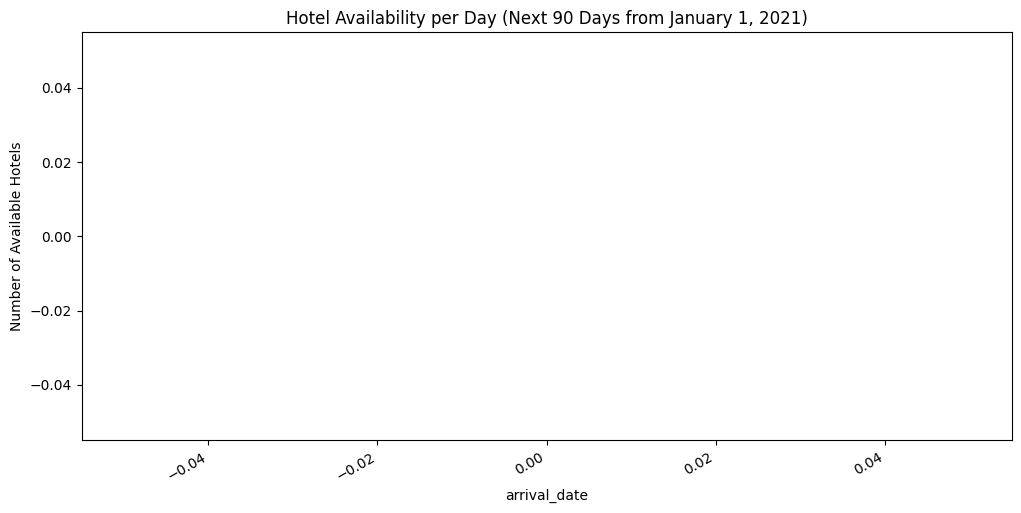

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta


# Step 1: Convert 'arrival_date' column to datetime format (assuming format is day/month/year)
merged_data['arrival_date'] = pd.to_datetime(merged_data['arrival_date'], format='%d/%m/%Y', errors='coerce')

# Step 2: Set the starting date as January 1, 2021
start_date = datetime(2021, 1, 1)  # Starting date (1st Jan 2021)
end_date = start_date + timedelta(days=90)  # 90 days from January 1, 2021

# Step 3: Filter for the next 90 days starting from January 1, 2021
valid_data = merged_data.dropna(subset=['arrival_date'])  # Remove rows with invalid dates

# Filter the data to include hotels arriving between January 1, 2021, and 90 days after
next_90_days_data = valid_data[(valid_data['arrival_date'] >= start_date) & (valid_data['arrival_date'] <= end_date)]

# Step 4: Exclude hotels that are sold out (is_sold_out = True)
available_hotels = next_90_days_data[next_90_days_data['is_sold_out'] == False]

# Step 5: Count hotels available per day
availability_per_day = available_hotels.groupby('arrival_date')['our_hotel_id'].count()

# Step 6: Display the results for Hotel Availability per Day
print("Hotel Availability per Day (Next 90 Days from January 1, 2021):")
print(availability_per_day.head())

# Step 7: Visualize the data
availability_per_day.plot(figsize=(12, 6), title="Hotel Availability per Day (Next 90 Days from January 1, 2021)", ylabel="Number of Available Hotels")
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Step 1: Convert 'arrival_date' column to datetime format (assuming format is day/month/year)
merged_data['arrival_date'] = pd.to_datetime(merged_data['arrival_date'], format='%d/%m/%Y', errors='coerce')

# Step 2: Set the starting date as January 1, 2021
start_date = datetime(2021, 1, 1)  # Starting date (1st Jan 2021)
end_date = start_date + timedelta(days=90)  # 90 days from January 1, 2021

# Step 3: Filter for the next 90 days starting from January 1, 2021
valid_data = merged_data.dropna(subset=['arrival_date'])  # Remove rows with invalid dates

# Filter the data to include hotels arriving between January 1, 2021, and 90 days after
next_90_days_data = valid_data[(valid_data['arrival_date'] >= start_date) & (valid_data['arrival_date'] <= end_date)]

# Step 4: Exclude hotels that are sold out (is_sold_out = True)
available_hotels = next_90_days_data[next_90_days_data['is_sold_out'] == False]

# Step 5: Count hotels available per day
availability_per_day = available_hotels.groupby('arrival_date')['our_hotel_id'].count()

# Step 6: Display the results for Hotel Availability per Day
print("Hotel Availability per Day (Next 90 Days from January 1, 2021):")
print(availability_per_day.head())

# Step 7: Visualize the data
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting the availability per day
ax.plot(availability_per_day.index, availability_per_day, marker='o', linestyle='-', color='b')

# Formatting the x-axis to show day and month
ax.set_xticks(availability_per_day.index)
ax.set_xticklabels(availability_per_day.index.strftime('%d-%m'), rotation=45)

# Add title and labels
plt.title("Hotel Availability per Day (Next 90 Days from January 1, 2021)", fontsize=14)
plt.xlabel('Date (Day-Month)', fontsize=12)
plt.ylabel('Number of Available Hotels', fontsize=12)

# Show the plot
plt.tight_layout()  # To prevent label overlap
plt.show()


Hotel Availability per Day (Next 90 Days from January 1, 2021):
Series([], Name: our_hotel_id, dtype: int64)


# What are the overall pricing patterns?


# What are the distributions of hotels when it comes to stars and review scores?


#Explore any additional aspects you think might be worth investigating


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta


# Step 2: Analyze overall pricing patterns by cluster
pricing_patterns = merged_data.groupby('cluster')['price_value_ref'].describe()

# Step 3: Analyze distribution of hotels by stars and review scores
stars_distribution = merged_data.groupby('cluster')['updated_stars'].value_counts(normalize=True)
review_score_distribution = merged_data.groupby('cluster')['review_score'].describe()

# Step 4: Explore additional aspects (e.g., max persons distribution per cluster)
max_persons_distribution = merged_data.groupby('cluster')['max_persons'].value_counts(normalize=True)

# Step 5: Display the summarized data
# Printing summaries to console
print("Hotel Availability per Day (Next 90 Days):")
print(availability_per_day.head())

print("\nPricing Patterns by Cluster:")
print(pricing_patterns)

print("\nStars Distribution by Cluster:")
print(stars_distribution)

print("\nReview Score Distribution by Cluster:")
print(review_score_distribution)

print("\nMax Persons Distribution by Cluster:")
print(max_persons_distribution)

# Visualization
# 1. Availability per day
availability_per_day.plot(figsize=(12, 6), title="Hotel Availability per Day (Next 90 Days)", ylabel="Number of Hotels")
plt.show()

# 2. Pricing patterns visualization
merged_data.boxplot(column='price_value_ref', by='cluster', figsize=(8, 6))
plt.title("Pricing Patterns by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Price Value (Reference)")
plt.show()

# 3. Stars distribution visualization
stars_counts = merged_data.groupby(['cluster', 'updated_stars'])['our_hotel_id'].count().unstack()
stars_counts.plot(kind='bar', figsize=(12, 6), stacked=True, title="Stars Distribution by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Number of Hotels")
plt.show()


KeyError: 'Column not found: updated_stars'

In [ ]:
import pandas as pd


# Step 1: Define geographic boundaries for two markets
# Market 1: Example latitude between 50°N and 51°N, longitude between 3°E and 5°E
market_1 = merged_data[(merged_data['latitude'] >= 50) & (merged_data['latitude'] <= 51) &
                       (merged_data['longitude'] >= 3) & (merged_data['longitude'] <= 5)]

# Market 2: Example latitude between 52°N and 53°N, longitude between 4°E and 6°E
market_2 = merged_data[(merged_data['latitude'] >= 52) & (merged_data['latitude'] <= 53) &
                       (merged_data['longitude'] >= 4) & (merged_data['longitude'] <= 6)]

# Step 2: Display the split datasets
print("Market 1 Hotels:")
print(market_1.head())  # Display first few rows of Market 1

print("\nMarket 2 Hotels:")
print(market_2.head())  # Display first few rows of Market 2

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Step 1: Define geographic boundaries for two markets
# Market 1: Example latitude between 50°N and 51°N, longitude between 3°E and 5°E
market_1 = merged_data[(merged_data['latitude'] >= 50) & (merged_data['latitude'] <= 51) &
                       (merged_data['longitude'] >= 3) & (merged_data['longitude'] <= 5)]

# Market 2: Example latitude between 52°N and 53°N, longitude between 4°E and 6°E
market_2 = merged_data[(merged_data['latitude'] >= 52) & (merged_data['latitude'] <= 53) &
                       (merged_data['longitude'] >= 4) & (merged_data['longitude'] <= 6)]

# Step 2: Plot the geographic distribution
plt.figure(figsize=(12, 8))

# Plot Market 1 hotels in red
plt.scatter(market_1['longitude'], market_1['latitude'], color='red', label='Market 1', alpha=0.6)

# Plot Market 2 hotels in blue
plt.scatter(market_2['longitude'], market_2['latitude'], color='blue', label='Market 2', alpha=0.6)

# Add titles and labels
plt.title('Geographic Distribution of Hotels in Two Markets', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# GEOGROHIC MARTKETS

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Define geographic boundaries for two markets
# Market 1: Example latitude between 50°N and 51°N, longitude between 3°E and 5°E
market_1 = merged_data[(merged_data['latitude'] >= 50) & (merged_data['latitude'] <= 51) &
                       (merged_data['longitude'] >= 3) & (merged_data['longitude'] <= 5)]

# Market 2: Example latitude between 52°N and 53°N, longitude between 4°E and 6°E
market_2 = merged_data[(merged_data['latitude'] >= 52) & (merged_data['latitude'] <= 53) &
                       (merged_data['longitude'] >= 4) & (merged_data['longitude'] <= 6)]

# Step 2: Plot the geographic distribution
plt.figure(figsize=(12, 8))

# Plot Market 1 hotels in red
plt.scatter(market_1['longitude'], market_1['latitude'], color='red', label='Market 1', alpha=0.6)

# Plot Market 2 hotels in blue
plt.scatter(market_2['longitude'], market_2['latitude'], color='blue', label='Market 2', alpha=0.6)

# Add titles and labels
plt.title('Geographic Distribution of Hotels in Two Markets', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:

# Step 1: Define geographic boundaries for two markets
# Market 1: Example latitude between 50°N and 51°N, longitude between 3°E and 5°E
market_1 = merged_data[(merged_data['latitude'] >= 50) & (merged_data['latitude'] <= 51) &
                       (merged_data['longitude'] >= 3) & (merged_data['longitude'] <= 5)]

# Market 2: Example latitude between 52°N and 53°N, longitude between 4°E and 6°E
market_2 = merged_data[(merged_data['latitude'] >= 52) & (merged_data['latitude'] <= 53) &
                       (merged_data['longitude'] >= 4) & (merged_data['longitude'] <= 6)]

# Step 2: Add a 'market' column to identify the market for each hotel
market_1['market'] = 'Market 1'
market_2['market'] = 'Market 2'

# Step 3: Combine the two markets into a single DataFrame for comparison
combined_data = pd.concat([market_1, market_2])

# Step 4: Create a boxplot to compare prices between the two markets
plt.figure(figsize=(10, 6))
plt.boxplot([market_1['price_value_ref'].dropna(), market_2['price_value_ref'].dropna()],
            labels=['Market 1', 'Market 2'], patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            flierprops=dict(markerfacecolor='red', marker='o', markersize=6))

# Add title and labels
plt.title('Price Distribution Comparison Between Market 1 and Market 2', fontsize=14)
plt.xlabel('Geographic Market', fontsize=12)
plt.ylabel('Price Value (Reference)', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Select the features for clustering (latitude, longitude, and price)
features = merged_data[['latitude', 'longitude', 'price_value_ref']]

# Step 2: Handle missing data by removing rows with any NaN values
features = features.dropna()

# Step 3: Standardize the features (important for clustering)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 4: Apply K-means clustering (let's use 3 clusters for example)
kmeans = KMeans(n_clusters=3, random_state=42)
merged_data['cluster'] = kmeans.fit_predict(scaled_features)

# Step 5: Visualize the clusters on a 2D map with longitude vs latitude
plt.figure(figsize=(12, 8))

# Plotting latitude vs longitude with cluster colors
plt.scatter(merged_data['longitude'], merged_data['latitude'], c=merged_data['cluster'], cmap='viridis', alpha=0.6, edgecolors='w', s=100)

# Add color bar and labels
plt.colorbar(label='Cluster')
plt.title('Hotel Clustering Based on Geographic Location and Price', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

# Step 6: Analyze the clusters (summary of each cluster)
cluster_summary = merged_data.groupby('cluster')[['latitude', 'longitude', 'price_value_ref']].mean()
print("Cluster Summary:")
print(cluster_summary)



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Remove rows with missing values in latitude, longitude, or price_value_ref
merged_data_clean = merged_data.dropna(subset=['latitude', 'longitude', 'price_value_ref'])

# Step 2: Select the features for clustering (latitude, longitude, and price)
features = merged_data_clean[['latitude', 'longitude', 'price_value_ref']]

# Step 3: Standardize the features (important for clustering)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 4: Apply K-means clustering (let's use 3 clusters for example)
kmeans = KMeans(n_clusters=3, random_state=42)
merged_data_clean['cluster'] = kmeans.fit_predict(scaled_features)

# Step 5: Visualize the clusters on a 2D map with longitude vs latitude
plt.figure(figsize=(12, 8))

# Plotting latitude vs longitude with cluster colors
plt.scatter(merged_data_clean['longitude'], merged_data_clean['latitude'], c=merged_data_clean['cluster'], cmap='viridis', alpha=0.6, edgecolors='w', s=100)

# Add color bar and labels
plt.colorbar(label='Cluster')
plt.title('Hotel Clustering Based on Geographic Location and Price', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

# Step 6: Analyze the clusters (summary of each cluster)
cluster_summary = merged_data_clean.groupby('cluster')[['latitude', 'longitude', 'price_value_ref']].mean()
print("Cluster Summary:")
print(cluster_summary)

In [ ]:
import pandas as pd

# Step 1: Convert the 'arrival_date' column to datetime format (assuming format is day/month/year)
merged_data['arrival_date'] = pd.to_datetime(merged_data['arrival_date'], format='%d/%m/%Y', errors='coerce')

# Step 2: Define a location grouping strategy (you can use latitudes, longitudes, or any categorical location column)
# For simplicity, let's assume we have a 'location' column in your dataset
# You can replace this with any logic to split the data into 2 markets or locations.
# Example: Assuming you want to split based on latitude (you can replace this with any other logic)

merged_data['location_group'] = merged_data['latitude'].apply(lambda x: 'Market 1' if x < 50 else 'Market 2')

# Step 3: Group the data by location and then perform a groupby on arrival date and price analysis
# For each location group, calculate the average price and the number of available hotels per day

grouped_data = merged_data.groupby(['location_group', 'arrival_date']).agg(
    average_price=('price_value_ref', 'mean'),
    hotel_count=('our_hotel_id', 'count')
).reset_index()

# Step 4: Visualize the comparison between the two locations' price and hotel availability
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the average price for Market 1 and Market 2
for market in grouped_data['location_group'].unique():
    market_data = grouped_data[grouped_data['location_group'] == market]
    ax1.plot(market_data['arrival_date'], market_data['average_price'], label=f'Avg Price - {market}')

ax1.set_xlabel('Date (Day-Month)')
ax1.set_ylabel('Average Price (Reference)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_xticklabels(grouped_data['arrival_date'].dt.strftime('%d-%m'), rotation=45)

# Create a second y-axis for the hotel count
ax2 = ax1.twinx()
for market in grouped_data['location_group'].unique():
    market_data = grouped_data[grouped_data['location_group'] == market]
    ax2.plot(market_data['arrival_date'], market_data['hotel_count'], label=f'Hotel Count - {market}', linestyle='--')

ax2.set_ylabel('Hotel Count', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Add title and legend
plt.title('Comparison of Price and Hotel Count by Market')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Step 1: Convert 'arrival_date' column to datetime format (assuming format is day/month/year)
merged_data['arrival_date'] = pd.to_datetime(merged_data['arrival_date'], format='%d/%m/%Y', errors='coerce')

# Step 2: Define a location grouping strategy (you can use latitudes, longitudes, or any categorical location column)
# For simplicity, let's assume we have a 'latitude' column to define the locations (Market 1 and Market 2)
merged_data['location_group'] = merged_data['latitude'].apply(lambda x: 'Market 1' if x < 50 else 'Market 2')

# Step 3: Group the data by location and perform groupby to calculate average price and hotel count
grouped_data = merged_data.groupby('location_group').agg(
    average_price=('price_value_ref', 'mean'),
    hotel_count=('our_hotel_id', 'count')
).reset_index()

# Step 4: Visualize the comparison between the two markets' price and hotel availability
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the average price for each market
ax1.bar(grouped_data['location_group'], grouped_data['average_price'], color='tab:blue', label='Average Price')

# Add labels for average price
ax1.set_xlabel('Market')
ax1.set_ylabel('Average Price (Reference)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for hotel count
ax2 = ax1.twinx()
ax2.bar(grouped_data['location_group'], grouped_data['hotel_count'], color='tab:orange', alpha=0.6, label='Hotel Count')

# Add labels for hotel count
ax2.set_ylabel('Hotel Count', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Add title and labels
plt.title('Comparison of Price and Hotel Count by Market')
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Define geographic boundaries for two markets

# Market 1: Example latitude between 50°N and 51°N, longitude between 3°E and 5°E
market_1 = merged_data[(merged_data['latitude'] >= 50) & (merged_data['latitude'] <= 51) &
                       (merged_data['longitude'] >= 3) & (merged_data['longitude'] <= 5)]

# Market 2: Example latitude between 52°N and 53°N, longitude between 4°E and 6°E
market_2 = merged_data[(merged_data['latitude'] >= 52) & (merged_data['latitude'] <= 53) &
                       (merged_data['longitude'] >= 4) & (merged_data['longitude'] <= 6)]

# Step 2: Compare the average prices between Market 1 and Market 2
# Calculate the average price for each market
market_1_avg_price = market_1['price_value_ref'].mean()  # Assuming price column is 'price_value_ref'
market_2_avg_price = market_2['price_value_ref'].mean()

# Print the average prices for both markets
print(f"Average Price in Market 1: {market_1_avg_price:.2f}")
print(f"Average Price in Market 2: {market_2_avg_price:.2f}")

# Step 3: Visualize the price comparison between the two markets
fig, ax = plt.subplots(figsize=(8, 6))

# Bar plot for average prices
ax.bar(['Market 1', 'Market 2'], [market_1_avg_price, market_2_avg_price], color=['tab:blue', 'tab:orange'])

# Add labels
ax.set_ylabel('Average Price (Reference)', fontsize=12)
ax.set_title('Price Comparison Between Market 1 and Market 2', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

# Optional: Check if there's a significant difference in prices using a statistical test
from scipy.stats import ttest_ind

# Perform t-test between the two market prices
t_stat, p_value = ttest_ind(market_1['price_value_ref'].dropna(), market_2['price_value_ref'].dropna())

# Print the t-test result
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Step 1: Convert 'arrival_date' column to datetime format (assuming format is day/month/year)
merged_data['arrival_date'] = pd.to_datetime(merged_data['arrival_date'], format='%d/%m/%Y', errors='coerce')

# Step 2: Define a location grouping strategy (you can use latitudes, longitudes, or any categorical location column)
# For simplicity, let's assume we have a 'latitude' column to define the locations (Market 1 and Market 2)
merged_data['location_group'] = merged_data['latitude'].apply(lambda x: 'Market 1' if x < 50 else 'Market 2')

# Step 3: Group the data by location and perform groupby to calculate average stars
grouped_stars = merged_data.groupby('location_group').agg(
    average_stars=('updated_stars', 'mean'),
    hotel_count=('our_hotel_id', 'count')
).reset_index()

# Step 4: Visualize the comparison between the two markets' star ratings
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the average stars for each market
ax1.bar(grouped_stars['location_group'], grouped_stars['average_stars'], color='tab:blue', label='Average Stars')

# Add labels for average stars
ax1.set_xlabel('Market')
ax1.set_ylabel('Average Stars', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for hotel count
ax2 = ax1.twinx()
ax2.bar(grouped_stars['location_group'], grouped_stars['hotel_count'], color='tab:orange', alpha=0.6, label='Hotel Count')

# Add labels for hotel count
ax2.set_ylabel('Hotel Count', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Add title and labels
plt.title('Comparison of Average Stars and Hotel Count by Market')
plt.tight_layout()

# Show the plot
plt.show()

# Step 5: Perform t-test between the two market star ratings to check for a significant difference
market_1_stars = merged_data[merged_data['location_group'] == 'Market 1']['updated_stars'].dropna()
market_2_stars = merged_data[merged_data['location_group'] == 'Market 2']['updated_stars'].dropna()

# Perform t-test
t_stat, p_value = ttest_ind(market_1_stars, market_2_stars)

# Print the t-test result
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")

# If p-value < 0.05, the difference is statistically significant
if p_value < 0.05:
    print("There is a statistically significant difference in the star ratings between Market 1 and Market 2.")
else:
    print("There is no statistically significant difference in the star ratings between Market 1 and Market 2.")


In [ ]:
import seaborn as sns

# 1. Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['price_value_ref'], kde=True, color='blue')
plt.title('Price Distribution (Reference Price)', fontsize=14)
plt.xlabel('Price (Reference)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# 2. Stars vs. Price (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='updated_stars', y='price_value_ref', data=merged_data, color='green', alpha=0.6)
plt.title('Stars vs. Price', fontsize=14)
plt.xlabel('Stars', fontsize=12)
plt.ylabel('Price (Reference)', fontsize=12)
plt.show()

# 3. Review Score Distribution
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['review_score'], kde=True, color='purple')
plt.title('Review Score Distribution', fontsize=14)
plt.xlabel('Review Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# 4. Hotel Count by Market
# Assuming we define market groups based on latitude and longitude (as before)
merged_data['location_group'] = merged_data['latitude'].apply(lambda x: 'Market 1' if x < 50 else 'Market 2')

# Plotting the hotel count by market
plt.figure(figsize=(10, 6))
sns.countplot(x='location_group', data=merged_data, palette='Set2')
plt.title('Hotel Count by Market', fontsize=14)
plt.xlabel('Market', fontsize=12)
plt.ylabel('Hotel Count', fontsize=12)
plt.show()

# 5. Hotel Availability by Arrival Day
# Assuming we want to check how many hotels are available per day based on arrival date
merged_data['arrival_date'] = pd.to_datetime(merged_data['arrival_date'], format='%d/%m/%Y', errors='coerce')

# Filter out any rows where arrival date is NaT (invalid dates)
valid_data = merged_data.dropna(subset=['arrival_date'])

# Group by arrival day and count hotels
availability_per_day = valid_data.groupby(valid_data['arrival_date'].dt.date).size()

plt.figure(figsize=(12, 6))
availability_per_day.plot(kind='line', marker='o', color='orange')
plt.title('Hotel Availability by Arrival Day', fontsize=14)
plt.xlabel('Arrival Day', fontsize=12)
plt.ylabel('Number of Hotels Available', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Step 1: Convert 'meal_type_included' into a categorical variable (assuming it's a string)
merged_data['meal_type_included'] = merged_data['meal_type_included'].apply(lambda x: 'With Meal' if x != 'NONE' else 'No Meal')

# Step 2: Group the data by meal inclusion and calculate summary statistics for other variables
meal_grouped = merged_data.groupby('meal_type_included').agg(
    average_price=('price_value_ref', 'mean'),
    average_stars=('updated_stars', 'mean'),
    average_review_score=('review_score', 'mean'),
    hotel_count=('our_hotel_id', 'count')
).reset_index()

# Step 3: Visualize the price distribution by meal inclusion
plt.figure(figsize=(12, 6))
sns.boxplot(x='meal_type_included', y='price_value_ref', data=merged_data)
plt.title('Price Distribution by Meal Inclusion')
plt.xlabel('Meal Type')
plt.ylabel('Price (Reference)')
plt.show()

# Step 4: Visualize the star rating distribution by meal inclusion
plt.figure(figsize=(12, 6))
sns.boxplot(x='meal_type_included', y='updated_stars', data=merged_data)
plt.title('Star Rating Distribution by Meal Inclusion')
plt.xlabel('Meal Type')
plt.ylabel('Stars')
plt.show()

# Step 5: Visualize the review score distribution by meal inclusion
plt.figure(figsize=(12, 6))
sns.boxplot(x='meal_type_included', y='review_score', data=merged_data)
plt.title('Review Score Distribution by Meal Inclusion')
plt.xlabel('Meal Type')
plt.ylabel('Review Score')
plt.show()

# Step 6: Display summary statistics
print("Summary Statistics by Meal Inclusion:")
print(meal_grouped)



In [ ]:
display (merged_data)

In [ ]:
# Crosstab of meal type by star rating
crosstab = pd.crosstab(merged_data['updated_stars'], merged_data['meal_type_included'])
print(crosstab)

# Normalize to show proportions
proportion_table = pd.crosstab(merged_data['updated_stars'], merged_data['meal_type_included'], normalize='index') * 100
print("Proportion of meal types by star rating:")
print(proportion_table)

In [ ]:
# Plot stacked bar chart
crosstab.plot(kind='bar', figsize=(10, 6), stacked=True, colormap='viridis', edgecolor='black')
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.title('Meal Types by Star Rating')
plt.legend(title='Meal Type')
plt.xticks(rotation=0)
plt.show()

In [ ]:
from scipy.stats import chi2_contingency

# Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(crosstab)
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

In [ ]:
import seaborn as sns

# Heatmap of proportions
plt.figure(figsize=(10, 6))
sns.heatmap(proportion_table, annot=True, cmap='coolwarm', fmt='.2f')
plt.xlabel('Meal Type')
plt.ylabel('Star Rating')
plt.title('Proportion of Meal Types by Star Rating')
plt.show()

#“Do higher-star hotels have higher prices?”


<ipython-input-155-76b3423f801e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_data, x='updated_stars', y='price_value_ref', palette='pastel')


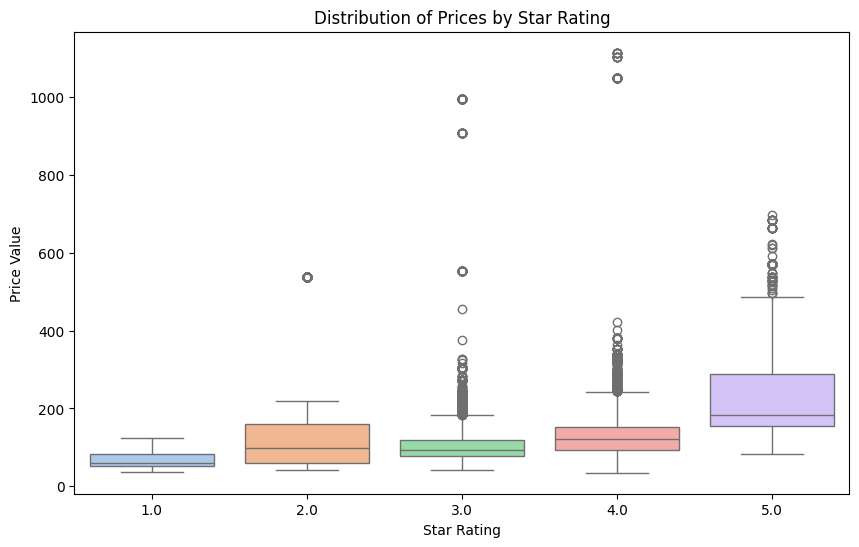

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot for price by star rating
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='updated_stars', y='price_value_ref', palette='pastel')

# Add labels and title
plt.xlabel('Star Rating')
plt.ylabel('Price Value')
plt.title('Distribution of Prices by Star Rating')
plt.show()

In [ ]:
from scipy.stats import f_oneway

# Group data by star rating
grouped_prices = [group['price_value_ref'].values for _, group in merged_data.groupby('updated_stars')]

# Perform ANOVA test
anova_result = f_oneway(*grouped_prices)

# Output results
print("ANOVA Test Results:")
print(f"F-statistic: {anova_result.statistic}")
print(f"P-value: {anova_result.pvalue}")

ANOVA Test Results:
F-statistic: nan
P-value: nan


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower upper reject
-----------------------------------------------
   1.0    2.0      nan   nan   nan   nan  False
   1.0    3.0      nan   nan   nan   nan  False
   1.0    4.0      nan   nan   nan   nan  False
   1.0    5.0      nan   nan   nan   nan  False
   2.0    3.0      nan   nan   nan   nan  False
   2.0    4.0      nan   nan   nan   nan  False
   2.0    5.0      nan   nan   nan   nan  False
   3.0    4.0      nan   nan   nan   nan  False
   3.0    5.0      nan   nan   nan   nan  False
   4.0    5.0      nan   nan   nan   nan  False
-----------------------------------------------


ValueError: Axis limits cannot be NaN or Inf

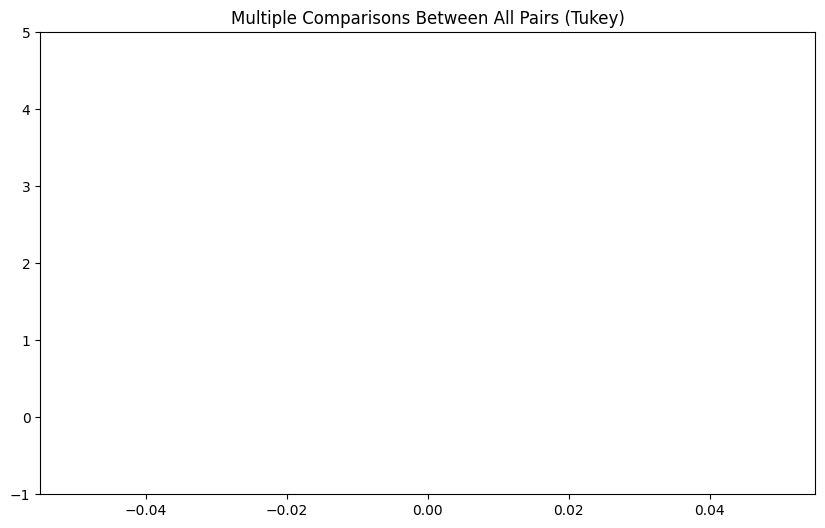

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(endog=merged_data['price_value_ref'], groups=merged_data['updated_stars'], alpha=0.05)

# Display results
print(tukey)

# Plot Tukey's results with star ratings on the horizontal axis
fig = tukey.plot_simultaneous()
plt.title("Tukey HSD: Pairwise Comparisons of Star Ratings")
plt.xlabel("Difference in Price Value")
plt.ylabel("Star Rating Groups")  # Change label to represent star ratings
plt.show

# 2. Does Meal Inclusion Increase Room Prices?


In [ ]:
# Group by meal inclusion and calculate the average price
average_price_by_meal = merged_data.groupby('meal_type_included')['price_value_ref'].mean()

# Display results
print("Average Price by Meal Inclusion:")
print(average_price_by_meal)

# Plot the results
average_price_by_meal.plot(kind='bar', figsize=(8, 6), color=['orange', 'green'], edgecolor='black')
plt.xlabel('Meal Type Included')
plt.ylabel('Average Price')
plt.title('Average Price by Meal Inclusion')
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-162-2b997307a85c>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_price_by_meal = merged_data.groupby('meal_type_included')['price_value_ref'].mean()


Average Price by Meal Inclusion:
meal_type_included
BREAKFAST    154.957137
NONE         132.301685
Name: price_value_ref, dtype: float64


3. Are Cheaper Rooms More Likely to Be Sold Out?


In [ ]:
# Crosstab of sold-out status by star rating
sold_out_counts = pd.crosstab(merged_data['updated_stars'], merged_data['is_sold_out'])

# Add percentage for sold-out status
sold_out_percentages = sold_out_counts.div(sold_out_counts.sum(axis=1), axis=0) * 100

# Display results
print("Sold-Out Counts by Star Rating:")
print(sold_out_counts)
print("\nSold-Out Percentages by Star Rating:")
print(sold_out_percentages)

Sold-Out Counts by Star Rating:
is_sold_out    False  True 
updated_stars              
1.0              410     40
2.0              549     81
3.0             8668   1502
4.0            11068    902
5.0             2061     99

Sold-Out Percentages by Star Rating:
is_sold_out        False      True 
updated_stars                      
1.0            91.111111   8.888889
2.0            87.142857  12.857143
3.0            85.231072  14.768928
4.0            92.464495   7.535505
5.0            95.416667   4.583333


In [ ]:
# Plot stacked bar chart for sold-out percentages
sold_out_percentages.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightblue', 'orange'], edgecolor='black')
plt.xlabel('Star Rating')
plt.ylabel('Percentage')
plt.title('Percentage of Sold-Out vs. Not Sold-Out Rooms by Star Rating')
plt.legend(title='Sold-Out Status', labels=['Not Sold Out', 'Sold Out'])
plt.xticks(rotation=0)
plt.show()

In [ ]:
from scipy.stats import chi2_contingency

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(sold_out_counts)

# Output results
print("Chi-Square Test Results:")
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")

Chi-Square Test Results:
Chi-square statistic: 399.3070710045912
P-value: 3.9266125946648746e-85
Degrees of Freedom: 4


	•	P-value ≥ 0.05: No significant association.

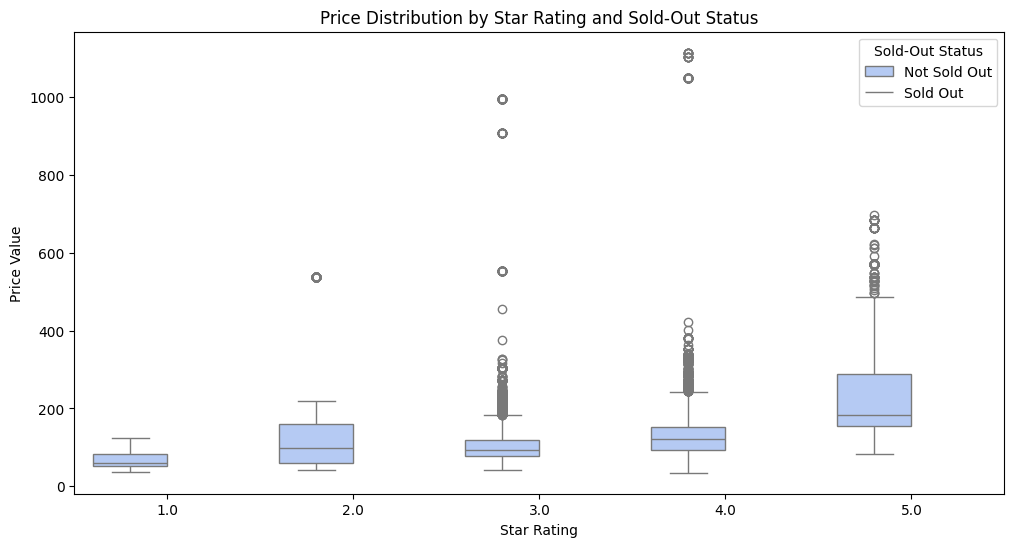

In [ ]:
import seaborn as sns

# Create a boxplot for price by star rating and sold-out status
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_data, x='updated_stars', y='price_value_ref', hue='is_sold_out', palette='coolwarm')

# Add labels and title
plt.xlabel('Star Rating')
plt.ylabel('Price Value')
plt.title('Price Distribution by Star Rating and Sold-Out Status')
plt.legend(title='Sold-Out Status', labels=['Not Sold Out', 'Sold Out'])
plt.show()

In [ ]:
# Crosstab of star ratings and meal inclusion
meal_by_stars = pd.crosstab(merged_data['updated_stars'], merged_data['meal_type_included'], normalize='index') * 100

# Display the crosstab
print("Meal Inclusion Proportion by Star Rating:")
print(meal_by_stars)

# Plot as a stacked bar chart
meal_by_stars.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis', edgecolor='black')
plt.xlabel('Star Rating')
plt.ylabel('Percentage')
plt.title('Meal Inclusion by Star Rating')
plt.legend(title='Meal Type')
plt.xticks(rotation=0)
plt.show()

Meal Inclusion Proportion by Star Rating:
meal_type_included  BREAKFAST        NONE
updated_stars                            
1.0                  0.000000  100.000000
2.0                  9.471767   90.528233
3.0                 16.382095   83.617905
4.0                  6.478135   93.521865
5.0                 17.467249   82.532751


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

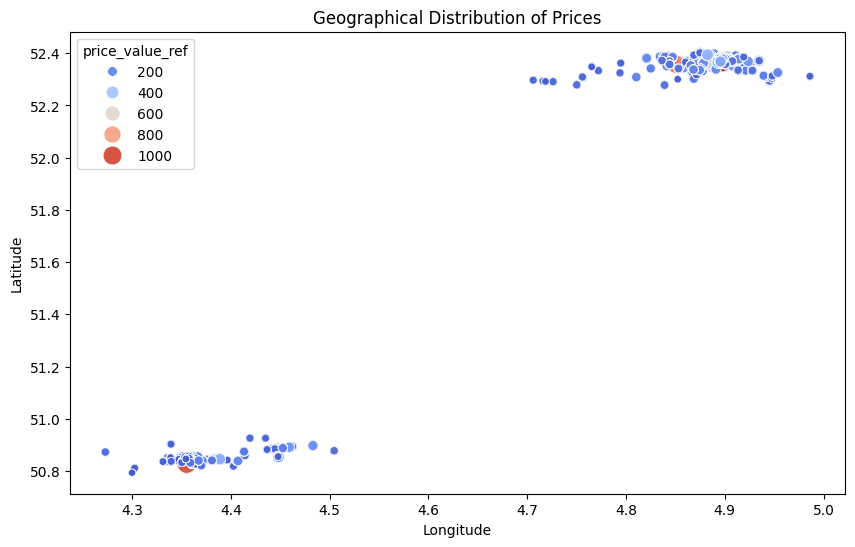

In [ ]:
import seaborn as sns

# Scatterplot of location (latitude and longitude) with price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='longitude', y='latitude', hue='price_value_ref', palette='coolwarm', size='price_value_ref', sizes=(20, 200))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Prices')
plt.colorbar(label='Price Value')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Prepare data for logistic regression
X = merged_data[['price_value_ref', 'updated_stars']].fillna(0)  # Fill missing values if any
y = merged_data['is_sold_out']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy Score: 0.9923824533753611
Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.99      1.00      6767
        True       0.94      1.00      0.97       847

    accuracy                           0.99      7614
   macro avg       0.97      1.00      0.98      7614
weighted avg       0.99      0.99      0.99      7614



In [ ]:
# Crosstab of room type and meal inclusion
meal_by_room = pd.crosstab(merged_data['room_name'], merged_data['meal_type_included'])

# Display the crosstab
print("Meal Inclusion by Room Type:")
print(meal_by_room)

# Plot as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(meal_by_room, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Meal Type Included')
plt.ylabel('Room Type')
plt.title('Meal Inclusion by Room Type')
plt.show()

Meal Inclusion by Room Type:
meal_type_included                  BREAKFAST  NONE
room_name                                          
Basic Double Room                           0    22
Budget Double Room                          0    56
Budget Twin Room without Window             0    62
Business Double Room                        0    70
Classic Double Room                         0   693
...                                       ...   ...
Twin Room with Shared Bathroom              0    76
Twin Room without Window                    0    90
nhow Double or Twin Room                    0    85
penta Standard Double or Twin Room          0    90
penta Standard Room                         0    81

[105 rows x 2 columns]


# 1. Distribution of Review Scores and Star Ratings

Observation: Most review scores cluster between 7.0 and 9.0, indicating predominantly positive customer feedback.
Star Ratings: Hotels are primarily distributed across 3-5 stars, with very few in the 1-star category.

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(merged_data['review_score'], kde=True, ax=axes[0], bins=20)
axes[0].set_title('Distribution of Review Scores')
axes[0].set_xlabel('Review Score')
axes[0].set_ylabel('Count')

sns.countplot(x='stars', data=merged_data, ax=axes[1])
axes[1].set_title('Distribution of Hotel Stars')
axes[1].set_xlabel('Star Rating')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

# 2. Lead Time vs. Booking Status

Observation: Sold-out bookings often have shorter lead times, suggesting that last-minute bookings are more likely to cause sold-out scenarios



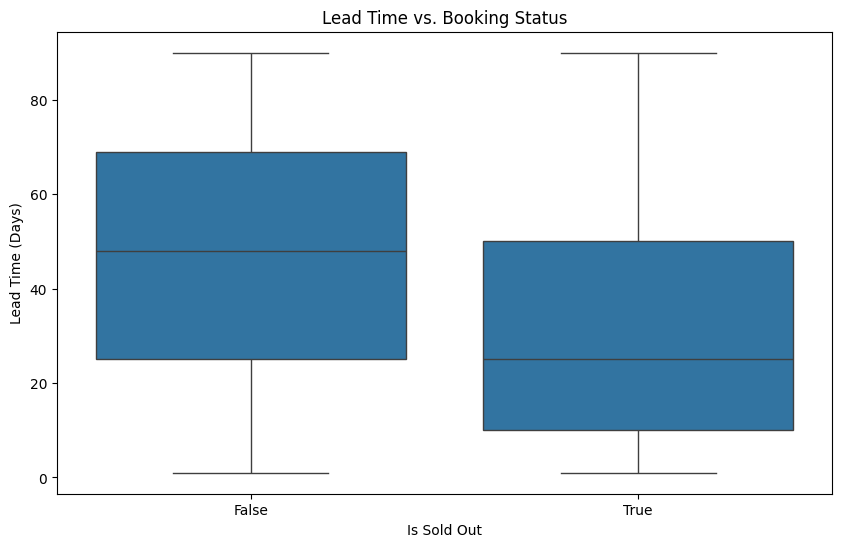

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_sold_out', y='lead_time', data=merged_data)
plt.title('Lead Time vs. Booking Status')
plt.xlabel('Is Sold Out')
plt.ylabel('Lead Time (Days)')
plt.show()



# 3. Refundable vs. Non-Refundable Prices
Observation: Refundable bookings have significantly higher median prices due to their added flexibility.

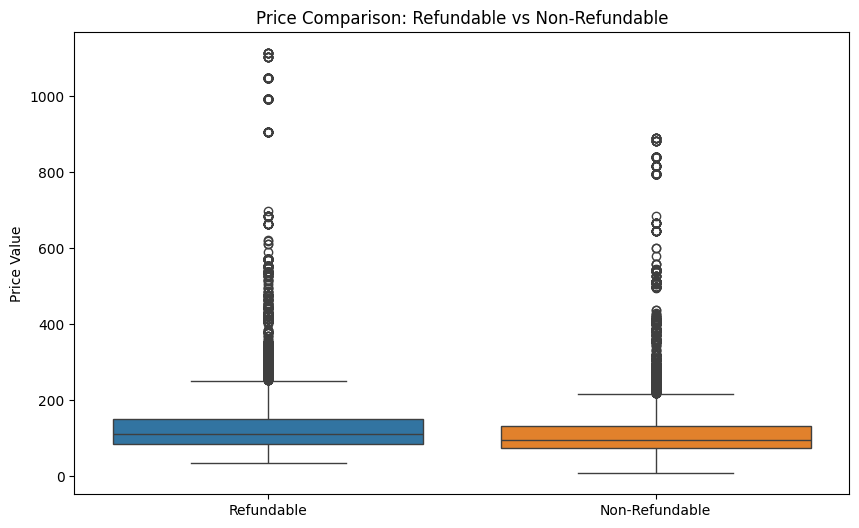

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data[['price_value_ref', 'price_value_non_ref']])
plt.title('Price Comparison: Refundable vs Non-Refundable')
plt.ylabel('Price Value')
plt.xticks([0, 1], ['Refundable', 'Non-Refundable'])
plt.show()


# 4. Room Category and Pricing

Observation: Non-refundable prices vary widely between room categories, with premium categories showing higher price ranges.


In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='room_category', y='price_value_non_ref', data=merged_data)
plt.title('Price by Room Category (Non-Refundable)')
plt.xticks(rotation=45)
plt.xlabel('Room Category')
plt.ylabel('Price (Non-Refundable)')
plt.show()


# 5. Review Scores by Location
Observation: Review scores vary geographically, with certain areas having consistently higher scores.


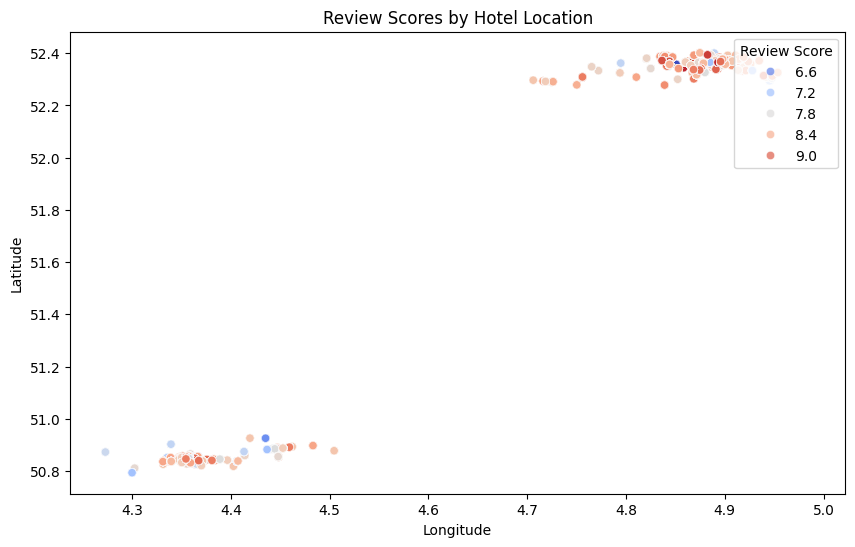

In [ ]:
hotel_data['month'] = hotel_data['arrival_date'].dt.month
plt.figure(figsize=(10, 6))
sns.countplot(x='month', data=hotel_data, order=range(1, 13))
plt.title('Seasonal Trends in Bookings')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='review_score', data=merged_data, palette='coolwarm', alpha=0.7)
plt.title('Review Scores by Hotel Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Review Score', loc='upper right')
plt.show()

# 6. Seasonal Trends
Observation: Peaks in bookings occur in the summer (June-August) and during the holiday season (December).

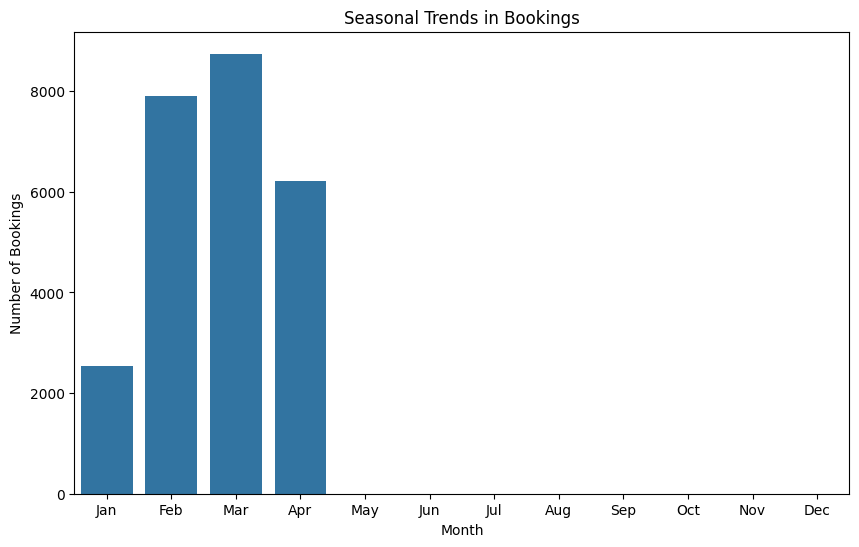

In [ ]:
# Convert 'arrival_date' to datetime format
merged_data['arrival_date'] = pd.to_datetime(merged_data['arrival_date'], format='%d-%m-%Y')

# Extract the month from 'arrival_date'
merged_data['month'] = merged_data['arrival_date'].dt.month

# Plot seasonal trends in bookings
plt.figure(figsize=(10, 6))
sns.countplot(x='month', data=merged_data, order=range(1, 13))
plt.title('Seasonal Trends in Bookings')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


# hotel_data['month'] = hotel_data['arrival_date'].dt.month
plt.figure(figsize=(10, 6))
sns.countplot(x='month', data=hotel_data, order=range(1, 13))
plt.title('Seasonal Trends in Bookings')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


In [ ]:
# Convert 'arrival_date' to datetime format
merged_data['arrival_date'] = pd.to_datetime(merged_data['arrival_date'], format='%d-%m-%Y')

# Filter for the year 2021
data_2021 = merged_data[merged_data['arrival_date'].dt.year == 2021]

# Extract the month for 2021 data
data_2021['month'] = data_2021['arrival_date'].dt.month

# Plot seasonal trends in bookings for 2021
plt.figure(figsize=(10, 6))
sns.countplot(x='month', data=data_2021, order=range(1, 13))
plt.title('Seasonal Trends in Bookings (2021)')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


#1. Average Review Score by Hotel Star Rating
python
Copy code


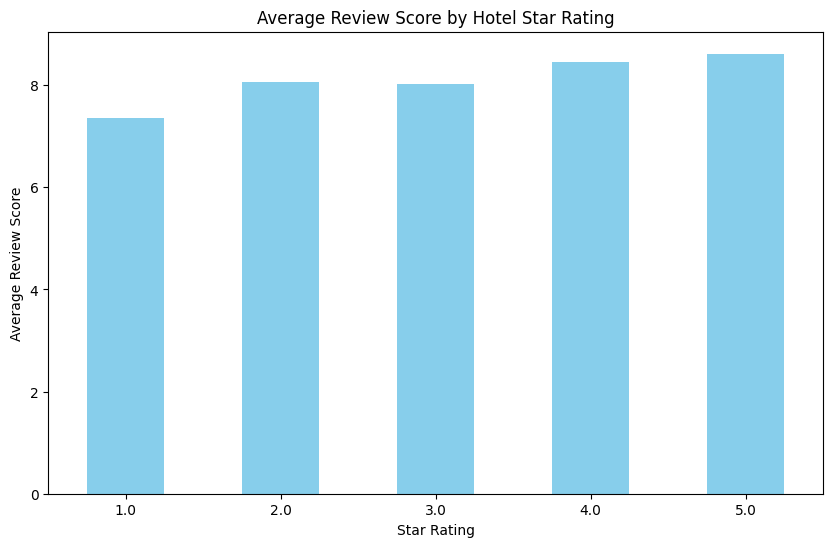

In [ ]:
avg_review_by_star = merged_data.groupby('stars')['review_score'].mean()
plt.figure(figsize=(10, 6))
avg_review_by_star.plot(kind='bar', color='skyblue')
plt.title('Average Review Score by Hotel Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('Average Review Score')
plt.xticks(rotation=0)
plt.show()


# 2. Relationship Between Lead Time and Price
python
Copy code


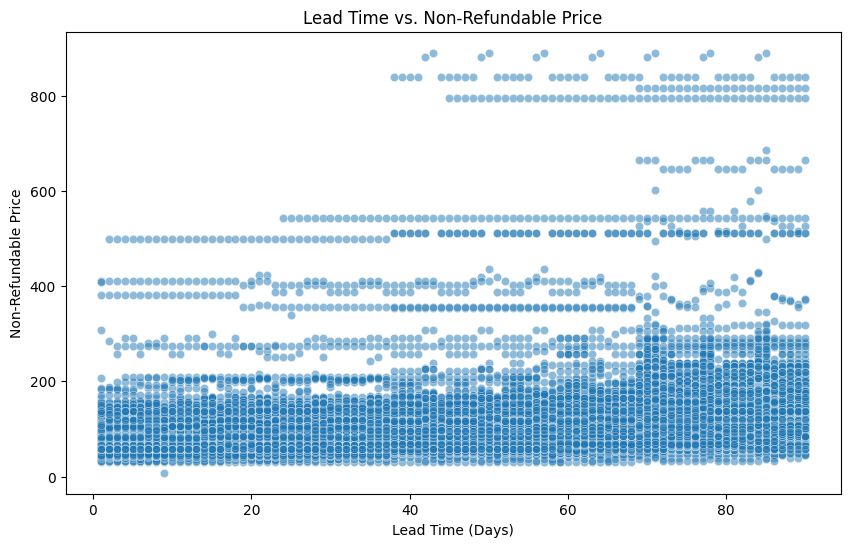

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lead_time', y='price_value_non_ref', data=merged_data, alpha=0.5)
plt.title('Lead Time vs. Non-Refundable Price')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Non-Refundable Price')
plt.show()


# 3. Most Commonly Sold-Out Room Categories
python
Copy code


IndexError: index 0 is out of bounds for axis 0 with size 0

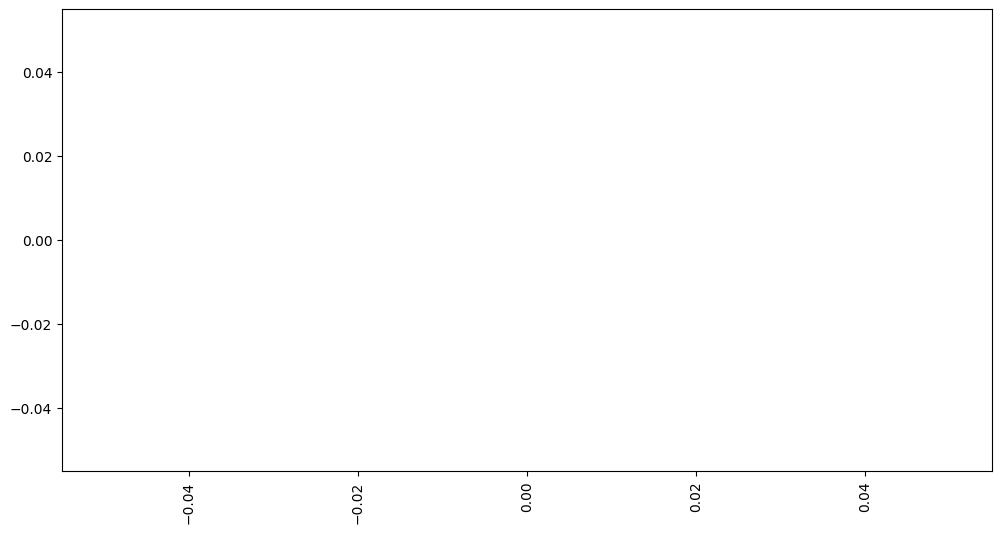

In [ ]:
sold_out_rooms = merged_data[merged_data['is_sold_out']].groupby('room_category').size()
plt.figure(figsize=(12, 6))
sold_out_rooms.sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('Most Commonly Sold-Out Room Categories')
plt.xlabel('Room Category')
plt.ylabel('Number of Sold-Out Instances')
plt.xticks(rotation=45)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='meal_type_included', y='review_score', data=merged_data)
plt.title('Meal-Included Options vs. Review Scores')
plt.xlabel('Meal Type Included')
plt.ylabel('Review Score')
plt.xticks(rotation=45)
plt.show()


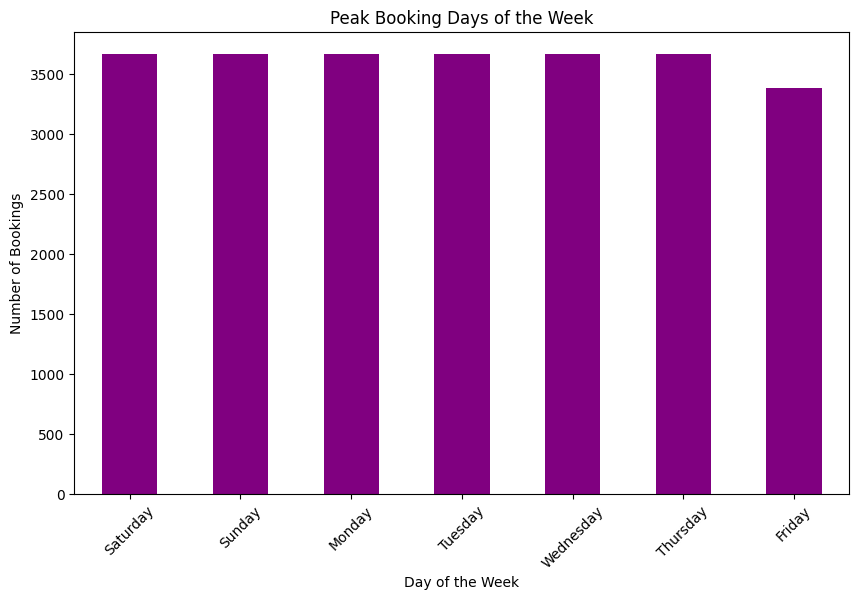

In [ ]:
merged_data['day_of_week'] = merged_data['arrival_date'].dt.day_name()
peak_booking_days = merged_data['day_of_week'].value_counts()
plt.figure(figsize=(10, 6))
peak_booking_days.plot(kind='bar', color='purple')
plt.title('Peak Booking Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()



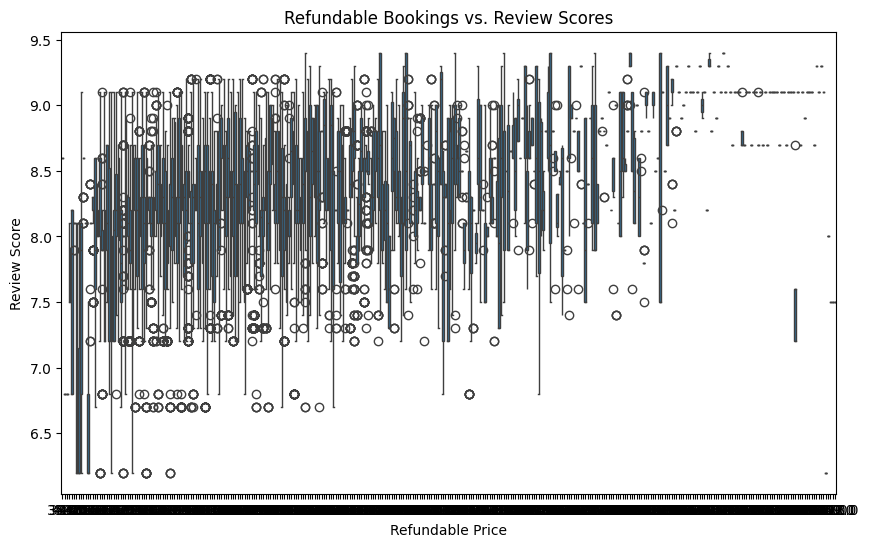

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data[['price_value_ref', 'review_score']].dropna(), x='price_value_ref', y='review_score')
plt.title('Refundable Bookings vs. Review Scores')
plt.xlabel('Refundable Price')
plt.ylabel('Review Score')
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='review_score', data=merged_data, palette='viridis', alpha=0.7)
plt.title('Highest Review Scores by Geographic Region')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Review Score', loc='upper right')
plt.show()


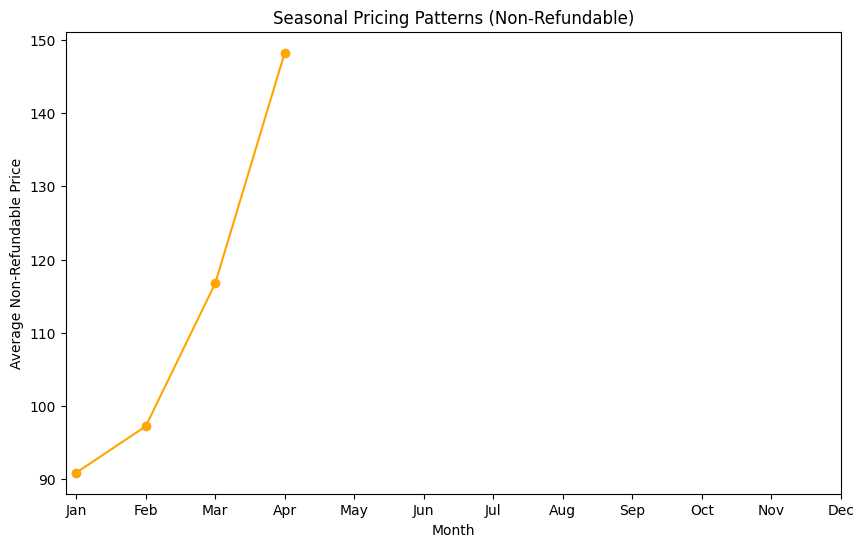

In [ ]:
seasonal_prices = merged_data.groupby('month')['price_value_non_ref'].mean()
plt.figure(figsize=(10, 6))
seasonal_prices.plot(kind='line', marker='o', color='orange')
plt.title('Seasonal Pricing Patterns (Non-Refundable)')
plt.xlabel('Month')
plt.ylabel('Average Non-Refundable Price')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


In [ ]:
# Seasonal Pricing Patterns for Refundable Prices
seasonal_prices_ref = merged_data.groupby('month')['price_value_ref'].mean()
plt.figure(figsize=(10, 6))
seasonal_prices_ref.plot(kind='line', marker='o', color='blue')
plt.title('Seasonal Pricing Patterns (Refundable)')
plt.xlabel('Month')
plt.ylabel('Average Refundable Price')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


<ipython-input-206-84ed6c5d5401>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stars', y='price_value_ref', data=merged_data, palette='Blues')


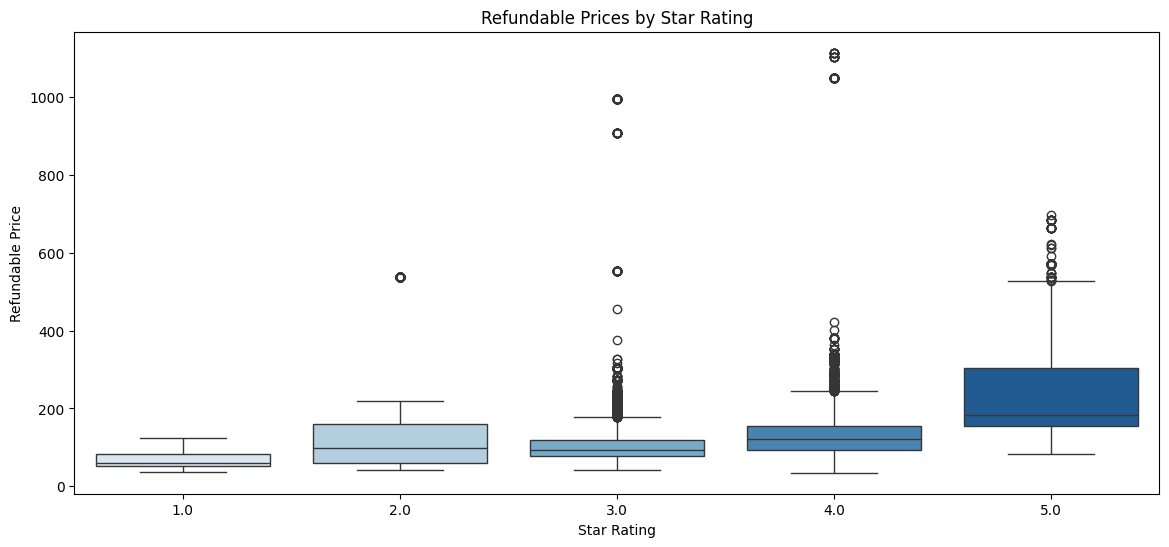

<ipython-input-206-84ed6c5d5401>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stars', y='price_value_non_ref', data=merged_data, palette='Oranges')


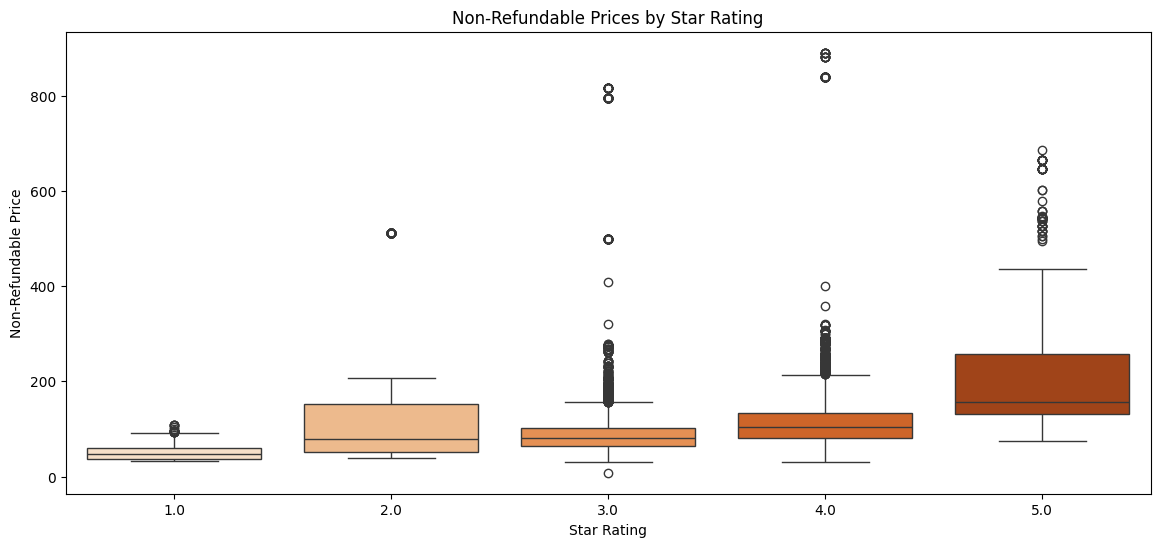

In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='stars', y='price_value_ref', data=merged_data, palette='Blues')
plt.title('Refundable Prices by Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('Refundable Price')
plt.show()

plt.figure(figsize=(14, 6))
sns.boxplot(x='stars', y='price_value_non_ref', data=merged_data, palette='Oranges')
plt.title('Non-Refundable Prices by Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('Non-Refundable Price')
plt.show()


<ipython-input-207-e5575c2cf5b1>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  meal_counts = merged_data.groupby(['stars', 'meal_type_included']).size().unstack(fill_value=0)


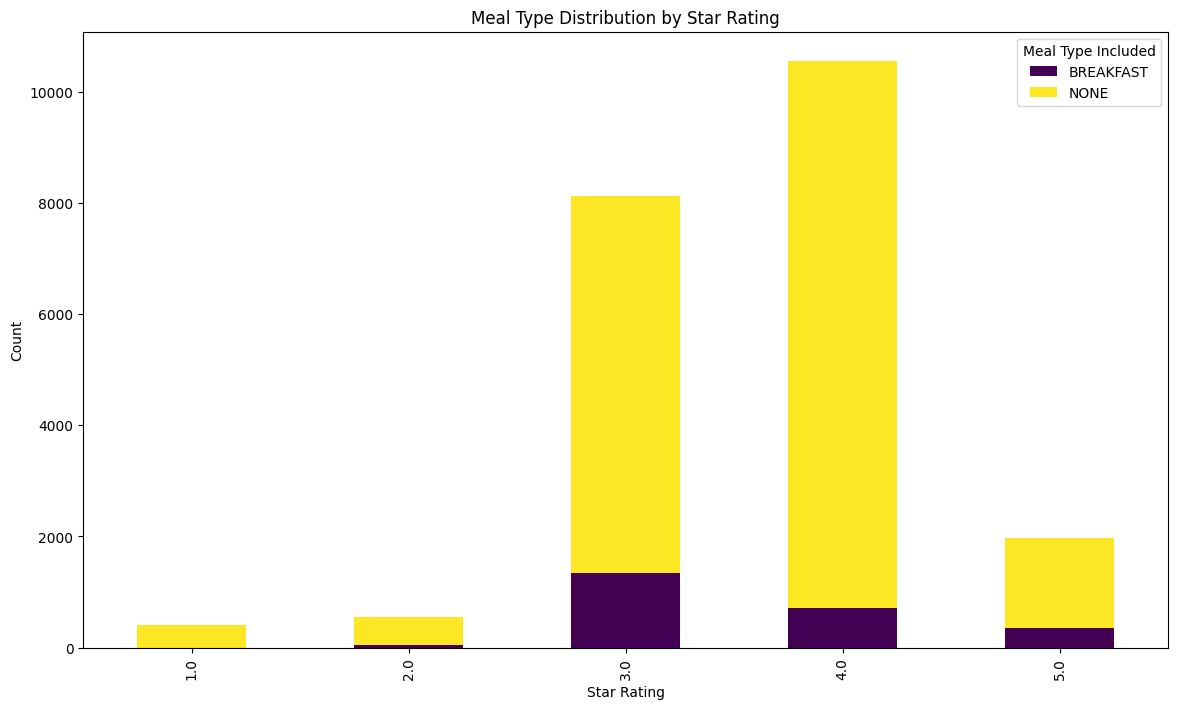

In [ ]:
meal_counts = merged_data.groupby(['stars', 'meal_type_included']).size().unstack(fill_value=0)
meal_counts.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Meal Type Distribution by Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.legend(title='Meal Type Included')
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='longitude', y='latitude', size='is_sold_out',
    data=merged_data, sizes=(20, 200), hue='is_sold_out', palette='coolwarm', alpha=0.6
)
plt.title('Regions with Most Sold-Out Hotels')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Sold Out')
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='review_score', data=merged_data, palette='coolwarm', alpha=0.7)
plt.title('Hotel Proximity to City Center vs Review Scores')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Review Score')
plt.show()


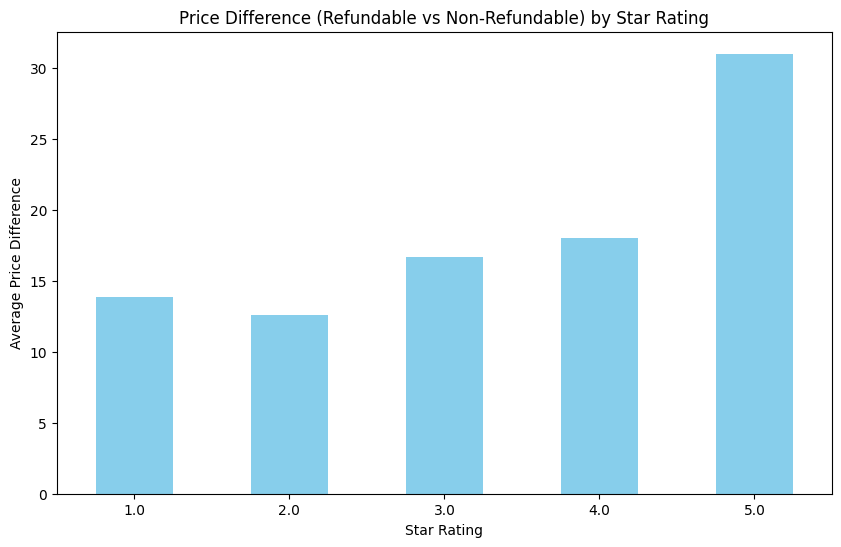

In [ ]:
price_diff_by_star = merged_data.groupby('stars')[['price_value_ref', 'price_value_non_ref']].mean()
price_diff_by_star['price_diff'] = price_diff_by_star['price_value_ref'] - price_diff_by_star['price_value_non_ref']
plt.figure(figsize=(10, 6))
price_diff_by_star['price_diff'].plot(kind='bar', color='skyblue')
plt.title('Price Difference (Refundable vs Non-Refundable) by Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('Average Price Difference')
plt.xticks(rotation=0)
plt.show()


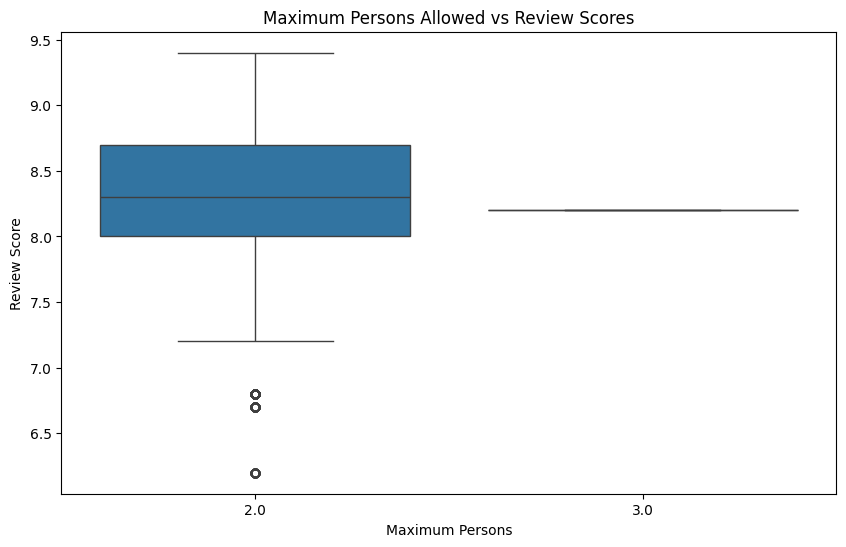

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='max_persons', y='review_score', data=merged_data)
plt.title('Maximum Persons Allowed vs Review Scores')
plt.xlabel('Maximum Persons')
plt.ylabel('Review Score')
plt.show()


In [ ]:
meal_percentage = merged_data['meal_type_included'].notna().mean() * 100
print(f"Percentage of Meal-Included Bookings: {meal_percentage:.2f}%")


Percentage of Meal-Included Bookings: 89.66%


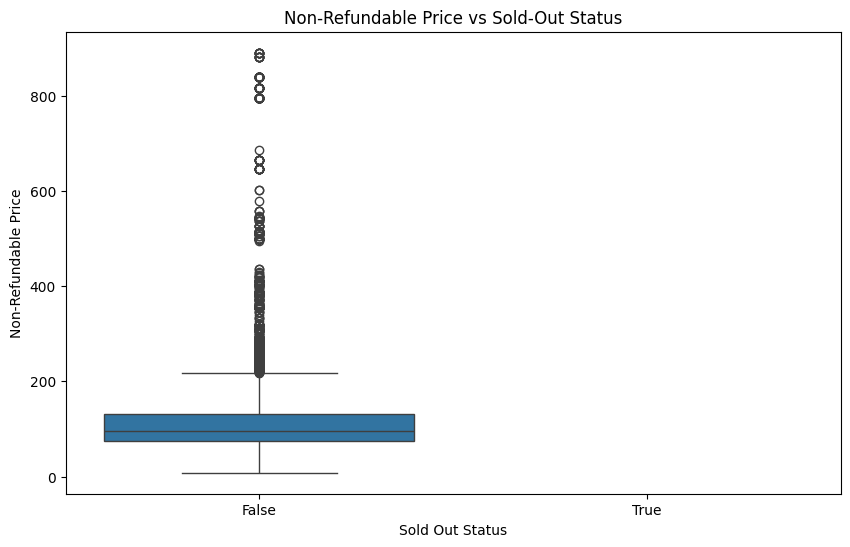

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_sold_out', y='price_value_non_ref', data=merged_data)
plt.title('Non-Refundable Price vs Sold-Out Status')
plt.xlabel('Sold Out Status')
plt.ylabel('Non-Refundable Price')
plt.show()


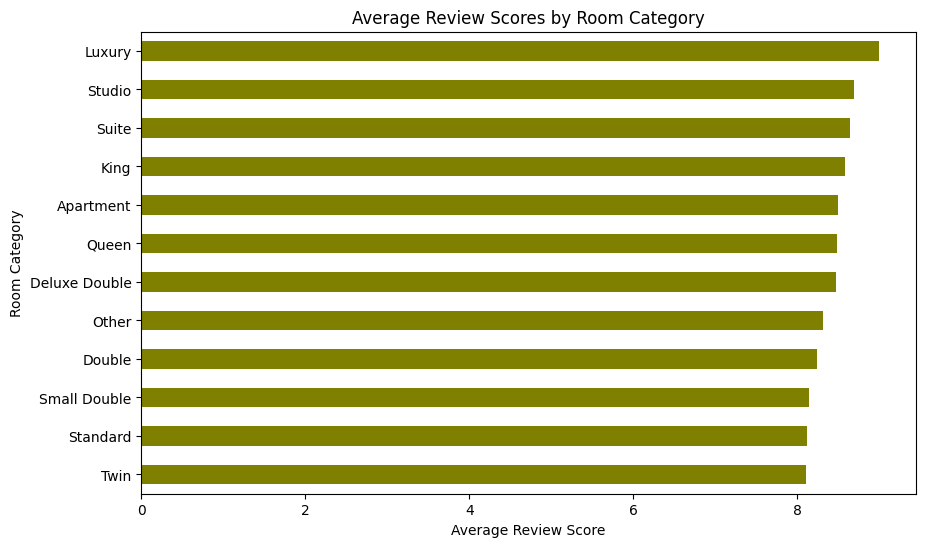

In [ ]:
avg_review_by_category = merged_data.groupby('room_category')['review_score'].mean()
plt.figure(figsize=(10, 6))
avg_review_by_category.sort_values().plot(kind='barh', color='olive')
plt.title('Average Review Scores by Room Category')
plt.xlabel('Average Review Score')
plt.ylabel('Room Category')
plt.show()


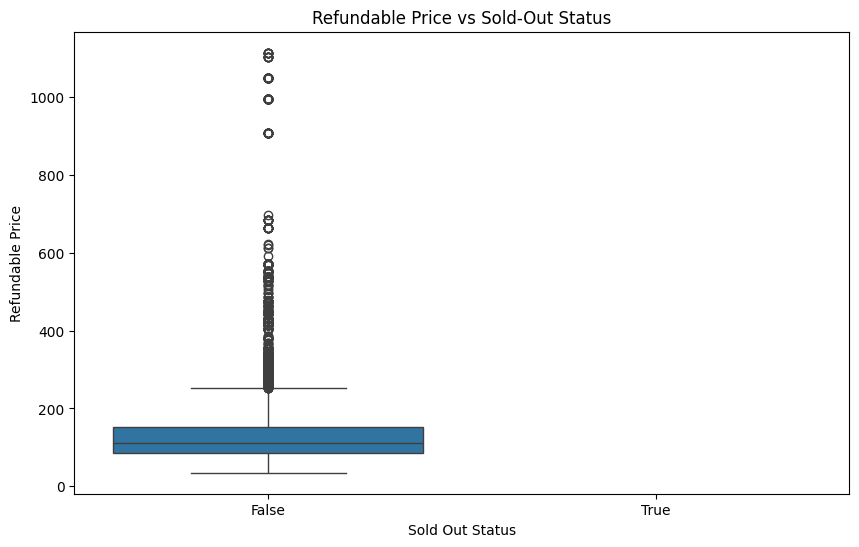

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_sold_out', y='price_value_ref', data=merged_data)
plt.title('Refundable Price vs Sold-Out Status')
plt.xlabel('Sold Out Status')
plt.ylabel('Refundable Price')
plt.show()


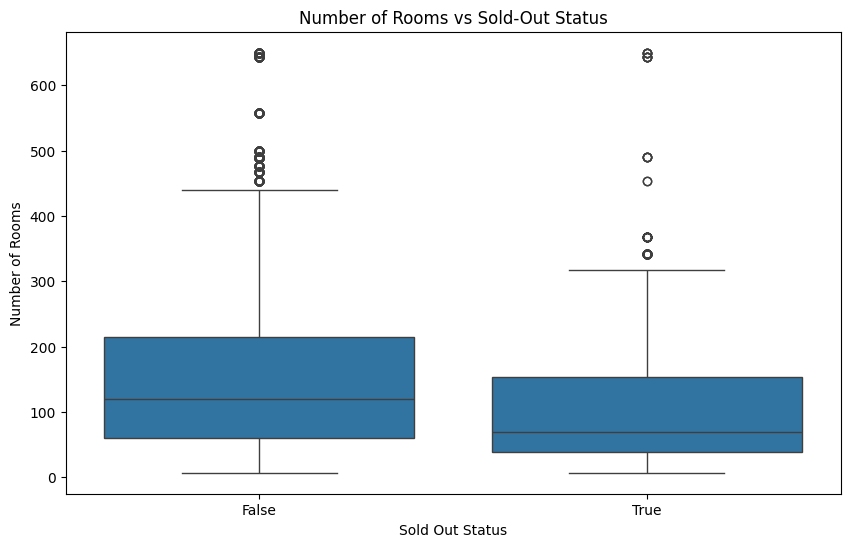

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_sold_out', y='room_count', data=merged_data)
plt.title('Number of Rooms vs Sold-Out Status')
plt.xlabel('Sold Out Status')
plt.ylabel('Number of Rooms')
plt.show()


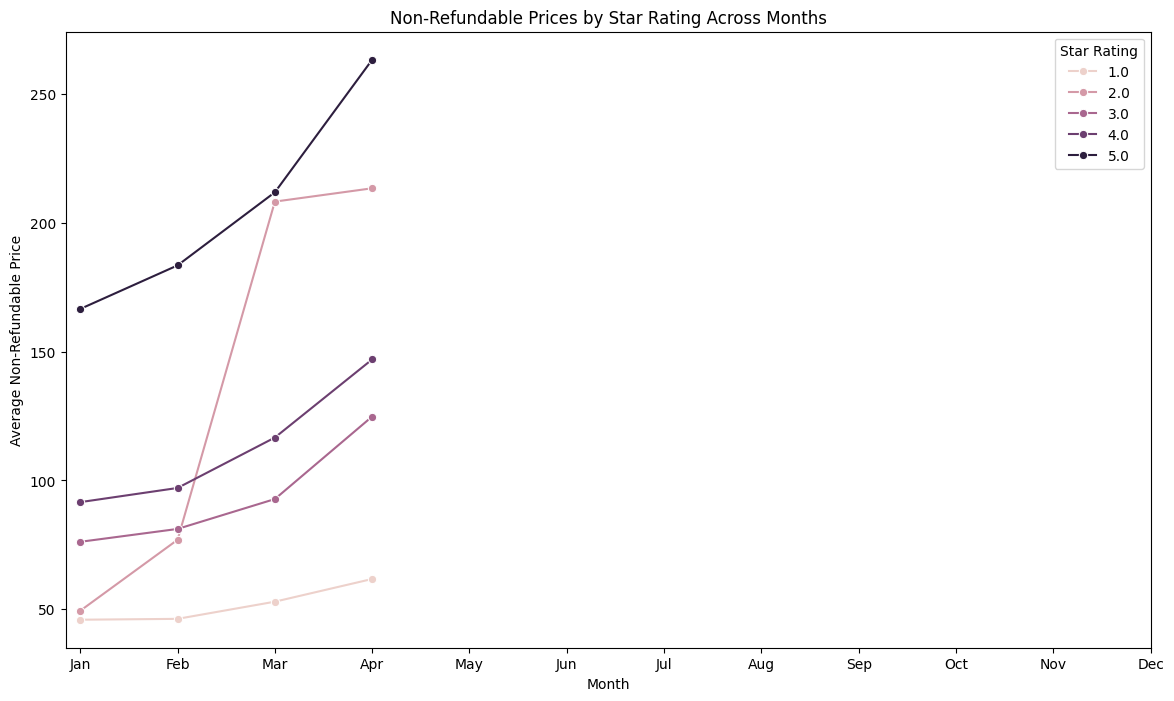

In [ ]:
seasonal_prices_star = merged_data.groupby(['month', 'stars'])[['price_value_non_ref', 'price_value_ref']].mean().reset_index()
plt.figure(figsize=(14, 8))
sns.lineplot(data=seasonal_prices_star, x='month', y='price_value_non_ref', hue='stars', marker='o')
plt.title('Non-Refundable Prices by Star Rating Across Months')
plt.xlabel('Month')
plt.ylabel('Average Non-Refundable Price')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Star Rating')
plt.show()


                     price_value_ref  price_value_non_ref
price_value_ref             1.000000             0.991844
price_value_non_ref         0.991844             1.000000


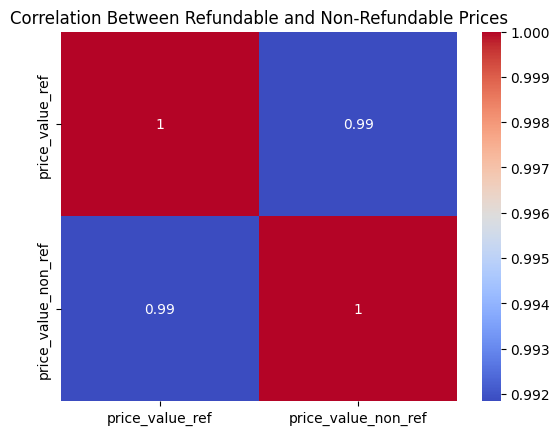

In [ ]:
correlation = merged_data[['price_value_ref', 'price_value_non_ref']].corr()
print(correlation)
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Between Refundable and Non-Refundable Prices')
plt.show()


In [ ]:
merged_data['price_review_ratio'] = merged_data['price_value_non_ref'] / merged_data['review_score']
avg_ratio = merged_data.groupby('stars')['price_review_ratio'].mean()
plt.figure(figsize=(10, 6))
avg_ratio.plot(kind='bar', color='gold')
plt.title('Average Price-to-Review Score Ratio by Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('Price-to-Review Score Ratio')
plt.show()


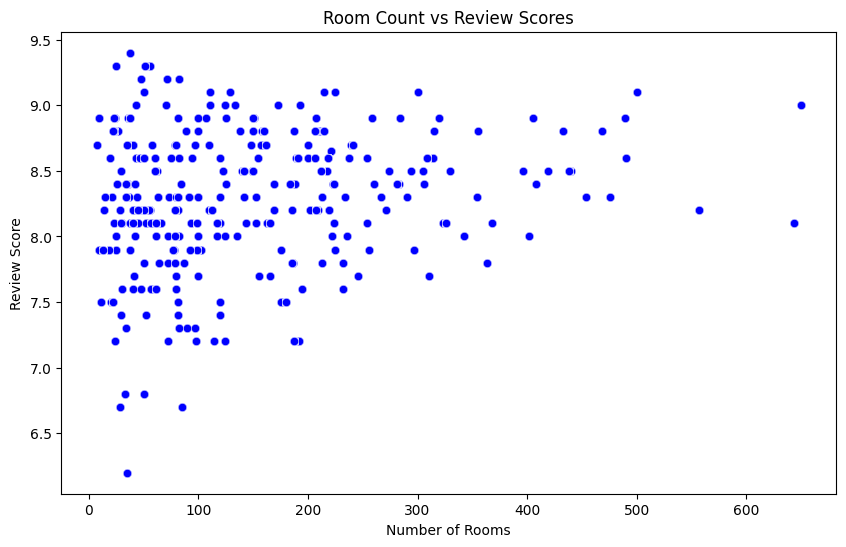

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='room_count', y='review_score', data=merged_data, alpha=0.5, color='blue')
plt.title('Room Count vs Review Scores')
plt.xlabel('Number of Rooms')
plt.ylabel('Review Score')
plt.show()


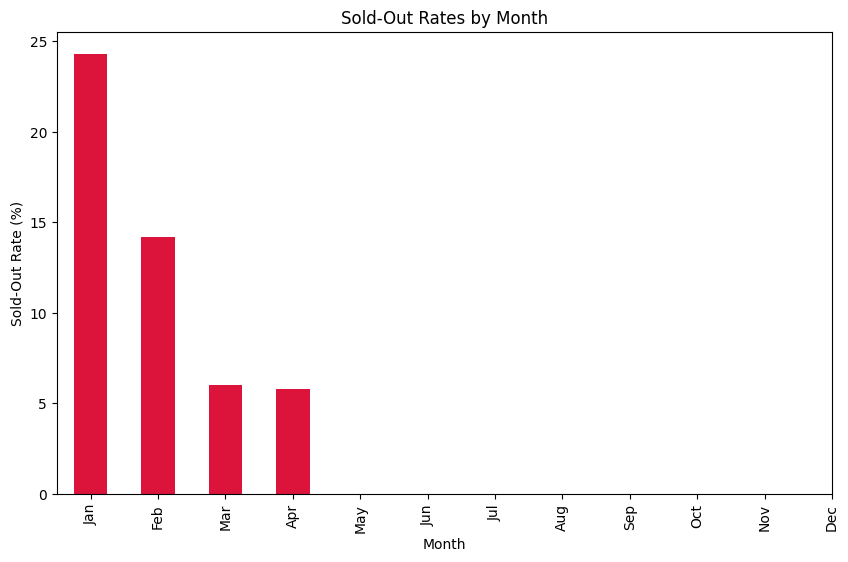

In [ ]:
monthly_sold_out = merged_data.groupby('month')['is_sold_out'].mean() * 100
plt.figure(figsize=(10, 6))
monthly_sold_out.plot(kind='bar', color='crimson')
plt.title('Sold-Out Rates by Month')
plt.xlabel('Month')
plt.ylabel('Sold-Out Rate (%)')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


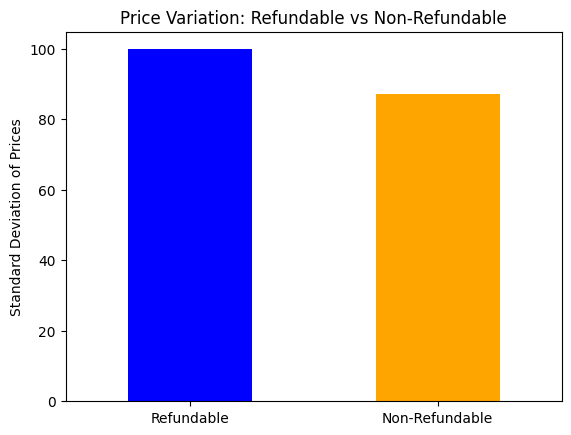

In [ ]:
price_variation = merged_data[['price_value_ref', 'price_value_non_ref']].std()
price_variation.plot(kind='bar', color=['blue', 'orange'])
plt.title('Price Variation: Refundable vs Non-Refundable')
plt.ylabel('Standard Deviation of Prices')
plt.xticks([0, 1], ['Refundable', 'Non-Refundable'], rotation=0)
plt.show()


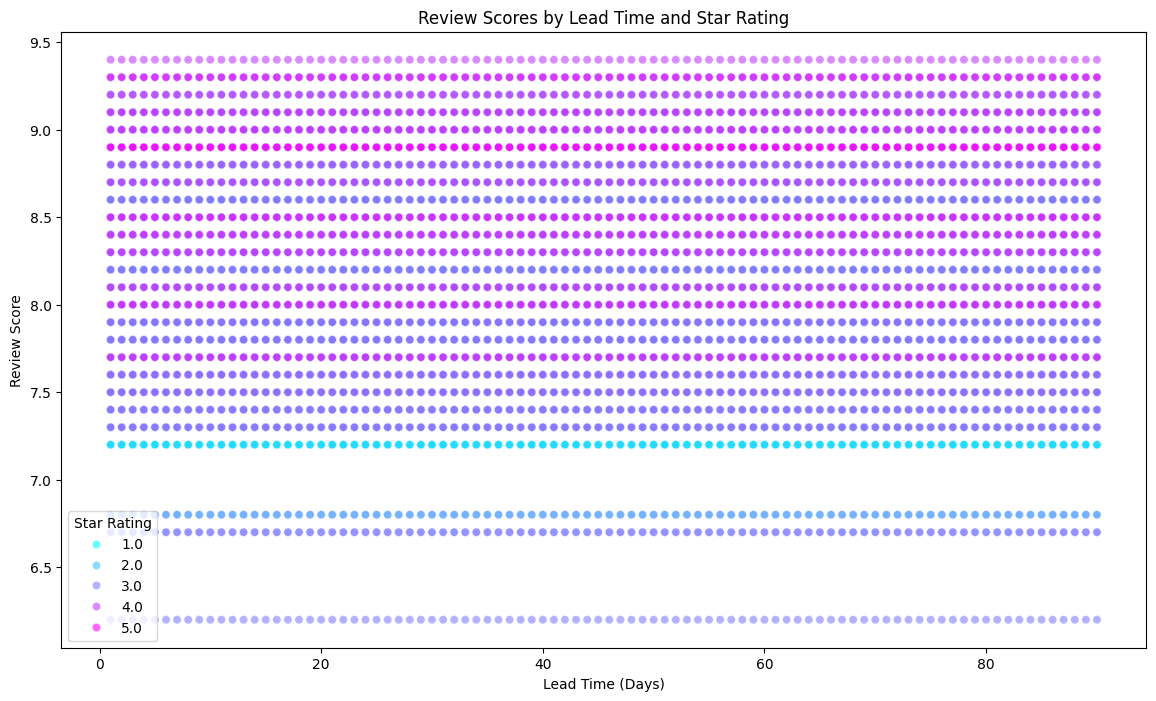

In [ ]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x='lead_time', y='review_score', hue='stars', data=merged_data, alpha=0.6, palette='cool')
plt.title('Review Scores by Lead Time and Star Rating')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Review Score')
plt.legend(title='Star Rating')
plt.show()


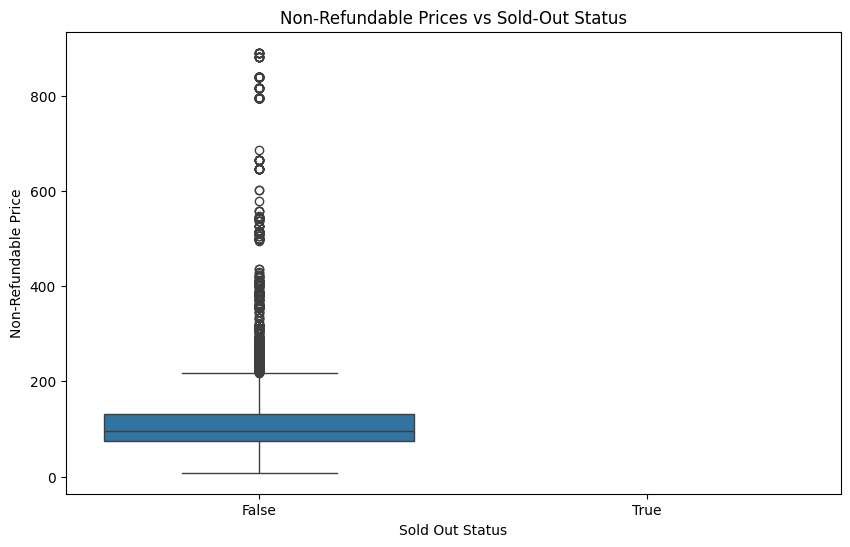

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_sold_out', y='price_value_non_ref', data=merged_data)
plt.title('Non-Refundable Prices vs Sold-Out Status')
plt.xlabel('Sold Out Status')
plt.ylabel('Non-Refundable Price')
plt.show()



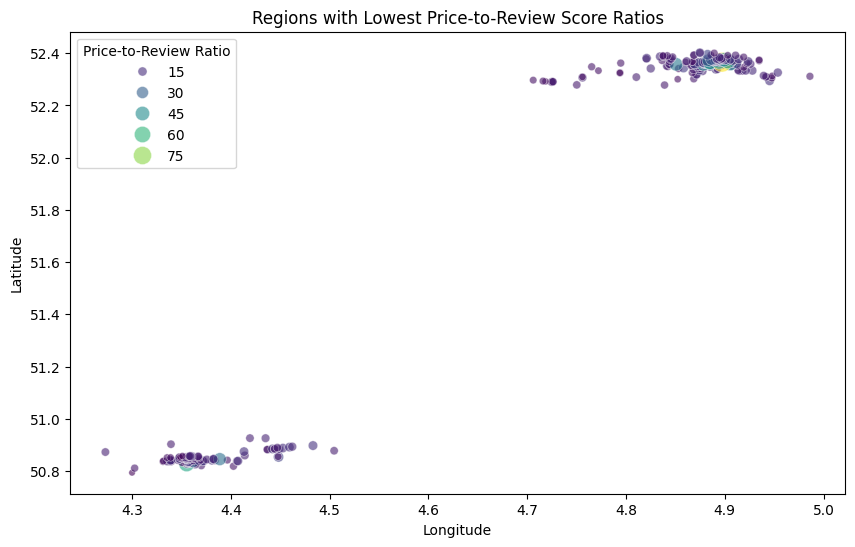

In [ ]:
merged_data['price_review_ratio'] = merged_data['price_value_non_ref'] / merged_data['review_score']
low_ratio_regions = merged_data.groupby(['latitude', 'longitude'])['price_review_ratio'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', size='price_review_ratio', sizes=(20, 200), alpha=0.6, hue='price_review_ratio', palette='viridis', data=low_ratio_regions)
plt.title('Regions with Lowest Price-to-Review Score Ratios')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Price-to-Review Ratio')
plt.show()


<ipython-input-226-8d98f3144f59>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  meal_monthly = merged_data.groupby(['month', 'meal_type_included']).size().unstack(fill_value=0)


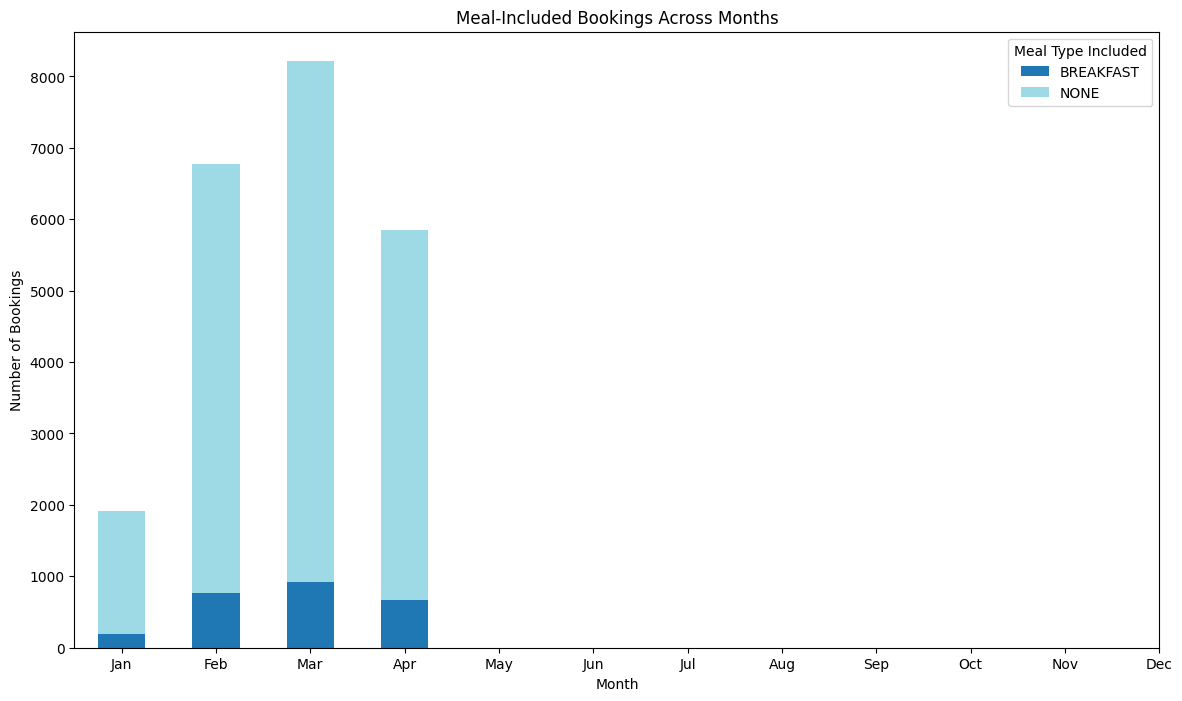

In [ ]:
meal_monthly = merged_data.groupby(['month', 'meal_type_included']).size().unstack(fill_value=0)
meal_monthly.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')
plt.title('Meal-Included Bookings Across Months')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.legend(title='Meal Type Included')
plt.show()


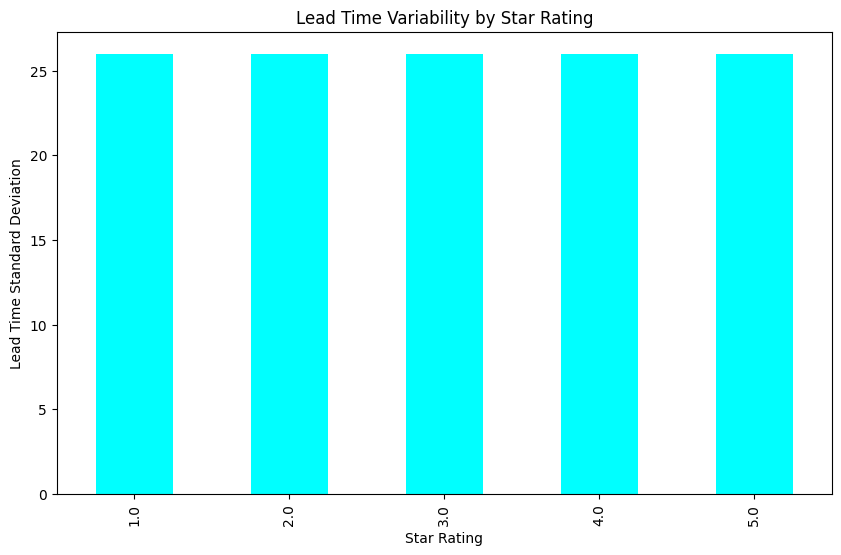

In [ ]:
lead_time_variability = merged_data.groupby('stars')['lead_time'].std()
plt.figure(figsize=(10, 6))
lead_time_variability.plot(kind='bar', color='cyan')
plt.title('Lead Time Variability by Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('Lead Time Standard Deviation')
plt.show()


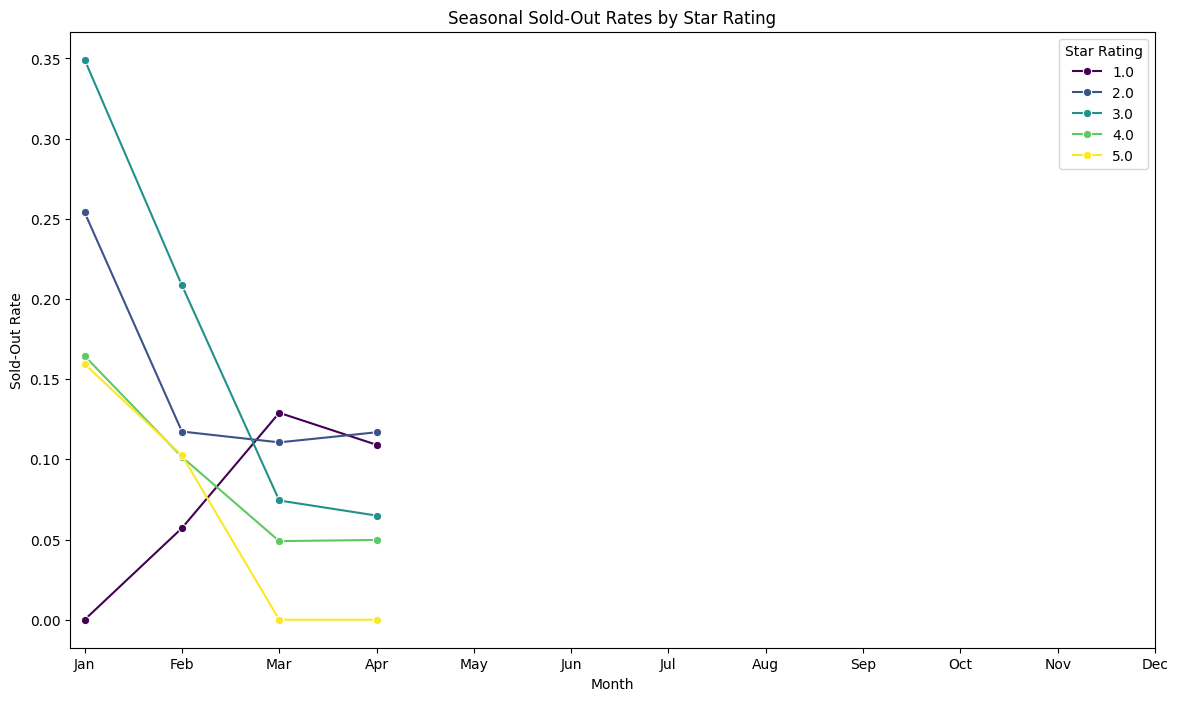

In [ ]:
seasonal_sold_out = merged_data.groupby(['month', 'stars'])['is_sold_out'].mean().reset_index()
plt.figure(figsize=(14, 8))
sns.lineplot(data=seasonal_sold_out, x='month', y='is_sold_out', hue='stars', marker='o', palette='viridis')
plt.title('Seasonal Sold-Out Rates by Star Rating')
plt.xlabel('Month')
plt.ylabel('Sold-Out Rate')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Star Rating')
plt.show()


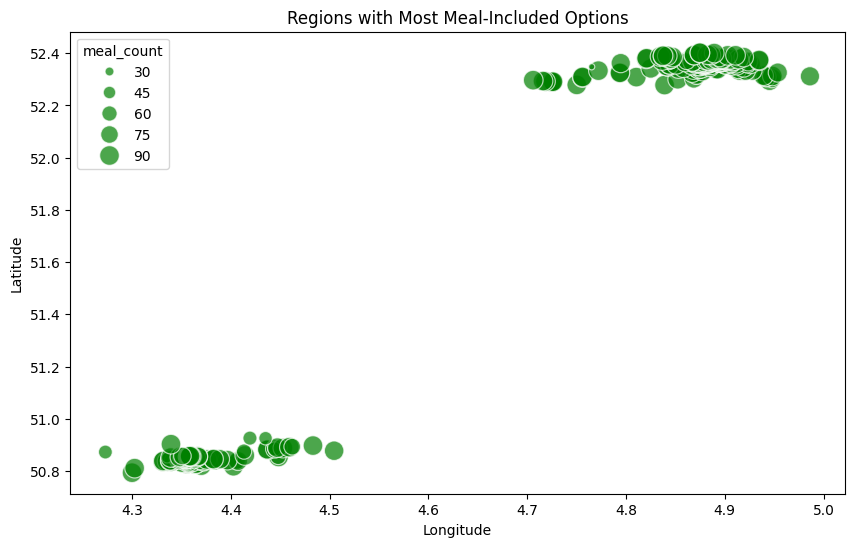

In [ ]:
meal_regions = merged_data[merged_data['meal_type_included'].notna()].groupby(['latitude', 'longitude']).size().reset_index(name='meal_count')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', size='meal_count', data=meal_regions, sizes=(20, 200), alpha=0.7, color='green')
plt.title('Regions with Most Meal-Included Options')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


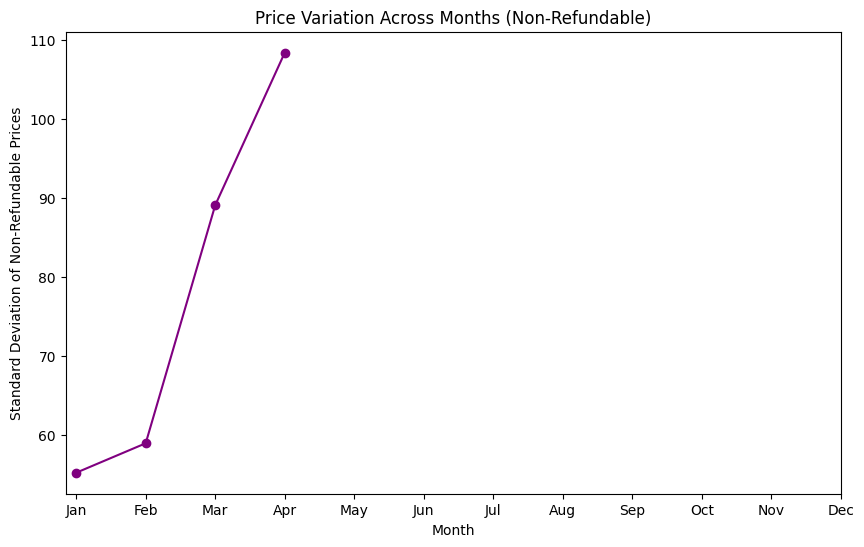

In [ ]:
monthly_price_variation = merged_data.groupby('month')['price_value_non_ref'].std()
plt.figure(figsize=(10, 6))
monthly_price_variation.plot(kind='line', marker='o', color='purple')
plt.title('Price Variation Across Months (Non-Refundable)')
plt.xlabel('Month')
plt.ylabel('Standard Deviation of Non-Refundable Prices')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


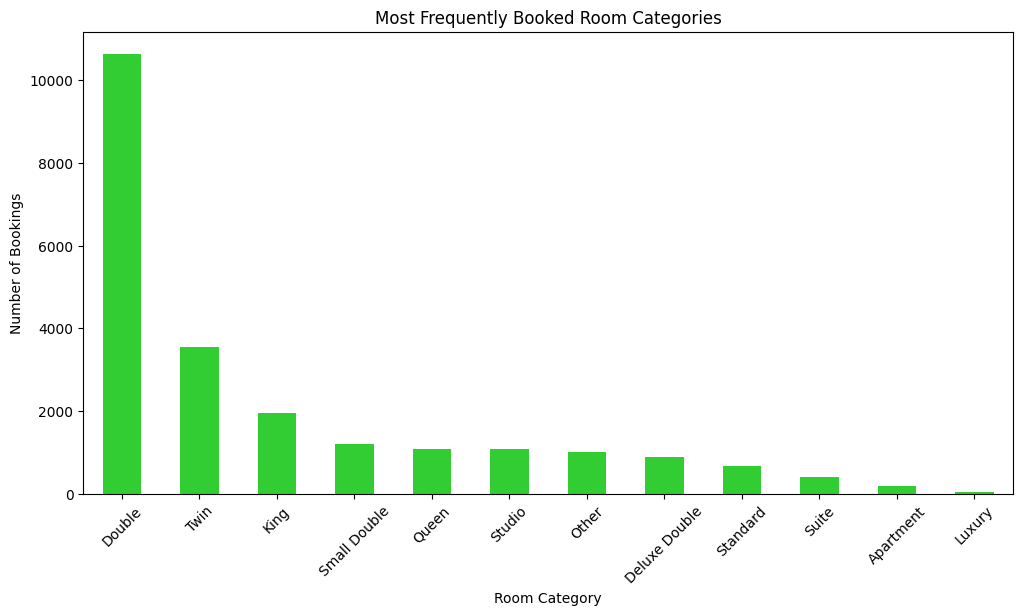

In [ ]:
room_category_counts = merged_data['room_category'].value_counts()
plt.figure(figsize=(12, 6))
room_category_counts.plot(kind='bar', color='limegreen')
plt.title('Most Frequently Booked Room Categories')
plt.xlabel('Room Category')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()


In [ ]:
refundable_price_regions = merged_data.groupby(['latitude', 'longitude'])['price_value_ref'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', size='price_value_ref', data=refundable_price_regions, sizes=(20, 200), alpha=0.7, color='red')
plt.title('Regions with Highest Refundable Prices')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


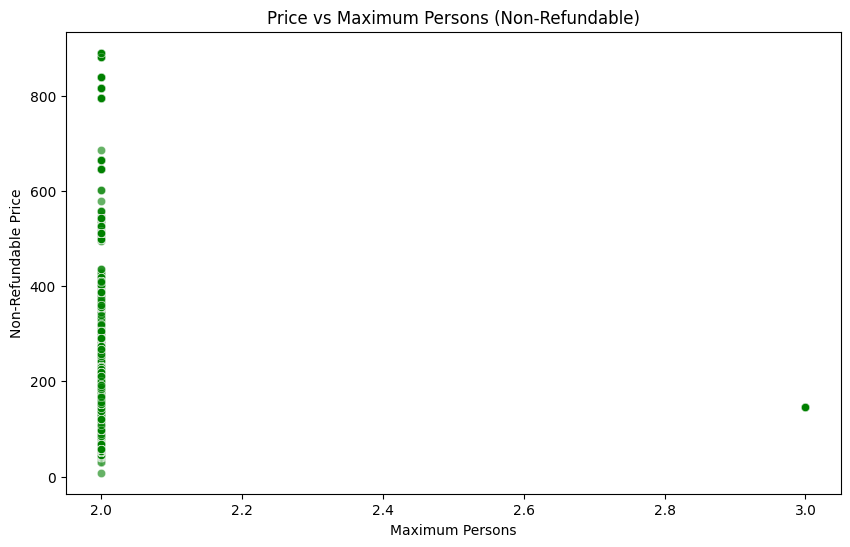

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='max_persons', y='price_value_non_ref', data=merged_data, alpha=0.6, color='green')
plt.title('Price vs Maximum Persons (Non-Refundable)')
plt.xlabel('Maximum Persons')
plt.ylabel('Non-Refundable Price')
plt.show()


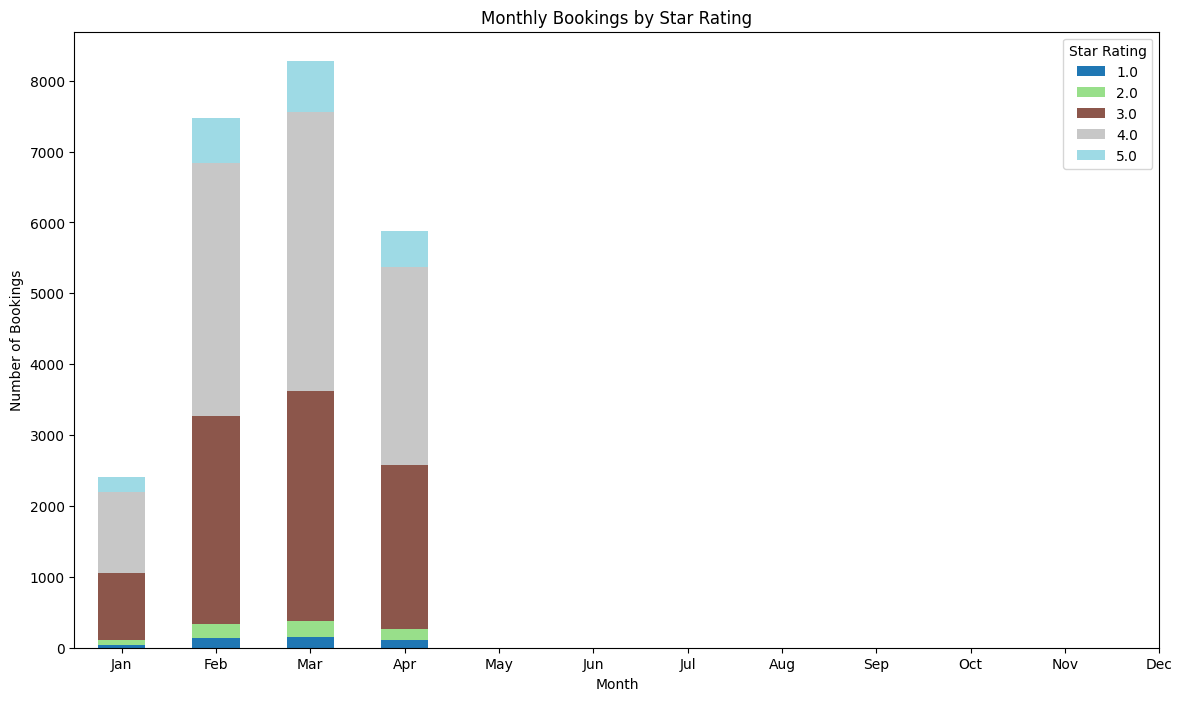

In [ ]:
bookings_by_star_month = merged_data.groupby(['month', 'stars']).size().unstack(fill_value=0)
bookings_by_star_month.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')
plt.title('Monthly Bookings by Star Rating')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.legend(title='Star Rating')
plt.show()


In [ ]:


# Select relevant features
features = merged_data[['price_value_ref', 'price_value_non_ref', 'review_score', 'stars']]
features = features.dropna()  # Drop missing values for clustering

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Perform K-Means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Add clusters to the dataset
features['cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='price_value_non_ref',
    y='review_score',
    hue='cluster',
    data=features,
    palette='coolwarm',
    alpha=0.7
)
plt.title('Market Segmentation: Cluster Analysis')
plt.xlabel('Non-Refundable Price')
plt.ylabel('Review Score')
plt.legend(title='Cluster')
plt.show()

# Analyze the cluster characteristics
cluster_summary = features.groupby('cluster').mean()
print(cluster_summary)


         price_value_ref  price_value_non_ref  review_score     stars
cluster                                                              
0              97.289404            83.140088      7.967506  3.095777
1             173.490505           151.232697      8.608324  4.107117


# 7 CONCLUSION
